##1. Function Definition: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
import os
import math
from math import sqrt
from scipy.spatial import distance
import mysql.connector
from pandasql import sqldf
from sklearn.metrics import silhouette_score
from itertools import chain
from sklearn.model_selection import train_test_split
import keras
from keras import backend as K
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense, Flatten, LSTM, Bidirectional, Input, Dropout, InputLayer, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential

from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

import keras_tuner
from tensorflow import keras

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Reshape, Dropout, LSTM, TimeDistributed
from tensorflow.keras.optimizers import Adam

In [2]:
!pip install -U pandasql

In [3]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1  # Interquartile range
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    df_outliers = df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    df_no_outliers = df_in.loc[(df_in[col_name] >= fence_low) & (df_in[col_name] <= fence_high)]
    return df_outliers, df_no_outliers
def canberraDistance(array1, array2):
  return distance.canberra(array1, array2)
def chebyshevDistance(array1, array2):
  #print("cheby")
  return distance.chebyshev(array1, array2)
def braycurtisDistance(array1, array2):
  return distance.braycurtis(array1, array2)
def manhattanDistance(p, q):
  distance = 0
  for p_i,q_i in zip(p,q):
      distance += abs(p_i - q_i)
  return distance
def euclideanDistance(pointTarget,myCentroid):
  return np.linalg.norm(pointTarget - myCentroid)
def distancesMeasurement(iniTarget,pointTarget,distance):
  sum_sq=0
  if(distance=="euclidean"):
    sum_sq = euclideanDistance(iniTarget,pointTarget)
  elif(distance=="canberra"):
    sum_sq = canberraDistance(iniTarget,pointTarget)
  elif(distance=="chebyshev"):
    sum_sq = chebyshevDistance(iniTarget,pointTarget)
  elif(distance=="braycurtis"):
    sum_sq = braycurtisDistance(iniTarget,pointTarget)
  elif(distance=="manhattan"):
    sum_sq = manhattanDistance(iniTarget,pointTarget)
  return sum_sq
def Average(lst):
  total = 0
  try:
    total = sum(lst) / len(lst)
  except ZeroDivisionError:
    total = 0
  return total
def MyMedian(lst):
  n = len(lst)
  s = sorted(lst)
  return (s[n//2-1]/2.0+s[n//2]/2.0, s[n//2])[n % 2] if n else None
def checkDifferent(list):
  return all(i == list[0] for i in list)
def visualizePlot(dfSet, clusterIdentify):
  colorScheme = []
  for col in dfSet.columns:
    #colorScheme.append(col)
    arrayFillColor = []
    for a in range(len(clusterIdentify)):
      arrayFillColor.append(dfSet.loc[a, col])
    colorScheme.append(arrayFillColor)
  #colormap = np.array(['red', 'green', 'blue','yellow','pink','black','orange','purple','beige','brown','gray','cyan','magenta','binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
  #                    'bone', 'spring', 'summer', 'autumn', 'winter', 'cool',
  #                    'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'])
  colormap = np.array([0, 10, 20, 30, 40, 45, 50, 55, 60, 70, 80, 90, 100,110,120,130,140,150,160,170,180,190,120,130,140,150,160,170,180,190,200])  
  plt.scatter(colorScheme[0], colorScheme[1], c=colormap[clusterIdentify])
  plt.title('Branch Desposit Segmentation')
  plt.xlabel('Number of Transactions')
  plt.ylabel('Deposit')
  plt.show()
def visualizePlotCustomers(dfSet, clusterIdentify):
  colorScheme = []
  for col in dfSet.columns:
    #colorScheme.append(col)
    arrayFillColor = []
    for a in range(len(clusterIdentify)):
      arrayFillColor.append(dfSet.loc[a, col])
    colorScheme.append(arrayFillColor)
  #colormap = np.array(['red', 'green', 'blue','yellow','pink','black','orange','purple','beige','brown','gray','cyan','magenta','binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
  #                    'bone', 'spring', 'summer', 'autumn', 'winter', 'cool',
  #                    'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'])
  colormap = np.array([0, 10, 20, 30, 40, 45, 50, 55, 60, 70, 80, 90, 100,110,120,130,140,150,160,170,180,190,120,130,140,150,160,170,180,190,200])  
  plt.scatter(colorScheme[0], colorScheme[1], c=colormap[clusterIdentify])
  plt.title('Customers Desposit Segmentation')
  plt.xlabel('Number of Transactions')
  plt.ylabel('Deposit')
  plt.show()
def findHighestPoint(dfSet):
  total_length = len(dfSet.index)
  highest = 0
  highestSelected = 0
  sumList = []
  for i in range(total_length):
    line = np.array(dfSet.loc[i])
    countLine = len(line)
    sum =1
    for x in range(countLine):
      sum = sum * line[x]; 
    sumList.append(sum)  
  highestSelected,highest=searchHighestRow(sumList)
  #print(highest)
  return highestSelected
def searchFurthestCentroid(dataset, cluster,variant,distance):
  total_length = len(dataset.index)
  dfSet = dataset
  myCentroid=[]
  checkRandom = True
  r1 = 0
  if(variant == "modified"):
    r1 = modifiedFirstCentroid(dfSet,distance)
  else:
    r1 = random.randint(1, total_length)-1
  #print("First Virtual Cetroid:" + str(dfSet.loc[r1]))
  point1 = np.array(dfSet.loc[r1])
  myCentroid.append(point1)
  shortestDistances=[]
  clusterProcessFeatures = []
  iniCluster = 1
  while iniCluster < cluster:
    #print("cluster:")
    #print(iniCluster)
    clusterProcessFeatures = []
    shortestDistances=[]
    for a in range(iniCluster):
      sum_sq= 0
      clusterProcessFeature = []
      for b in range(total_length):
        pointTarget = np.array(dfSet.loc[b])
        sum_sq = distancesMeasurement(pointTarget,myCentroid[a],distance)
        clusterProcessFeature.append(sum_sq)
      clusterProcessFeatures.append(clusterProcessFeature)
 
    for b in range(total_length):
      mySmallest = clusterProcessFeatures[0][b]
      checkSmallest = 0
      for a in range(iniCluster):
        if clusterProcessFeatures[a][b] <= mySmallest:
          mySmallest= clusterProcessFeatures[a][b]
          checkSmallest = a
      shortestDistances.append(mySmallest)
    iniCluster +=1   
    maxDistanceCentroids =[]
    record = 0
    record,maxDistance = searchHighestRow(shortestDistances)
    
    myCentroid.append(np.array(dfSet.loc[record]))
  #print("centroid Test:")
  #print(myCentroid)
  return myCentroid
def modifiedFirstCentroid(dataset, distance):
  total_length = len(dataset.index)
  dfSet = dataset
  sumXY=np.sum(dfSet,axis=0)/total_length  
  #print("Virtual Centroid:")
  #print(sumXY)
  distArray =[]
  for i in range(total_length):
    pointTarget = np.array(dfSet.loc[i])
    sum_sq = distancesMeasurement(pointTarget,sumXY,distance)
    distArray.append(sum_sq)
  firstCentroid, centroidDistance= searchSmallestRow(distArray)
  return firstCentroid
def searchSmallestRow(arRows):
  smallest = 0
  smallestMeasurements = arRows[0]
  for i in range(len(arRows)):
    if(smallestMeasurements>= arRows[i]):
      smallestMeasurements = arRows[i]
      smallest = i
  return smallest, smallestMeasurements
def searchHighestRow(arRows):
  highest = 0
  highestMeasurements = arRows[0]
  for i in range(len(arRows)):
    if(highestMeasurements<= arRows[i]):

      highestMeasurements = arRows[i]
      highest = i
  return highest, highestMeasurements

##1.5 Test Trial

## 2. Kmean Variation

### 2.1 K-mean

In [4]:
def MyKMean(dataset, cluster, variation, distance):
  iterationCheck = 0
  total_length = len(dataset.index)
  dfSet = dataset
  r1 = 0
  myCentroid=[]
  randomSet = []
  checkRandom = True
  if(variation == "plus"):
    print("kmean++")
    myCentroid = searchFurthestCentroid(dataset, cluster,variation,distance)
  elif(variation == "modified"):
    myCentroid = searchFurthestCentroid(dataset, cluster,variation,distance)
  else:
    while checkRandom == True:
      for a in range(cluster):
          r1 = random.randint(1, total_length)-1
          #print(r1)
          randomSet.append(r1)
      checkRandom = checkDifferent(randomSet)
    for a in range(cluster):
      point1 = np.array(dfSet.loc[randomSet[a]])
      myCentroid.append(point1)
  #print(myCentroid)
  checkClusterIdentify = [1]
  c = 1
  iteration = 0
  highestLineCluster = findHighestPoint(dfSet)
  clusterIdentify = []
  while checkClusterIdentify != clusterIdentify:
    iteration +=1
    if(iteration >= 2):
      checkClusterIdentify = clusterIdentify 
    clusterProcessFeatures = []
    for a in range(cluster):
      #print(myCentroid[a])
      sum_sq= 0
      clusterProcessFeature = []
      for b in range(total_length):
        pointTarget = np.array(dfSet.loc[b])
        sum_sq = distancesMeasurement(pointTarget,myCentroid[a],distance)
        clusterProcessFeature.append(sum_sq)
      clusterProcessFeatures.append(clusterProcessFeature)
    clusterIdentify = []
    numberingCLuster = []
    totalCost = 0
    for b in range(total_length):
      mySmallest = clusterProcessFeatures[0][b]
      checkSmallest = 0
      for a in range(cluster):
        if clusterProcessFeatures[a][b]<= mySmallest:
          mySmallest= clusterProcessFeatures[a][b]
          checkSmallest = a
      totalCost+=mySmallest
      clusterIdentify.append(checkSmallest)
      numberingCLuster.append(b)
    mnyNewData = np.array(clusterProcessFeatures)
    newCluster = []
    len(clusterProcessFeatures)
    ## making average
    setClusterCentroidCalculation = []
    for a in range(cluster):
      clusterNewCentroid = []
      for b in range(total_length):
        if(clusterIdentify[b] == a):
          clusterNewCentroid.append(np.array(dfSet.loc[b]))
      setClusterCentroidCalculation.append(Average(clusterNewCentroid))
    #print(numberingCLuster)
    #print(clusterIdentify)
    #visualizePlot(dfSet,clusterIdentify)
    iterationCheck = iterationCheck+1
    #print("Iteration "+str(iterationCheck)+" : "+ str(clusterIdentify))
    myCentroid = setClusterCentroidCalculation
  return dfSet, clusterIdentify, clusterIdentify[highestLineCluster]

## 3. PreProcessing

#### 3. Trial input

In [5]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [6]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="",
  database="apikko"
)
mycursor = mydb.cursor()
iniYear = 2020;
endYear = 2020;

mycursor.execute("SELECT * FROM datasetdirectory WHERE yearDataset >= "+str(iniYear)+" && yearDataset  <= "+str(endYear))
myresult = mycursor.fetchall()
for x in myresult:
  print(x[1])

data2020.xlsx


In [7]:
import os
import pandas as pd

yourpath = r"C:\xampp2\htdocs\1_KmeanLSTM\adminkit-dev\static\datasetFolder"

df_list = []  # List to store individual DataFrames

print("-------------------")

for root, dirs, files in os.walk(yourpath, topdown=False):
    for name in files:
        path = os.path.join(root, name)
        for row in myresult:
            if str(row[1]) == str(name):
                df2019 = pd.read_excel(path, sheet_name='data')
                df_list += [df2019]  # Concatenate df2019 to df_list

df = pd.concat(df_list, ignore_index=True)  # Concatenate the list of DataFrames


-------------------


In [8]:
df

NO Nama Cabang     User ID              Nama Kasir    Tanggal  \
0            1         SYP      STELLA            STELLA TJUNG 2020-01-01   
1            2         CSS     KRISTIN                 KRISTIN 2020-01-01   
2            3         TW1  TJUNG LYLY              TJUNG LYLY 2020-01-01   
3            4         TW1       kardi              SITI KARDI 2020-01-01   
4            5         QBY      ASIAN1                   ASIAN 2020-01-01   
...        ...         ...         ...                     ...        ...   
747051  747052         MF    sudarwati      LAI SITI SUDARWATI 2020-12-31   
747052  747053         CHG       RIATI                   RIATI 2020-12-31   
747053  747054         BY1    agustina                AGUSTINA 2020-12-31   
747054  747055         YL      fifin s  TUMIRIN FIFIN SUMANTIK 2020-12-31   
747055  747056         BY2      UMAROH                  UMAROH 2020-12-31   

                     Nama Pengirim       HKID Warga Pengirim Profesi Pengirim  \
0        WIWIT SOLAHTIKA WIJAYANTI   M2448950          ASING              NaN   
1                          ASTUTIK   W8645925      INDONESIA              TKI   
2                          RUMIATI  WX1953700      INDONESIA              TKI   
3                      TJONG LI HA   P9818808          ASING   PEGAWAI SWASTA   
4       sri harti BT JASMAN TAMSIR  WX249856A      INDONESIA              TKI   
...                            ...        ...            ...              ...   
747051                 LING SUN TO   D1325400      INDONESIA   PEGAWAI SWASTA   
747052              sdr RATNA SARI  WX0293669      INDONESIA              TKI   
747053                SITI BAROKAH  WX0337100      INDONESIA              TKI   
747054                      SUMAJI  WX2679459      INDONESIA              TKI   
747055                nur kholifah  WX5382856      INDONESIA              TKI   

            No Rekening Mata Uang  Kurs  Jumlah Dikirim  BIAYA Remittance  \
0             183934608       HKD  1800             550                30   
1        11001039399504       HKD  1800            3370                30   
2       640201017133533       HKD  1800             600                30   
3            6920123871       HKD  1800            1400                30   
4       340801041655534       HKD  1800            3130                30   
...                 ...       ...   ...             ...               ...   
747051       4850126262       HKD  1856            4985                30   
747052        885906261       HKD  1856             335                30   
747053  650501016150532       HKD  1856            7495                30   
747054        717559657       HKD  1858             500                30   
747055  616601001234503       HKD  1854             100                30   

        BIAYA Remittance Agen  Jumlah Setor (HKD)  Jumlah Dikirim (IDR)  
0                           0                2200               1014750  
1                           0                2440               6183950  
2                           0                1713               1095600  
3                           0                 340               2597000  
4                           0                 279               5715380  
...                       ...                 ...                   ...  
747051                      0                1280               8997925  
747052                      0                 150                614055  
747053                      0                 450              14015650  
747054                      0                1290                898500  
747055                      0                 190               5027550  

[747056 rows x 17 columns]

In [19]:
sqlForLSTM = "SELECT * FROM tableforlstm where tahun = '" + str(iniYear) + "'"
dfResultForLSTM = pd.read_sql(sqlForLSTM, mydb)
numpyresult = (dfResultForLSTM.to_numpy()).tolist()
flatten_numpyresult = list(chain.from_iterable(numpyresult))
flatten_numpyresult = tuple(flatten_numpyresult)
flatten_numpyresult = str(flatten_numpyresult)
print(")))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))")
dfResultForLSTM

C:\Users\1luki\AppData\Local\Temp\ipykernel_24460\1898465674.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfResultForLSTM = pd.read_sql(sqlForLSTM, mydb)


)))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))
          id  tahun      HKID  numberOfTransaction  totalIncome branchName
0     156706   2020  A0307362                   33      80120.0        CHM
1     156707   2020  A0486232                   26      59298.0        TW1
2     156708   2020  A1762241                   11      28911.0        WU 
3     156709   2020  A3572083                   12      32412.0        TW1
4     156710   2020  A7459648                   14      36415.0        CHM
...      ...    ...       ...                  ...          ...        ...
6492  163198   2020  Z7713615                   24      45225.0        CHM
6493  163199   2020  Z7721812                   62     141620.0        YL 
6494  163200   2020  Z8728969                   12      28409.0        YL 
6495  163201   2020  Z9268333                   12      30314.0        CHM
6496  163202   2020  Z9752480                   15      56675.0        SAM

[6497 rows x 6 columns]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
import os
FILE2019 = r'C:/Users/1luki/OneDrive/Documents/kerja praktek/TA/excel/dataset/dataTest.xlsx'
FILE2020 = r'C:/Users/1luki/OneDrive/Documents/kerja praktek/TA/excel/dataset/data2020.xlsx'
FILE2021 = r'C:/Users/1luki/OneDrive/Documents/kerja praktek/TA/excel/dataset/data2021.xlsx'
FILE2022 = r'C:/Users/1luki/OneDrive/Documents/kerja praktek/TA/excel/dataset/data2022.xlsx'
df2 = pd.read_excel (FILE2019, sheet_name='data')
#df2020 = pd.read_excel (FILE2020, sheet_name='data')
#df2021 = pd.read_excel (FILE2021, sheet_name='data')
#df2022 = pd.read_excel (FILE2022, sheet_name='data')
#framesMerge = [df2019, df2020, df2021]
#df = df2019.append([df2020, df2021, df2022])
df2

In [ ]:
qBranchSample = "SELECT `Nama Cabang`, COUNT(*), SUM(`Jumlah Setor (HKD)`) FROM df2 GROUP BY `Nama Cabang`;"
resultSample = sqldf(qBranchSample, globals())
resultSample.rename(columns = {'COUNT(*)':'numberOfTransaction','SUM(`Jumlah Setor (HKD)`)':'totalDeposit','COUNT(`HKID`)':'NumberOfCustomers'}, inplace = True)

resultSample=resultSample.dropna()
resultSample=resultSample.reset_index()
#result2 = result2.replace(to_replace='None', value=np.nan).dropna()
resultSample

####3.0 set queries

In [88]:
qBranch = "SELECT `Nama Cabang`, COUNT(*), SUM(`Jumlah Setor (HKD)`) FROM df GROUP BY `Nama Cabang`;"
result2 = sqldf(qBranch, globals())
result2.rename(columns = {'COUNT(*)':'numberOfTransaction','SUM(`Jumlah Setor (HKD)`)':'totalDeposit','COUNT(`HKID`)':'NumberOfCustomers'}, inplace = True)

result2=result2.dropna()
result2=result2.reset_index()
#result2 = result2.replace(to_replace='None', value=np.nan).dropna()
print(result2)

    index Nama Cabang  numberOfTransaction  totalDeposit
0       0         AG1                10011      19465699
1       1         AGN                14307      27846146
2       2         AP                 11704      22877477
3       3         ASP                 2470       4955808
4       4         BKL                    7         17874
5       5         BY1                12082      23545731
6       6         BY2                12036      23889581
7       7         BY3                11607      22494889
8       8         BY5                 7846      15207673
9       9         BY7                15957      31570632
10     10         CHG                19280      37788109
11     11         CHH                 1802       3513102
12     12         CHM                87943     172846936
13     13         CHW                22612      44427688
14     14         CM2                   46         74587
15     15         CMK                34317      67536314
16     16         CSS          

In [17]:
qCustomers = "SELECT `HKID`, COUNT(*), SUM(`Jumlah Dikirim`) FROM df GROUP BY `HKID`;"
result = sqldf(qCustomers, globals())
result.rename(columns = {'COUNT(*)':'numberOfTransaction','SUM(`Jumlah Dikirim`)':'totalIncome','COUNT(`HKID`)':'NumberOfCustomers'}, inplace = True)

#result = result.replace(to_replace='None', value=np.nan).dropna()
result=result.dropna()
result=result.reset_index()
#result = result.drop('None')
print(result)

         index       HKID  numberOfTransaction  totalIncome
0            0  01D107515                    8        13976
1            1    1443627                    4         8135
2            2   15048267                   13        24340
3            3    2313099                   14        23451
4            4    4095137                    4         9290
...        ...        ...                  ...          ...
304933  304933   w9819927                    5         6669
304934  304934  wX2934351                    4         5450
304935  304935  wX5436735                    4         6327
304936  304936  wx0259711                    4        22025
304937  304937  wx151684a                    5        11765

[304938 rows x 4 columns]


## 4. Trial

###3.1 euclidean K mean

##### 3.1.1 Kmean

In [23]:
dfSetSample = resultSample[["numberOfTransaction","totalDeposit"]]
kCluster=3
dfFromSample ,predSample, predClusterSample=MyKMean(dfSetSample,kCluster,"modified","manhattan")
print(dfSetSample)
print(predSample)
print(predClusterSample)

Virtual Centroid:
numberOfTransaction       1.6
totalDeposit           5037.0
dtype: float64
Features
[5761.0, 2800.0, 1551.0, 3320.0, 3090.0, 1886.0, 0.0, 1506.0, 4921.0, 2771.0]
Features
[0.0, 2963.0, 7312.0, 9081.0, 8851.0, 7647.0, 5761.0, 4257.0, 10682.0, 2992.0]
centroid Test:
[array([2.00e+00, 5.23e+03]), array([2.0000e+00, 1.0991e+04]), array([  1., 310.])]
Iteration 1 : [1, 0, 0, 2, 2, 0, 0, 0, 2, 0]
Iteration 2 : [1, 0, 0, 2, 2, 2, 0, 0, 2, 0]
Iteration 3 : [1, 0, 2, 2, 2, 2, 0, 0, 2, 0]
Iteration 4 : [1, 0, 2, 2, 2, 2, 0, 0, 2, 0]
   numberOfTransaction  totalDeposit
0                    2       10991.0
1                    1        8029.0
2                    1        3680.0
3                    2        1910.0
4                    2        2140.0
5                    1        3345.0
6                    2        5230.0
7                    3        6735.0
8                    1         310.0
9                    1        8000.0
[1, 0, 2, 2, 2, 2, 0, 0, 2, 0]
1


In [27]:
score = silhouette_score(dfFromSample, predSample, metric='manhattan')
#
print(score)

0.516324964064107


##### 3.1.2 Kmean on Branch

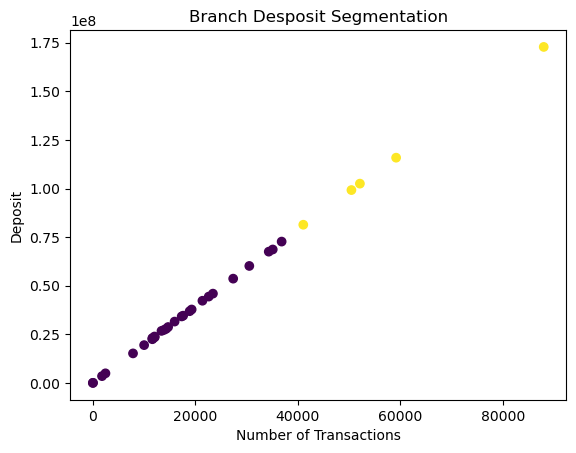

0.6599443971632195
1


In [89]:
dfSet2 = result2[["numberOfTransaction","totalDeposit"]]
kCluster=2
#chebyshev
dfFromBranch ,pred, predCluster=MyKMean(dfSet2,kCluster,"modified","euclidean")
doughnutRepresentBranch = []
doughnutPercentBranch  = []
for i in range(kCluster):
    percent = 0
    for size in pred:
        if(size == i):
            percent =percent+1
    doughnutPercentBranch.append(percent)
    doughnutRepresentBranch.append(i)
#print(predCluster)
#print(dfFromBranch)
visualizePlot(dfFromBranch,pred)
numDF = dfFromBranch.to_numpy()
#sqlBranch = "INSERT INTO kmeanresult (labels, dataPercent) VALUES (%s, %s)"
#valBranch = (str(doughnutRepresentBranch), str(doughnutPercentBranch))
#mycursor.execute(sqlBranch, valBranch)
#mydb.commit()
score = silhouette_score(dfSet2, pred, metric='euclidean')
print(score)
print(predCluster)

##### 3.1.2 ----Testing

C:\Users\1luki\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\1luki\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\1luki\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\1luki\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

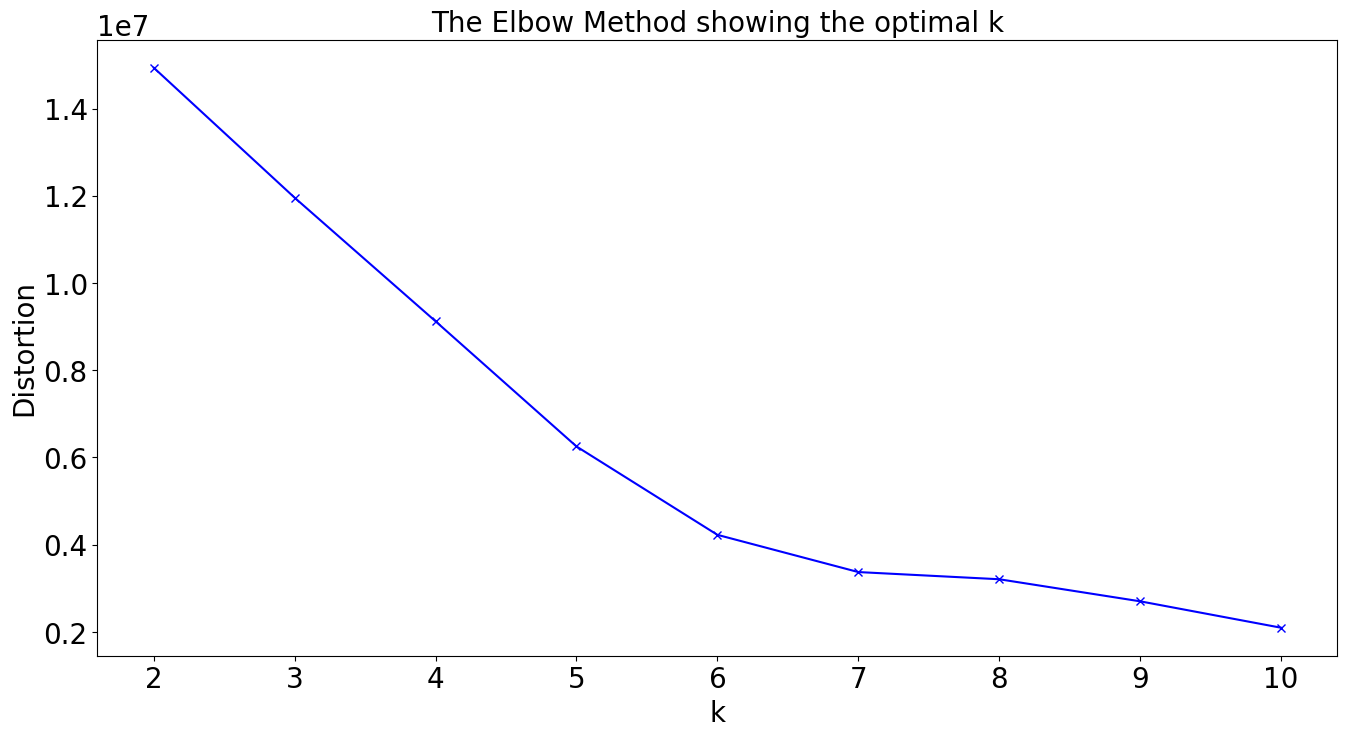

In [100]:

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
K = range(2,11)
xResult = result2[["numberOfTransaction","totalDeposit"]]
mapping1 = {}
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(xResult)
    distortions.append(sum(np.min(cdist(xResult, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / xResult.shape[0])
    mapping1[k] = sum(np.min(cdist(xResult, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) /xResult.shape[0]
font = {'size': 20}
 
# using rc function
plt.rc('font', **font)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k', fontsize=20)
plt.ylabel('Distortion' , fontsize=20)
plt.title('The Elbow Method showing the optimal k', fontsize=20)
plt.show()

In [28]:
for key, val in mapping1.items():
    print(f'{key} : {val}')
print(len(mapping1))
print(mapping1[(1+1)])

1 : 162929153.07790583
2 : 88771173.81108627
3 : 70658949.50484541
4 : 54374066.053056784
5 : 36377005.68015103
6 : 23804499.12031111
7 : 20566937.752024744
8 : 17336833.488990422
9 : 14123758.198281663
9
88771173.81108627


In [33]:
totalVal = 0
for key, val in mapping1.items():
    totalVal = totalVal + val
for key, val in mapping1.items():
    print(f'{key} : {val/totalVal}')
print(totalVal)
biggestGap = 0
storeVal= abs(mapping1[1] - mapping1[2])
kCluster = 2
for key, val in mapping1.items():
    #print(key+1)
    #print(len(mapping1)+1)
    if((key+1) <= (len(mapping1))):
        gap = abs(mapping1[key] - mapping1[(key+1)])
        if(storeVal<= gap):
            kCluster = key
            storeVal = gap
        print(f'{key} : {gap}')
kCluster = kCluster+1
print(kCluster)

1 : 0.33322771935213474
2 : 0.18155753733732252
3 : 0.14451385863436492
4 : 0.11120751369829271
5 : 0.07439937181690397
6 : 0.04868569437900576
7 : 0.04206413420615698
8 : 0.03545782553452309
9 : 0.028886345041295336
488942376.68665326
1 : 74157979.26681957
2 : 18112224.306240857
3 : 16284883.451788627
4 : 17997060.372905754
5 : 12572506.55983992
6 : 3237561.3682863675
7 : 3230104.2630343214
8 : 3213075.29070876
2


##### 3.1.3 Kmean on Process Conversion

In [91]:
resultDataframe = result2
#resultDataframe = pd.concat([df1, df2], axis=1)
#resultDataframe = resultDataframe.loc[:, ~resultDataframe.columns.duplicated()]
resultDataframe.rename(columns = {'COUNT(*)':'numberOfTransaction','SUM(`Jumlah Setor (HKD)`)':'totalIncome'}, inplace = True)
resultDataframe['cluster'] = list(pred)
qResult = "SELECT `Nama Cabang` FROM resultDataframe WHERE cluster = "+str(predCluster)+";"
dfResult = sqldf(qResult, globals())
print(dfResult)
numpyresult = (dfResult.to_numpy()).tolist()
flatten_numpyresult = list(chain.from_iterable(numpyresult))
flatten_numpyresult = tuple(flatten_numpyresult)
#if(len(flatten_numpyresult) == 1):
flatten_numpyresult = str(flatten_numpyresult)
flatten_numpyresult = ''.join(flatten_numpyresult.rsplit(',', 0))
print("dfResult:")
print(dfResult.shape[0])
if dfResult.shape[0] != 1:
  flatten_numpyresult = ''.join(flatten_numpyresult.rsplit(',', 0))
else:
  flatten_numpyresult = ''.join(flatten_numpyresult.rsplit(',', 1))
  #flatten_numpyresult = tuple(numpyresult)
qTestDf = "SELECT `HKID`,`Nama Pengirim`, COUNT(*),SUM(`Jumlah Dikirim`),`Nama Cabang`, Tanggal FROM df WHERE `Nama Cabang` IN {sql_list} GROUP BY `HKID`".format(sql_list=flatten_numpyresult)
dfResultTest = sqldf(qTestDf, globals())
dfResultTest = dfResultTest.loc[:, ~dfResultTest.columns.duplicated()]
dfResultTest.rename(columns = {'COUNT(*)':'numberOfTransactionCustomers','SUM(`Jumlah Dikirim`)':'totalIncomeCustomers'}, inplace = True)
#print(flatten_numpyresult)
dfResultTest
#sql = 'SELECT * FROM products WHERE catid IN ('+(','.join(numpyresult))+')';

  Nama Cabang
0         CHM
1         SAM
2         TW1
3         WU 
4         YL 
dfResult:
5


HKID            Nama Pengirim  numberOfTransactionCustomers  \
0       15048267             LU YING YING                             1   
1       A0307362  IP LEE HING YAN SUSANNA                            33   
2       A0486232           YUENG PING FAI                            27   
3       A1269332          YEUNG CHING MAN                             4   
4       A1762241            HUNG CHING PO                             7   
...          ...                      ...                           ...   
127965  Z9268333           WONG CHUN HONG                             9   
127966  Z9373110           cheng  kam yee                             1   
127967  Z9470388             LO WING HANG                             1   
127968  Z9642995             WAN CHUN TAT                             1   
127969  Z9752480             FONG YIK MAN                            11   

        totalIncomeCustomers Nama Cabang                     Tanggal  
0                       1000         CHM  2022-08-08 00:00:00.000000  
1                      55397         CHM  2022-01-24 00:00:00.000000  
2                      62709         TW1  2022-01-02 00:00:00.000000  
3                      12547         CHM  2022-07-12 00:00:00.000000  
4                       8780         WU   2022-01-24 00:00:00.000000  
...                      ...         ...                         ...  
127965                 15085         CHM  2022-01-06 00:00:00.000000  
127966                  1110         TW1  2022-09-19 00:00:00.000000  
127967                  6970         WU   2022-10-10 00:00:00.000000  
127968                  1110         TW1  2022-08-22 00:00:00.000000  
127969                 22580         SAM  2022-01-17 00:00:00.000000  

[127970 rows x 6 columns]

In [32]:
for i in range(len(dfResultTest)):
    mycursor = mydb.cursor()
    sqlSummary = "INSERT INTO `tableforlstm` (HKID, numberOfTransaction, totalIncome, branchName) VALUES (%s, %s, %s, %s)"
    valSummary = (str(dfResultTest.loc[i, "HKID"]),int(dfResultTest.loc[i, "numberOfTransactionCustomers"]),  float(dfResultTest.loc[i, "totalIncomeCustomers"]), str(dfResultTest.loc[i, "Nama Cabang"]))
    mycursor.execute(sqlSummary, valSummary)
    mydb.commit()


In [33]:
len(dfResultTest)

23867

###### 3.1.3 Testing Process

C:\Users\1luki\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\1luki\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\1luki\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\1luki\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\1luki\anaconda3\lib\site-packages\sklearn\clust

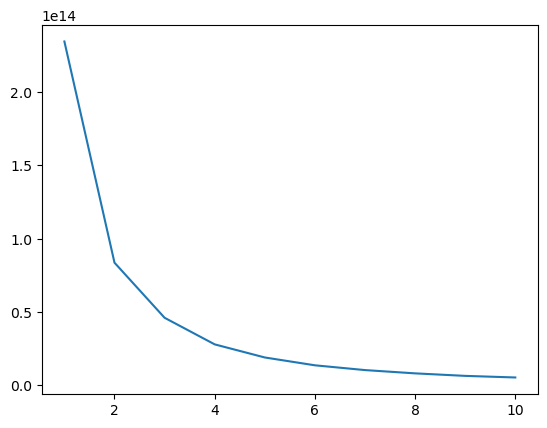

In [100]:

import seaborn as sns
wcss = []
xResult = dfResultTest[["numberOfTransactionCustomers","totalIncomeCustomers"]]

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(xResult)
    wcss.append(clustering.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss);

C:\Users\1luki\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\1luki\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\1luki\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\1luki\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


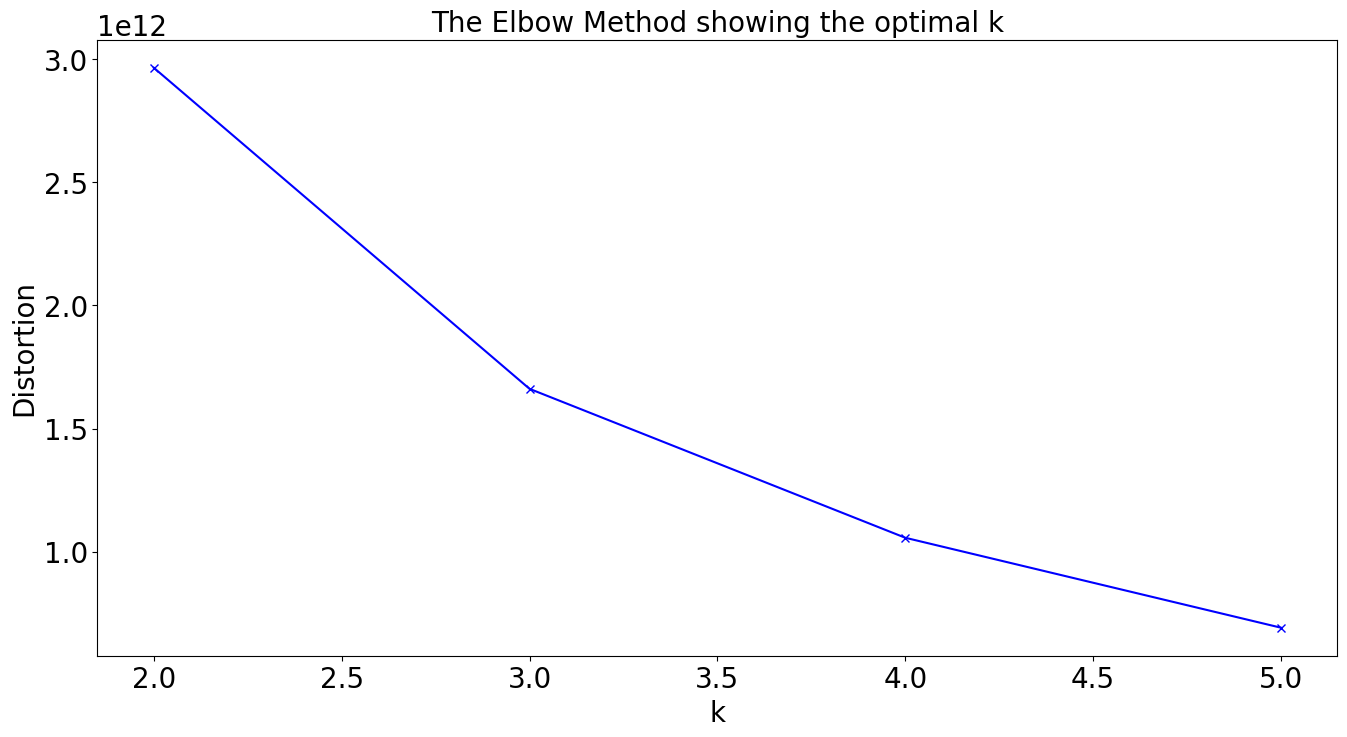

In [101]:

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
K = range(2,6)
xResult = dfResultTest[["numberOfTransactionCustomers","totalIncomeCustomers"]]

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(xResult)
    distortions.append(kmeanModel.inertia_)
font = {'size': 20}
 
# using rc function
plt.rc('font', **font)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k', fontsize=20)
plt.ylabel('Distortion', fontsize=20)
plt.title('The Elbow Method showing the optimal k', fontsize=20)
plt.show()

##### 3.1.4 Kmean on Customers

In [ ]:
dfSet3 = dfResultTest[["numberOfTransactionCustomers","totalIncomeCustomers"]]
dfFromCustomers ,predCustomers, predClusterCustomers=MyKMean(dfSet3,3,"modified","euclidean")
visualizePlot(dfFromCustomers,predCustomers)
print(predCustomers)
print(predClusterCustomers)

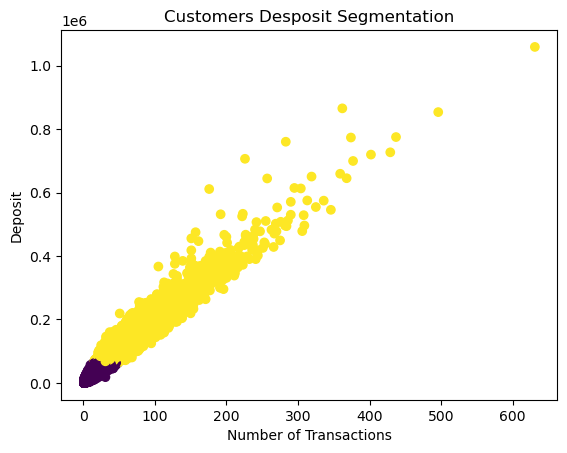

In [35]:
dfSet3 = dfResultTest[["numberOfTransactionCustomers","totalIncomeCustomers"]]
kCluster = 2
dfFromCustomers ,predCustomers, predClusterCustomers=MyKMean(dfSet3,kCluster,"modified","euclidean")
visualizePlotCustomers(dfFromCustomers,predCustomers)


doughnutRepresentCustomer = []
doughnutPercentCustomer  = []
for i in range(kCluster):
    percent = 0
    for size in predCustomers:
        if(size == i):
            percent =percent+1
    doughnutPercentCustomer.append(percent)
    doughnutRepresentCustomer.append(i)


In [115]:
from sklearn.metrics import silhouette_score
score = silhouette_score(dfSet3, predCustomers, metric='euclidean')
#
print(score)
len(predCustomers)

0.8302240178701279


170825

In [9]:
dfSet3 = dfResultTest[["numberOfTransactionCustomers","totalIncomeCustomers"]]
kCluster = 6
dfFromCustomers ,predCustomers, predClusterCustomers=MyKMean(dfSet3,kCluster,"modified","euclidean")
visualizePlot(dfFromCustomers,predCustomers)


doughnutRepresentCustomer = []
doughnutPercentCustomer  = []
for i in range(kCluster):
    percent = 0
    for size in predCustomers:
        if(size == i):
            percent =percent+1
    doughnutPercentCustomer.append(percent)
    doughnutRepresentCustomer.append(i)
from sklearn.metrics import silhouette_score
score = silhouette_score(dfSet3, predCustomers, metric='euclidean')
#
print(score)

NameError: name 'dfResultTest' is not defined

In [ ]:
chosenCustomer

In [43]:
for i in range(len(dfResultTest)):
    predClusterCustomers = str(predClusterCustomers).strip()
    chosenCustomer = str(predCustomers[i]).strip()
    #print (chosenCustomer+"="+predClusterCustomers)
    if str(chosenCustomer) == str(predClusterCustomers):
        mycursor = mydb.cursor()
        sqlSummary = "INSERT INTO tableforlstm (HKID, numberOfTransaction, totalIncome, branchName) VALUES (%s, %s, %s, %s)"
        valSummary = (str(dfResultTest.loc[i, "HKID"]),int(dfResultTest.loc[i, "numberOfTransactionCustomers"]),  float(dfResultTest.loc[i, "totalIncomeCustomers"]), str(dfResultTest.loc[i, "Nama Cabang"]))
        mycursor.execute(sqlSummary, valSummary)
        mydb.commit() 

In [9]:
import pandas.io.sql as psql
sqlForLSTM = "SELECT HKID FROM tableforlstm"
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="",
  database="apikko"
)
dfResultForLSTM = pd.read_sql(sqlForLSTM, mydb)
#dfResultForLSTM.columns = mycursor.keys()
numpyresult = (dfResultForLSTM.to_numpy()).tolist()
flatten_numpyresult = list(chain.from_iterable(numpyresult))
#print(len(flatten_numpyresult))
flatten_numpyresult = tuple(flatten_numpyresult)
flatten_numpyresult = str(flatten_numpyresult)
dfResultForLSTM

C:\Users\1luki\AppData\Local\Temp\ipykernel_21500\753903357.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfResultForLSTM = pd.read_sql(sqlForLSTM, mydb)


HKID
0     A0307362
1     A0486232
2     A1762241
3     A3572083
4     A7459648
...        ...
6492  Z7713615
6493  Z7721812
6494  Z8728969
6495  Z9268333
6496  Z9752480

[6497 rows x 1 columns]

##### 3.1.5 Dataset Processing

In [46]:
mycursor = mydb.cursor()   
sqlBranch = "INSERT INTO kmeanresult (labelsFirst, dataPercentFirst, labelCustomer, dataPercentCustomer, predictionGroup, bestPrediciton) VALUES (%s, %s, %s, %s, %s, %s)"
valBranch = (str(doughnutRepresentBranch), str(doughnutPercentBranch), str(doughnutRepresentCustomer), str(doughnutPercentCustomer), str(predCustomers), str(predClusterCustomers))
mycursor.execute(sqlBranch, valBranch)
mydb.commit()

In [10]:
mycursor = mydb.cursor()
mycursor.execute("SELECT * FROM kmeanresult ORDER BY id DESC LIMIT 1;")
myresultKmean = mycursor.fetchall()
fetchPred = []
fetchPredCluster = 0
for x in myresultKmean:
    fetchPred = x[7]
    fetchPredCluster = x[8]
fetchPred = eval(fetchPred)
print(len(fetchPred))
print(len(fetchPredCluster))

51905
1


In [11]:
#qResult = "SELECT `HKID` FROM dfResultForLSTM WHERE clusterCustomer = "+str(fetchPredCluster)+";"
#dfResultCustomers = sqldf(qResult, globals())
#sql = 'SELECT * FROM products WHERE catid IN ('+(','.join(numpyresult))+')';
numpyresult = (dfResultForLSTM.to_numpy()).tolist()
flatten_numpyresult = list(chain.from_iterable(numpyresult))
#print(len(flatten_numpyresult))
flatten_numpyresult = tuple(flatten_numpyresult)
flatten_numpyresult = str(flatten_numpyresult)
#print(flatten_numpyresult)
#flatten_numpyresult = flatten_numpyresult.replace(",", "")
#numpyresult_tuple = tuple(numpyresult)

In [12]:
qTestDf = "SELECT `Tanggal`, SUM(`Jumlah Dikirim`) FROM df WHERE `HKID` IN {sql_list} GROUP BY `Tanggal`".format(sql_list=flatten_numpyresult)
dfResultTest2 = sqldf(qTestDf, globals())
dfResultTest2.rename(columns = {'COUNT(*)':'numberOfTransaction','SUM(`Jumlah Dikirim`)':'totalCompanyIncome' ,'SUM(`Jumlah Setor (HKD)`)':'totalDeposit'}, inplace = True)
dfResultTest2["Tanggal"] = pd.to_datetime(dfResultTest2["Tanggal"])
dfResultTest2.sort_values(by='Tanggal', inplace=True)
dfResultTest2

Tanggal  totalCompanyIncome
0   2020-01-01             2154390
1   2020-01-02              427624
2   2020-01-03             1804162
3   2020-01-04              436439
4   2020-01-05              448924
..         ...                 ...
358 2020-12-27              949423
359 2020-12-28              959160
360 2020-12-29              943657
361 2020-12-30              963217
362 2020-12-31              988772

[363 rows x 2 columns]

In [13]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1  # Interquartile range
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    df_outliers = df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    df_no_outliers = df_in.loc[(df_in[col_name] >= fence_low) & (df_in[col_name] <= fence_high)]
    return df_outliers, df_no_outliers

In [14]:
dfResultTest2['totalCompanyIncome'] = dfResultTest2['totalCompanyIncome'].astype(int)
outliers, dfResultTest2 = remove_outlier(dfResultTest2, 'totalCompanyIncome')

dfResultTest2

Tanggal  totalCompanyIncome
1   2020-01-02              427624
3   2020-01-04              436439
4   2020-01-05              448924
5   2020-01-06              461732
6   2020-01-07              457714
..         ...                 ...
358 2020-12-27              949423
359 2020-12-28              959160
360 2020-12-29              943657
361 2020-12-30              963217
362 2020-12-31              988772

[307 rows x 2 columns]

In [18]:
dfResultTest2=dfResultTest2.dropna()

In [69]:
data = dfResultTest2.to_numpy()

##### 3.1.6 Import for LSTM 

##### 3.1.6 LSTM Processing

###### 3.1.6.1 LSTM initiation

In [405]:
# split into train and test sets
dfResultTest2 = dfResultTest2.dropna()
train_size = int(len(dfResultTest2) * 0.9)
test_size = len(dfResultTest2) - train_size
dfTraining_Datas = dfResultTest2.iloc[:train_size, :]
dfTesting_Datas = dfResultTest2.iloc[train_size:, :]
iniDays = math.ceil(len(dfTraining_Datas)/len(dfTesting_Datas))
print(len(dfTraining_Datas), len(dfTesting_Datas))
dfTesting_Datas

277 31


Tanggal  totalCompanyIncome
327 2020-11-26              499252
328 2020-11-27              503104
330 2020-11-29              510280
331 2020-11-30              493449
332 2020-12-01              486406
333 2020-12-02              481486
334 2020-12-03              472433
335 2020-12-04              454288
337 2020-12-06              477169
338 2020-12-07              451013
339 2020-12-08              454644
340 2020-12-09              479967
341 2020-12-10              448354
342 2020-12-11              484886
344 2020-12-13              503991
345 2020-12-14              518936
346 2020-12-15              523508
347 2020-12-16              513599
348 2020-12-17              490153
349 2020-12-18              496664
351 2020-12-20              485050
352 2020-12-21              455310
353 2020-12-22              437721
354 2020-12-23              463224
355 2020-12-24              451257
356 2020-12-25              455740
358 2020-12-27              448120
359 2020-12-28              405542
360 2020-12-29              428656
361 2020-12-30              383078
362 2020-12-31              333587

##### 3.1.6 Testing LSTM

##### 3.1.6.2 Testing with Standard Scaler

In [65]:
training_set = dfTraining_Datas.iloc[:,1:2].values
sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)


##### 3.1.6.2 Testing with Robust Scaler

In [50]:
training_set = dfTraining_Datas.iloc[:,1:2].values
sc = RobustScaler()
training_set_scaled = sc.fit_transform(training_set)


##### 3.1.6.2 Testing with MinMaxScaler 

In [64]:


training_set = dfTraining_Datas.iloc[:,1:2].values
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
#training_set_scaled = training_set
X_train = []
y_train = []
print(iniDays)
#iniDays =3
for i in range(iniDays, training_set_scaled.size):
    X_train.append(training_set_scaled[i-iniDays:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_train.shape
#print(X_train)

9


(268, 9, 1)

In [75]:
training_set[3-3:3,0]

array([915052, 722763, 674056], dtype=int64)

In [62]:
X_train = []
y_train = []

for i in range(iniDays, training_set_scaled.size):
    X_train.append(training_set_scaled[i-iniDays:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [149]:
dfResultTest2

Tanggal  totalCompanyIncome  totalDeposit  numberOfTransaction  \
1   2021-01-02              709177        719017                  328   
3   2021-01-04              635789        645239                  315   
4   2021-01-05              421804        428944                  238   
5   2021-01-06              415510        422200                  223   
6   2021-01-07              431049        437619                  219   
..         ...                 ...           ...                  ...   
358 2021-12-27              301620        307680                  202   
359 2021-12-28              373229        379739                  217   
360 2021-12-29              412730        419510                  226   
361 2021-12-30              400035        406995                  232   
362 2021-12-31              572629        582409                  326   

     timestamp  
1     0.000000  
3     0.005510  
4     0.008264  
5     0.011019  
6     0.013774  
..         ...  
358   0.988981  
359   0.991736  
360   0.994490  
361   0.997245  
362   1.000000  

[309 rows x 5 columns]

##### 3.1.6.2 Testing Experiment

In [163]:
import keras_tuner
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

def build_model(hp):
    model = Sequential()

    if(hp.Int('initDecision', 0,1) == 1):
        model.add(LSTM(units=hp.Int('unitInitLSTM',min_value=16,max_value=512,step=16), activation='relu', return_sequences=True, input_shape=(1, look_back)))
    else:
        model.add(GRU(units=hp.Int('unitInitGRU',min_value=16,max_value=512,step=16), activation='relu', return_sequences=True, input_shape=(1, look_back)))
    midDes = hp.Int('midDecision', 0,2)
    if(midDes == 1):
        model.add(LSTM(units=hp.Int('unitMidLstm',min_value=1,max_value=512,step=16),return_sequences=True , activation='relu'))
    elif(midDes == 2):
        model.add(GRU(units=hp.Int('unitMidGRU',min_value=1,max_value=512,step=16),return_sequences=True , activation='relu'))
    midEnd = hp.Int('midEndDecision', 0,2) 
    if(midEnd == 1):
        model.add(LSTM(units=hp.Int('unitMidEndLstm',min_value=1,max_value=512,step=16),return_sequences=True , activation='relu'))
    elif(midEnd == 2):
        model.add(GRU(units=hp.Int('unitMidEndGRU',min_value=1,max_value=512,step=16),return_sequences=True , activation='relu'))
    if(hp.Int('EndDecision', 0,1) == 1):
        model.add(LSTM(units=hp.Int('unitEndLSTM',min_value=1,max_value=512,step=16) , activation='relu'))
    else:
        model.add(GRU(units=hp.Int('unitEndLSTM',min_value=1,max_value=512,step=16) , activation='relu'))
    if(hp.Int('denseDecision', 0,1) == 1):
        model.add(Dense(units=hp.Int('unitsInitDense',min_value=1,max_value=512,step=16), activation='relu'))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adamax(hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4, 1e-5])))
    
    return model
#objective='val_loss'
tuner = keras_tuner.Hyperband(build_model, objective='loss', factor=3, directory="./untitled_project", project_name="plsssSwitch")

tuner.search(X_train, y_train, validation_data=(X_test, y_test),epochs=100)

tuneBestModel = tuner.get_best_models(num_models=1)
modelTune = tuneBestModel[0]

Trial 254 Complete [00h 00m 27s]
loss: 0.08912922441959381

Best loss So Far: 0.0013544103130698204
Total elapsed time: 00h 32m 10s
INFO:tensorflow:Oracle triggered exit


In [164]:
modelTune.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 512)            1052672   
                                                                 
 gru (GRU)                   (None, 1, 129)            248841    
                                                                 
 gru_1 (GRU)                 (None, 1, 113)            82716     
                                                                 
 gru_2 (GRU)                 (None, 209)               203148    
                                                                 
 dense (Dense)               (None, 209)               43890     
                                                                 
 dense_1 (Dense)             (None, 1)                 210       
                                                                 
Total params: 1,631,477
Trainable params: 1,631,477
Non-

In [165]:
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
#print('Train Score: %.2f RMSE' % trainScore)
r2 = r2_score(trainY[0], trainPredict[:,0])
#print('Train R^2 Score: %.2f' % r2)

trainForAllY = trainY[0]
trainForAllPredict = trainPredict[:,0]
mse = mean_squared_error(trainForAllY, trainForAllPredict)
mae = mean_absolute_error(trainForAllY, trainForAllPredict)
rmse = np.sqrt(mse)
r2 = r2_score(trainForAllY,trainForAllPredict)
print("Train MSE:", mse)
print("Train MAE:", mae)
print("Train RMSE:", rmse)
print("Train R-squared:", r2)
print("")
mse = mean_squared_error(testY[0], testPredict[:,0])
mae = mean_absolute_error(testY[0], testPredict[:,0])
rmse = np.sqrt(mse)
r2 = r2_score(testY[0], testPredict[:,0])
print("Test MSE:", mse)
print("Test MAE:", mae)
print("Test RMSE:", rmse)
print("Test R-squared:", r2)

2/2 [==============================] - 0s 6ms/step
Train MSE: 926589467.4812846
Train MAE: 23618.632330246914
Train RMSE: 30439.932120181948
Train R-squared: 0.9047806625404868

Test MSE: 4054652079.1850896
Test MAE: 54633.09270833332
Test RMSE: 63676.150002847135
Test R-squared: 0.7596448826125812


In [259]:
dfResultTest2

Tanggal  totalCompanyIncome  numberOfTransaction
1   2020-01-02              915052                  394
3   2020-01-04              722763                  345
4   2020-01-05              674056                  268
5   2020-01-06              579976                  257
6   2020-01-07              553075                  237
..         ...                 ...                  ...
359 2020-12-27              488189                  216
360 2020-12-28              529254                  230
361 2020-12-29              501091                  240
362 2020-12-30              477538                  222
363 2020-12-31              758114                  329

[308 rows x 3 columns]

In [16]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1  # Interquartile range
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    df_outliers = df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    df_no_outliers = df_in.loc[(df_in[col_name] >= fence_low) & (df_in[col_name] <= fence_high)]
    return df_outliers, df_no_outliers

In [16]:
qTestDf = "SELECT `Tanggal`,SUM(`Jumlah Dikirim`) FROM df WHERE `HKID` IN {sql_list} GROUP BY `Tanggal`".format(sql_list=flatten_numpyresult)

dfResultTest2 = sqldf(qTestDf, globals())
dfResultTest2.rename(columns = {'COUNT(*)':'numberOfTransaction','SUM(`Jumlah Dikirim`)':'totalCompanyIncome' ,'SUM(`Jumlah Setor (HKD)`)':'totalDeposit'}, inplace = True)
dfResultTest2["Tanggal"] = pd.to_datetime(dfResultTest2["Tanggal"])
dfResultTest2.sort_values(by='Tanggal', inplace=True)
outliers, dfResultTest2 = remove_outlier(dfResultTest2, 'totalCompanyIncome')

dfResultTest2=dfResultTest2.dropna()
dfResultTest2.shape

(307, 2)

In [17]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [18]:
# Assuming dfResultTest2 is a pandas DataFrame
dataset = dfResultTest2.iloc[:, 1:2].values
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
look_back = math.ceil(len(train)/len(test))
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print("look_back : "+str(look_back))

245 62
look_back : 1


In [202]:
# Build the LSTM model
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam
model = Sequential()
#497
#model.add(LSTM(units=321, activation='relu', return_sequences=True, input_shape=(1, look_back)))

model.add(GRU(units=225, activation='relu', return_sequences=True, input_shape=(1, look_back)))
model.add(LSTM(units=545, activation='relu', return_sequences=True))
model.add(LSTM(units=801, activation='relu'))
#model.add(GRU(units=481, activation='relu'))
#model.add(GRU(units=81, activation='relu'))
#model.add(Dense(units=97, activation='relu'))

model.add(Dense(units=1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=4,epochs=100)
# Train the model
#model.fit(trainX, trainY, epochs=100, batch_size=8, verbose=1)

Epoch 1/100
61/61 [==============================] - 7s 61ms/step - loss: 0.0358 - val_loss: 0.0349
Epoch 2/100
61/61 [==============================] - 3s 54ms/step - loss: 0.0038 - val_loss: 0.0062
Epoch 3/100
61/61 [==============================] - 3s 53ms/step - loss: 0.0026 - val_loss: 0.0044
Epoch 4/100
61/61 [==============================] - 3s 54ms/step - loss: 0.0018 - val_loss: 0.0070
Epoch 5/100
61/61 [==============================] - 3s 54ms/step - loss: 0.0020 - val_loss: 0.0030
Epoch 6/100
61/61 [==============================] - 3s 53ms/step - loss: 0.0019 - val_loss: 0.0033
Epoch 7/100
61/61 [==============================] - 3s 54ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 8/100
61/61 [==============================] - 3s 56ms/step - loss: 0.0020 - val_loss: 0.0044
Epoch 9/100
61/61 [==============================] - 3s 55ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 10/100
61/61 [==============================] - 3s 54ms/step - loss: 0.0022 - val_loss: 0.0016

In [203]:
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
#print('Train Score: %.2f RMSE' % trainScore)
r2 = r2_score(trainY[0], trainPredict[:,0])
#print('Train R^2 Score: %.2f' % r2)

trainForAllY = trainY[0]
trainForAllPredict = trainPredict[:,0]
mse = mean_squared_error(trainForAllY, trainForAllPredict)
mae = mean_absolute_error(trainForAllY, trainForAllPredict)
rmse = np.sqrt(mse)
r2 = r2_score(trainForAllY,trainForAllPredict)
print("Train MSE:", mse)
print("Train MAE:", mae)
print("Train RMSE:", rmse)
print("Train R-squared:", r2)
print("")
mse = mean_squared_error(testY[0], testPredict[:,0])
mae = mean_absolute_error(testY[0], testPredict[:,0])
rmse = np.sqrt(mse)
r2 = r2_score(testY[0], testPredict[:,0])
print("Test MSE:", mse)
print("Test MAE:", mae)
print("Test RMSE:", rmse)
print("Test R-squared:", r2)

2/2 [==============================] - 0s 10ms/step
Train MSE: 809007389.8540059
Train MAE: 20172.04732510288
Train RMSE: 28443.055213074524
Train R-squared: 0.9168637780104009

Test MSE: 4949683984.710025
Test MAE: 54908.868749999994
Test RMSE: 70353.99053863274
Test R-squared: 0.7065884194397491


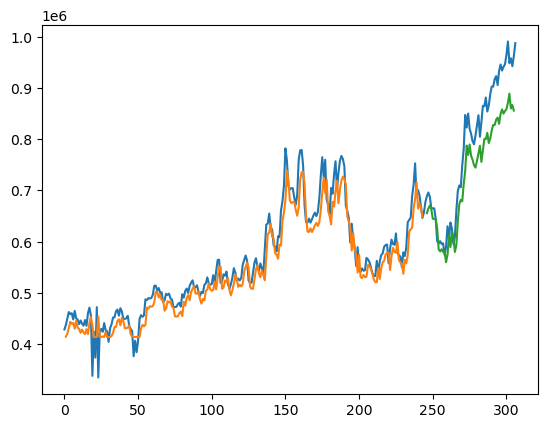

In [158]:

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [79]:
import keras_tuner
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

def build_model(hp):
    model = Sequential()
    #model.add(GRU(units=hp.Int('unitInitGRU',min_value=1,max_value=512,step=32), activation='relu',return_sequences=True , input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=hp.Int('unitsInitLstm',min_value=1,max_value=1024,step=16),return_sequences=True, activation='relu', input_shape=(1, look_back)))
    #if(hp.Int('lstmDecision', 0,1) == 1):
    #    model.add(LSTM(units=hp.Int('unitMidLstm',min_value=1,max_value=1024,step=16),return_sequences=True , activation='relu'))
    for i in range (hp.Int('layerFor', 0,10)):
        model.add(LSTM(units=hp.Int(('units'+str(i)),min_value=1,max_value=1024,step=16), activation='relu',return_sequences=True))

    #model.add(GRU(units=hp.Int('unitEndGRU',min_value=1,max_value=512,step=32) , activation='relu'))
    model.add(LSTM(units=hp.Int('unitEndLSTM',min_value=1,max_value=1024,step=16) , activation='relu'))

    if(hp.Int('denseDecision', 0,1) == 1):
        model.add(Dense(units=hp.Int('unitsInitDense',min_value=1,max_value=512,step=16), activation='relu'))
    model.add(Dense(1))
    #model.add(keras.layers.TimeDistributed(Dense(1)))
    #model.compile(loss='mean_squared_error', optimizer=keras.optimizers.ADAM(hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4, 1e-5])))
    
    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adamax(hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4, 1e-5])))
    
    return model
#objective='val_loss'
tuner = keras_tuner.Hyperband(build_model, objective='loss', factor=3, directory="./untitled_project", project_name="hopefullyYesAgain")
#tuner = keras_tuner.BayesianOptimization(build_model, objective='loss', max_trials=100,  directory="./untitled_project", project_name="HopeFinal365days08")

tuner.search(trainX, trainY, validation_data=(testX, testY), epochs=100)

tuneBestModel = tuner.get_best_models(num_models=1)
modelTune = tuneBestModel[0]

INFO:tensorflow:Reloading Tuner from ./untitled_project\hopefullyYesAgain\tuner0.json
INFO:tensorflow:Oracle triggered exit


In [454]:
modelTune.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 529)            1123596   
                                                                 
 lstm_1 (LSTM)               (None, 529)               2240844   
                                                                 
 dense (Dense)               (None, 81)                42930     
                                                                 
 dense_1 (Dense)             (None, 1)                 82        
                                                                 
Total params: 3,407,452
Trainable params: 3,407,452
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Create and fit the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(trainX, trainY)


In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Assuming you have a DataFrame named dfResultTest2 with columns 'Tanggal', 'totalCompanyIncome', and 'numberOfTransaction'
dfResultTest2 = dfResultTest2.dropna()
train_size = int(len(dfResultTest2) * 0.8)
test_size = len(dfResultTest2) - train_size
dfTraining_Datas = dfResultTest2.iloc[:train_size, :]
dfTesting_Datas = dfResultTest2.iloc[train_size:, :]
iniDays = math.ceil(len(dfTraining_Datas)/len(dfTesting_Datas))
# Convert 'Tanggal' column to datetime
dfResultTest2['Tanggal'] = pd.to_datetime(dfResultTest2['Tanggal'])

# Sort the DataFrame by 'Tanggal'
dfResultTest2 = dfResultTest2.sort_values('Tanggal')

# Create lagged dataset with 4 timestamps and 1 output
data = dfResultTest2[['totalCompanyIncome']].values


iniTimeStamp = iniDays

X = []
y = []
iniTimeStamp = 1
check = 1
for i in range(len(data)-iniTimeStamp-1):
    nextDay = i+1
    #arrTransAndTotalIncome = np.concatenate(( data[i:(i+iniTimeStamp), 0]))
    X.append(data[i:(i+iniTimeStamp), 0])
    y.append(data[i + iniTimeStamp, 0])

X = np.array(X)
y = np.array(y)
print(X.shape)

# Scale the features and target variable
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Split the data into training and testing sets
train_percent = 0.8
train_size = int(len(X_scaled) * train_percent)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

# Reshape the input data to have 3D shape (samples, timesteps, features)
lags = iniTimeStamp
X_train = X_train.reshape((X_train.shape[0], lags, 1))
X_test = X_test.reshape((X_test.shape[0], lags, 1))
print(iniTimeStamp)
#print(y)

(305, 1)
1


In [181]:
print(X_train.shape)
print(X_test.shape)

(244, 1, 1)
(61, 1, 1)


In [182]:
# Build the LSTM model
model = Sequential()
#497
model.add(LSTM(units=337, activation='relu', return_sequences=True, input_shape=(lags, 1)))
#model.add(LSTM(units=49, activation='relu', return_sequences=True))
#model.add(LSTM(units=353, activation='relu'))
#model.add(LSTM(units=49, activation='relu'))
#model.add(LSTM(units=545, activation='relu', return_sequences=True))
model.add(GRU(units=545, activation='relu'))
#64
#model.add(Dense(units=129, activation='relu'))
model.add(Dense(units=1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test), verbose=1)
# Train the model
#model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

Epoch 1/100
31/31 [==============================] - 3s 34ms/step - loss: 0.0542 - val_loss: 0.0489
Epoch 2/100
31/31 [==============================] - 1s 21ms/step - loss: 0.0113 - val_loss: 0.0431
Epoch 3/100
31/31 [==============================] - 1s 21ms/step - loss: 0.0069 - val_loss: 0.0111
Epoch 4/100
31/31 [==============================] - 1s 21ms/step - loss: 0.0029 - val_loss: 0.0047
Epoch 5/100
31/31 [==============================] - 1s 21ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 6/100
31/31 [==============================] - 1s 21ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 7/100
31/31 [==============================] - 1s 21ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 8/100
31/31 [==============================] - 1s 21ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 9/100
31/31 [==============================] - 1s 21ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 10/100
31/31 [==============================] - 1s 21ms/step - loss: 0.0017 - val_loss: 0.0013

2/2 [==============================] - 0s 6ms/step


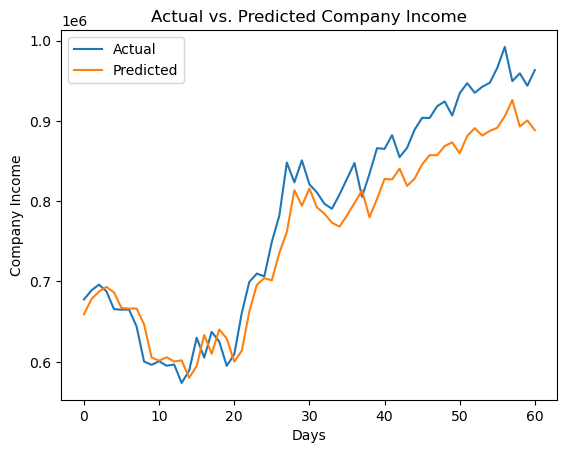

MSE: 1811975829.9564538
MAE: 35261.71516393441
RMSE: 42567.30940471166
R-squared: 0.8919708898507036


In [183]:

# Make predictions on the test data
y_pred = model.predict(X_test)

# Inverse transform the scaled data to the original scale
y_test_inv = scaler_y.inverse_transform(y_test)
y_pred_inv = scaler_y.inverse_transform(y_pred)

# Visualize actual and predicted company income
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.xlabel('Days')
plt.ylabel('Company Income')
plt.title('Actual vs. Predicted Company Income')
plt.legend()
plt.show()

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r2)

In [37]:
qTestDf = "SELECT `Tanggal`,SUM(`Jumlah Dikirim`) FROM df WHERE `HKID` IN {sql_list} GROUP BY `Tanggal`".format(sql_list=flatten_numpyresult)

dfResultTest2 = sqldf(qTestDf, globals())
dfResultTest2.rename(columns = {'COUNT(*)':'numberOfTransaction','SUM(`Jumlah Dikirim`)':'totalCompanyIncome' ,'SUM(`Jumlah Setor (HKD)`)':'totalDeposit'}, inplace = True)
dfResultTest2["Tanggal"] = pd.to_datetime(dfResultTest2["Tanggal"])
dfResultTest2.sort_values(by='Tanggal', inplace=True)
outliers, dfResultTest2 = remove_outlier(dfResultTest2, 'totalCompanyIncome')

dfResultTest2=dfResultTest2.dropna()
dfResultTest2.shape

(307, 2)

In [38]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1  # Interquartile range
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    df_outliers = df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    df_no_outliers = df_in.loc[(df_in[col_name] >= fence_low) & (df_in[col_name] <= fence_high)]
    return df_outliers, df_no_outliers

In [39]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [64]:
# Assuming dfResultTest2 is a pandas DataFrame
dataset = dfResultTest2.iloc[:, 1:2].values
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
look_back = math.ceil(len(train)/len(test))
look_back = 14
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
#trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

print("look_back : "+str(look_back))

245 62
look_back : 14


In [3]:
num = (5+5)/3
print(num)

3.3333333333333335


In [65]:
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, GRU, Dense
# Build the LSTM-CNN model
model = Sequential()
model.add(LSTM(units=337, activation='relu', return_sequences=True, input_shape=(look_back, 1)))
model.add(GRU(units=49, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
# Train the model
model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=8,epochs=100)

Epoch 1/100
29/29 [==============================] - 3s 35ms/step - loss: 0.0466 - val_loss: 0.0573
Epoch 2/100
29/29 [==============================] - 1s 24ms/step - loss: 0.0091 - val_loss: 0.0149
Epoch 3/100
29/29 [==============================] - 1s 24ms/step - loss: 0.0077 - val_loss: 0.0160
Epoch 4/100
29/29 [==============================] - 1s 24ms/step - loss: 0.0058 - val_loss: 0.0312
Epoch 5/100
29/29 [==============================] - 1s 24ms/step - loss: 0.0055 - val_loss: 0.0214
Epoch 6/100
29/29 [==============================] - 1s 24ms/step - loss: 0.0052 - val_loss: 0.0099
Epoch 7/100
29/29 [==============================] - 1s 24ms/step - loss: 0.0051 - val_loss: 0.0139
Epoch 8/100
29/29 [==============================] - 1s 24ms/step - loss: 0.0054 - val_loss: 0.0148
Epoch 9/100
29/29 [==============================] - 1s 25ms/step - loss: 0.0051 - val_loss: 0.0175
Epoch 10/100
29/29 [==============================] - 1s 26ms/step - loss: 0.0052 - val_loss: 0.0434

In [66]:
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
#trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
#print('Train Score: %.2f RMSE' % trainScore)
r2 = r2_score(trainY[0], trainPredict[:,0])
#print('Train R^2 Score: %.2f' % r2)

trainForAllY = trainY[0]
trainForAllPredict = trainPredict[:,0]
mse = mean_squared_error(trainForAllY, trainForAllPredict)
mae = mean_absolute_error(trainForAllY, trainForAllPredict)
rmse = np.sqrt(mse)
r2 = r2_score(trainForAllY,trainForAllPredict)
#print("Train MSE:", mse)
print("Train MAE:", mae)
print("Train RMSE:", rmse)
print("Train R-squared:", r2)
print("")
mse = mean_squared_error(testY[0], testPredict[:,0])
mae = mean_absolute_error(testY[0], testPredict[:,0])
rmse = np.sqrt(mse)
r2 = r2_score(testY[0], testPredict[:,0])
#print("Test MSE:", mse)
print("Test MAE:", mae)
print("Test RMSE:", rmse)
print("Test R-squared:", r2)

2/2 [==============================] - 0s 8ms/step
Train MAE: 17253.940896739132
Train RMSE: 23985.696102882644
Train R-squared: 0.9400566476731864

Test MAE: 48056.53191489361
Test RMSE: 54494.555262239
Test R-squared: 0.7791062156722841


In [ ]:
model.save('./untitled_project/testResult/finalResultYes')

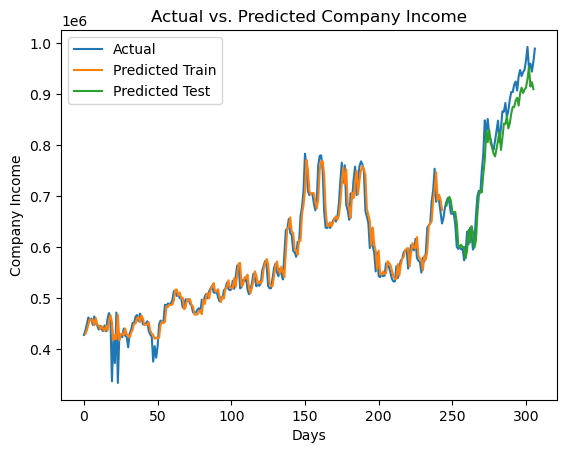

In [70]:

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
# Visualize actual and predicted company income
plt.plot(scaler.inverse_transform(dataset), label='Actual')
plt.plot(trainPredictPlot, label='Predicted Train')
plt.plot(testPredictPlot, label='Predicted Test')
plt.xlabel('Days')
plt.ylabel('Company Income')
plt.title('Actual vs. Predicted Company Income')
plt.legend()
plt.show()

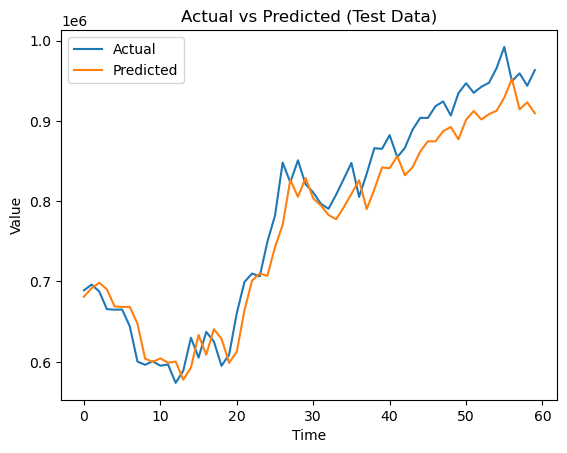

In [71]:
import matplotlib.pyplot as plt

# Plot the actual and predicted values
plt.plot(testY[0], label='Actual')
plt.plot(testPredict[:, 0], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted (Test Data)')
plt.legend()
plt.show()


In [55]:
last_data = dataset[-look_back:]
predictions = []

for _ in range(100):
    reshaped_data = np.reshape(last_data, (1, look_back, 1))
    prediction = model.predict(reshaped_data)
    predictions.append(prediction[0, 0])
    last_data = np.append(last_data[1:], prediction[0])

predictions = scaler.inverse_transform([predictions])
predictions = predictions[0]

print(predictions)

# Plot original data and predicted values


1/1 [==============================] - 0s 19ms/step
[902289.89119899 795641.75798684 708064.62025172 659775.85327584
 630350.3127017  609116.187621   590667.81256232 574549.28471816
 560435.68527964 549221.55155933 543078.68655828 539771.10021034
 538045.34923518 537703.49571607 537923.80393368 537895.66444993
 537639.85809696 537190.29354137 536652.69988948 536070.62073573
 535506.12385356 534974.29938453 534461.13645598 533945.04968986
 533412.73464406 532858.50062799 532281.60196498 531683.76548526
 531067.11048049 530433.10868099 529782.0151867  529113.12356704
 528425.57040691 527718.45304504 526990.96693552 526242.40564778
 525472.21973586 524679.85975376 523863.71660966 523022.98575765
 522156.58792883 521263.69895422 520343.84788013 519396.42639133
 518420.62994194 517415.77172446 516380.92945457 515315.35745555
 514218.82025057 513090.63103214 511930.59356955 510737.90331689
 509511.59874368 508250.69869637 506954.104283   505620.9128423
 504249.71151316 502829.62911427 501360

In [ ]:
import matplotlib.pyplot as plt

# Plot original data
plt.plot(scaler.inverse_transform(dataset), label='Original Data')

# Plot predicted values
plt.plot(range(len(dataset), len(dataset) + len(predictions)), predictions, label='Predictions')

plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [66]:
import keras_tuner
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, GRU, Dense
def build_model(hp):
    model = Sequential()
    #model.add(Conv1D(filters=hp.Int('unitIniConv1d',min_value=16,max_value=128,step=16), kernel_size=3, activation='relu', input_shape=(look_back, 1)))
    #model.add(MaxPooling1D(pool_size=2))
    #if(hp.Int('lstmDecision', 0,1) == 1):
    if(hp.Int('initDecision', 0,1) == 1):
        model.add(LSTM(units=hp.Int('unitInitLSTM',min_value=16,max_value=1024,step=16), activation='relu', return_sequences=True, input_shape=(look_back, 1)))
    else:
        model.add(GRU(units=hp.Int('unitInitGRU',min_value=16,max_value=1024,step=16), activation='relu', return_sequences=True, input_shape=(look_back, 1)))
    #midDes = hp.Int('midDecision', 0,2)
    #if(midDes == 1):
    #    model.add(LSTM(units=hp.Int('unitMidLstm',min_value=1,max_value=512,step=16),return_sequences=True , activation='relu'))
    #elif(midDes == 2):
    #    model.add(GRU(units=hp.Int('unitMidGRU',min_value=1,max_value=512,step=16),return_sequences=True , activation='relu'))
    
    #midEnd = hp.Int('midEndDecision', 0,2) 
    #if(midEnd == 1):
    #    model.add(LSTM(units=hp.Int('unitMidEndLstm',min_value=1,max_value=512,step=16),return_sequences=True , activation='relu'))
    #elif(midEnd == 2):
    #    model.add(GRU(units=hp.Int('unitMidEndGRU',min_value=1,max_value=512,step=16),return_sequences=True , activation='relu'))
    
    #if(hp.Int('lstmDecision', 0,1) == 1):
    #    model.add(LSTM(units=hp.Int('unitMidLstm',min_value=1,max_value=1024,step=16),return_sequences=True , activation='relu'))
    
    for i in range (hp.Int('layerFor', 0,10)):
        midEnd = hp.Int('midEndDecision'+str(i), 0,1) 
        if(midEnd == 1):
            model.add(LSTM(units=hp.Int(('unitMidEndLstm'+str(i)),min_value=1,max_value=1024,step=16),return_sequences=True , activation='relu'))
        else:
            model.add(GRU(units=hp.Int(('unitMidEndGRU'+str(i)),min_value=1,max_value=1024,step=16),return_sequences=True , activation='relu'))

        
        #model.add(LSTM(units=hp.Int(('units'+str(i)),min_value=1,max_value=1024,step=16), activation='relu',return_sequences=True))

    #model.add(GRU(units=hp.Int('unitEndGRU',min_value=1,max_value=512,step=32) , activation='relu'))
    if(hp.Int('EndDecision', 0,1) == 1):
        model.add(LSTM(units=hp.Int('unitEndLSTM',min_value=1,max_value=1024,step=16) , activation='relu'))
    else:
        model.add(GRU(units=hp.Int('unitEndLSTM',min_value=1,max_value=1024,step=16) , activation='relu'))
    if(hp.Int('denseDecision', 0,1) == 1):
        model.add(Dense(units=hp.Int('unitsInitDense',min_value=1,max_value=1024,step=16), activation='relu'))
    model.add(Dense(1))
    #model.add(keras.layers.TimeDistributed(Dense(1)))
    #model.compile(loss='mean_squared_error', optimizer=keras.optimizers.ADAM(hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4, 1e-5])))
    
    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adamax(hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4, 1e-5])))
    
    return model
#objective='val_loss'
tuner = keras_tuner.Hyperband(build_model, objective='loss', factor=3, directory="./untitled_project", project_name="gruLSTMShortMaxFor")
#tuner = keras_tuner.BayesianOptimization(build_model, objective='loss', max_trials=200,  directory="./untitled_project", project_name="gruLSTMShortBayesTry")

tuner.search(trainX, trainY, epochs=100)

tuneBestModel = tuner.get_best_models(num_models=1)
modelTune = tuneBestModel[0]

Trial 254 Complete [00h 01m 12s]
loss: 0.0013649316970258951

Best loss So Far: 0.0013649316970258951
Total elapsed time: 01h 35m 45s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [67]:
modelTune.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 112)            38640     
                                                                 
 lstm (LSTM)                 (None, 1, 273)            421512    
                                                                 
 gru_1 (GRU)                 (None, 1, 113)            131532    
                                                                 
 gru_2 (GRU)                 (None, 1, 497)            912492    
                                                                 
 gru_3 (GRU)                 (None, 1, 369)            960876    
                                                                 
 gru_4 (GRU)                 (None, 1, 145)            224460    
                                                                 
 lstm_1 (LSTM)               (None, 961)               4

In [68]:
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
#trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# Make predictions
trainPredict = modelTune.predict(trainX)
testPredict = modelTune.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
#print('Train Score: %.2f RMSE' % trainScore)
r2 = r2_score(trainY[0], trainPredict[:,0])
#print('Train R^2 Score: %.2f' % r2)

mse = mean_squared_error(testY[0], testPredict[:,0])
mae = mean_absolute_error(testY[0], testPredict[:,0])
rmse = np.sqrt(mse)
r2 = r2_score(testY[0], testPredict[:,0])

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r2)

2/2 [==============================] - 0s 13ms/step
MSE: 9779983378.080467
MAE: 79172.90833333334
RMSE: 98893.79848140362
R-squared: 0.42025382030855385


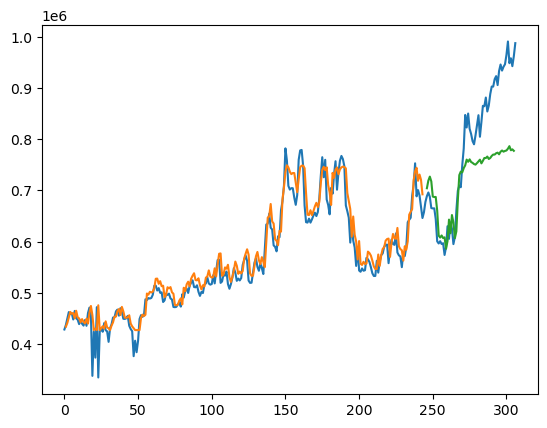

In [69]:

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

##### 3.1.6.2 Testing Result using  Regression

In [184]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, explained_variance_score, r2_score
# split into train and test sets
dfResultTest2 = dfResultTest2.dropna()
train_size = int(len(dfResultTest2) * 0.9)
dfTraining_Datas = dfResultTest2.iloc[:train_size, :]
dfTesting_Datas = dfResultTest2.iloc[train_size:, :]
iniDays = math.ceil(len(dfTraining_Datas) / len(dfTesting_Datas))
print(len(dfTraining_Datas), len(dfTesting_Datas))
print("inidays:"+str(iniDays))
training_set = dfTraining_Datas.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []
#iniDays=1
for i in range(len(training_set_scaled)-iniDays-1):
    a = training_set_scaled[i:(i+iniDays), 0]
    X_train.append(a)
    y_train.append(training_set_scaled[i + iniDays, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
dataset_test = dfTesting_Datas
dataset_train = dfTraining_Datas
real_income = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['totalCompanyIncome'], dataset_test['totalCompanyIncome']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - iniDays:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
print(inputs.shape)
# Creating a data structure with iniDays timestamps and 1 output
X_test = []
for i in range(len(inputs) - iniDays):
    a = inputs[i:(i+iniDays), 0]
    X_test.append(a)
X_test = np.array(X_test)

# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))



276 31
inidays:9
(40, 1)


In [202]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [203]:
# Linear regression
regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)
predicted_income = regressor.predict(X_test_poly)
predicted_income = sc.inverse_transform(predicted_income.reshape(-1, 1))

In [185]:
# Linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted_income = regressor.predict(X_test)
predicted_income = sc.inverse_transform(predicted_income.reshape(-1, 1))

In [67]:
from sklearn.svm import SVR
# Support Vector Regression
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)
predicted_income = regressor.predict(X_test)
predicted_income = sc.inverse_transform(predicted_income.reshape(-1, 1))


In [69]:
from sklearn.linear_model import BayesianRidge
# Bayesian Regression
regressor = BayesianRidge()
regressor.fit(X_train, y_train)

predicted_income = regressor.predict(X_test)
predicted_income = sc.inverse_transform(predicted_income.reshape(-1, 1))


In [73]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

predicted_income = regressor.predict(X_test)
predicted_income = sc.inverse_transform(predicted_income.reshape(-1, 1))


In [75]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)

predicted_income = regressor.predict(X_test)
predicted_income = sc.inverse_transform(predicted_income.reshape(-1, 1))


In [79]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

predicted_income = regressor.predict(X_test)
predicted_income = sc.inverse_transform(predicted_income.reshape(-1, 1))


In [87]:
import xgboost as xgb
from sklearn.metrics import r2_score
# Create XGBoost regression model
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted_income = regressor.predict(X_test)
predicted_income = sc.inverse_transform(predicted_income.reshape(-1, 1))

In [90]:
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)
predicted_income = regressor.predict(X_test)
predicted_income = sc.inverse_transform(predicted_income.reshape(-1, 1))

In [137]:
from sklearn.neighbors import KNeighborsRegressor
k = 5 # number of neighbors
regressor = KNeighborsRegressor(n_neighbors=k)
regressor.fit(X_train, y_train)
predicted_income = regressor.predict(X_test)
predicted_income = sc.inverse_transform(predicted_income.reshape(-1, 1))

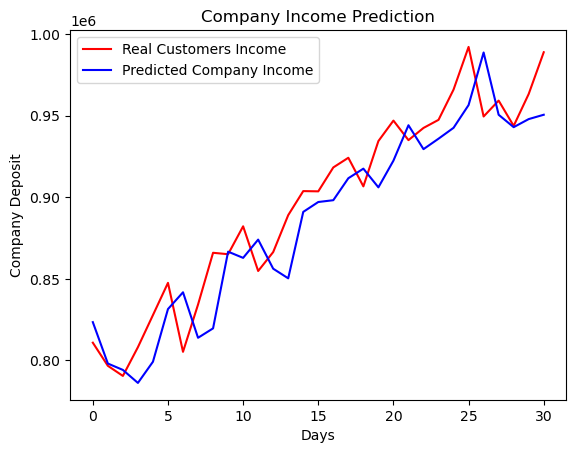

Mean absolute error = 18929.71
Mean squared error = 508455171.85
Median absolute error = 16045.97
Explained variance score = 0.88
R2 score = 0.85


In [186]:
plt.plot(real_income, color='red', label='Real Customers Income')
plt.plot(predicted_income, color='blue', label='Predicted Company Income')
plt.title('Company Income Prediction')
plt.xlabel('Days')
plt.ylabel('Company Deposit')
plt.legend()
plt.show()
print("Mean absolute error =", round(mean_absolute_error(real_income, predicted_income), 2))
print("Mean squared error =", round(mean_squared_error(real_income, predicted_income), 2))
print("Median absolute error =", round(median_absolute_error(real_income, predicted_income), 2))
print("Explained variance score =", round(explained_variance_score(real_income, predicted_income), 2))
print("R2 score =", round(r2_score(real_income, predicted_income), 2))


##### 3.1.6.2 Testing Result using LSTM-CNN

In [ ]:
# split into train and test sets
dfResultTest2 = dfResultTest2.dropna()
train_size = int(len(dfResultTest2) * 0.9)
test_size = len(dfResultTest2) - train_size
dfTraining_Datas = dfResultTest2.iloc[:train_size, :]
dfTesting_Datas = dfResultTest2.iloc[train_size:, :]
iniDays = math.ceil(len(dfTraining_Datas)/len(dfTesting_Datas))
print(len(dfTraining_Datas), len(dfTesting_Datas))
dfTesting_Datas

training_set = dfTraining_Datas.iloc[:,1:2].values
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
#training_set_scaled = training_set
X_train = []
y_train = []
print(iniDays)
#iniDays =3
for i in range(iniDays, training_set_scaled.size):
    X_train.append(training_set_scaled[i-iniDays:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_train.shape
#print(X_train)

In [187]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, explained_variance_score, r2_score
# split into train and test sets
dfResultTest2 = dfResultTest2.dropna()
train_size = int(len(dfResultTest2) * 0.9)
dfTraining_Datas = dfResultTest2.iloc[:train_size, :]
dfTesting_Datas = dfResultTest2.iloc[train_size:, :]
iniDays = math.ceil(len(dfTraining_Datas) / len(dfTesting_Datas))
print(len(dfTraining_Datas), len(dfTesting_Datas))
print("inidays:"+str(iniDays))
training_set = dfTraining_Datas.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []
#iniDays=1
for i in range(len(training_set_scaled)-iniDays-1):
    a = training_set_scaled[i:(i+iniDays), 0]
    X_train.append(a)
    y_train.append(training_set_scaled[i + iniDays, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
dataset_test = dfTesting_Datas
dataset_train = dfTraining_Datas
real_income = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['totalCompanyIncome'], dataset_test['totalCompanyIncome']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - iniDays:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
print(inputs.shape)
# Creating a data structure with iniDays timestamps and 1 output
X_test = []
for i in range(len(inputs) - iniDays):
    a = inputs[i:(i+iniDays), 0]
    X_test.append(a)
X_test = np.array(X_test)

# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))



276 31
inidays:9
(40, 1)


In [188]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Reshape((model.layers[-1].output_shape[-1], 1)))
model.add(LSTM(units=433, activation='relu', return_sequences=True))
model.add(LSTM(units=321, activation='relu'))
model.add(Dense(units=97, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [189]:
model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
9/9 [==============================] - 11s 947ms/step - loss: 0.4134
Epoch 2/100
9/9 [==============================] - 9s 953ms/step - loss: 0.1415
Epoch 3/100
9/9 [==============================] - 9s 942ms/step - loss: 0.1475
Epoch 4/100
9/9 [==============================] - 9s 952ms/step - loss: 0.0590
Epoch 5/100
9/9 [==============================] - 9s 946ms/step - loss: 0.0386
Epoch 6/100
9/9 [==============================] - 9s 972ms/step - loss: 0.0275
Epoch 7/100
9/9 [==============================] - 9s 967ms/step - loss: 0.0244
Epoch 8/100
9/9 [==============================] - 9s 948ms/step - loss: 0.0194
Epoch 9/100
9/9 [==============================] - 9s 958ms/step - loss: 0.0196
Epoch 10/100
9/9 [==============================] - 9s 946ms/step - loss: 0.0237
Epoch 11/100
9/9 [==============================] - 9s 962ms/step - loss: 0.0172
Epoch 12/100
9/9 [==============================] - 9s 942ms/step - loss: 0.0134
Epoch 13/100
9/9 [==================

(40, 1)
1/1 [==============================] - 1s 565ms/step


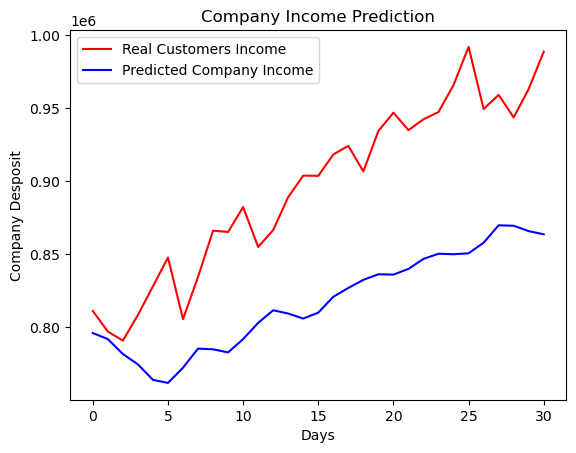

Mean absolute error = 78472.14
Mean squared error = 7214901401.92
Median absolute error = 89519.19
Explain variance score = 0.7
R2 score = -1.07


In [190]:

dataset_test = dfTesting_Datas
dataset_train = dfTraining_Datas
real_income  = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['totalCompanyIncome'], dataset_test['totalCompanyIncome']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - iniDays:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
print(inputs.shape)
# Creating a data structure with 60 timestamps and 1 output
X_test = []
for i in range(iniDays, inputs.shape[0]):
    X_test.append(inputs[i-iniDays:i, 0])
X_test = np.array(X_test)
# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Scaling
predicted_income = model.predict(X_test)
predicted_income = sc.inverse_transform(predicted_income)
# Visualizing the results

plt.plot(real_income, color = 'red', label = 'Real Customers Income')
plt.plot(predicted_income, color = 'blue', label = 'Predicted Company Income')
plt.title('Company Income Prediction')
plt.xlabel('Days')
plt.ylabel('Company Desposit')
plt.legend()
plt.show()
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_income, predicted_income))
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
rmse = math.sqrt(mean_squared_error(real_income, predicted_income))
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(real_income, predicted_income), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(real_income, predicted_income), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(real_income, predicted_income), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(real_income, predicted_income), 2)) 
print("R2 score =", round(sm.r2_score(real_income, predicted_income), 2))


##### 3.1.6.2 Testing Result using Transfer Learning

In [191]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load and preprocess the dataset
dataset = dfResultTest2
closing_prices = dfResultTest2['totalCompanyIncome'].values

scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices = scaler.fit_transform(closing_prices.reshape(-1, 1))

# Split the data into training and test sets
train_size = int(len(closing_prices) * 0.9)
train_data = closing_prices[:train_size]
test_data = closing_prices[train_size:]

# Define a custom dataset for LSTM
class StockPriceDataset(Dataset):
    def __init__(self, data, sequence_length):
        self.data = data
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.data) - self.sequence_length

    def __getitem__(self, idx):
        input_sequence = self.data[idx:idx+self.sequence_length]
        target = self.data[idx+self.sequence_length]
        return input_sequence, target

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        batch_size = x.size(0)  # Get the batch size
        seq_len = x.size(1)  # Get the sequence length
        x = x.view(batch_size, seq_len, -1)  # Reshape the input tensor
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out.squeeze(1)

# Prepare the data for LSTM training
sequence_length = 10  # Adjust the sequence length as needed
train_dataset = StockPriceDataset(train_data, sequence_length)
test_dataset = StockPriceDataset(test_data, sequence_length)
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Define the LSTM model
# Define the LSTM model with increased complexity
input_size = 1
hidden_size = 100  # Increase the hidden size
num_layers = 2  # Increase the number of layers
output_size = 1
lstm_model = LSTMModel(input_size, hidden_size, num_layers, output_size)


# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=1e-3)
num_epochs = 160  # Adjust the number of epochs as needed

# Train the LSTM model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
lstm_model.to(device)
lstm_model.train()

for epoch in range(num_epochs):
    total_loss = 0
    for batch_inputs, batch_targets in train_dataloader:
        batch_inputs = batch_inputs.to(device).float()
        batch_targets = batch_targets.to(device).float()

        optimizer.zero_grad()
        outputs = lstm_model(batch_inputs)
        loss = criterion(outputs.squeeze(), batch_targets.squeeze())
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_dataloader)
    print(f'Epoch {epoch+1} - Average Loss: {average_loss}')

# Evaluate the LSTM model
lstm_model.eval()
predicted_prices = []
with torch.no_grad():
    for batch_inputs, _ in test_dataloader:
        batch_inputs = batch_inputs.to(device).float()
        outputs = lstm_model(batch_inputs)
        predicted_prices.extend(outputs.cpu().numpy().flatten())

# Scale back the predicted and actual prices
predicted_prices = np.array(predicted_prices)
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1)).flatten()
actual_prices = scaler.inverse_transform(test_data[sequence_length:].reshape(-1, 1)).flatten()

# Plotting the historical and predicted prices
dates = dataset.index[train_size+sequence_length:]  # Assuming the dataset has a 'Date' column



Epoch 1 - Average Loss: 0.041304174399770355
Epoch 2 - Average Loss: 0.012381635885343285
Epoch 3 - Average Loss: 0.007723011049058507
Epoch 4 - Average Loss: 0.005035966345424052
Epoch 5 - Average Loss: 0.005104388420209836
Epoch 6 - Average Loss: 0.005525965568856062
Epoch 7 - Average Loss: 0.004350497749435496
Epoch 8 - Average Loss: 0.005736800066455651
Epoch 9 - Average Loss: 0.0039027744582306374
Epoch 10 - Average Loss: 0.003664205234278651
Epoch 11 - Average Loss: 0.00406810112968635
Epoch 12 - Average Loss: 0.0029442363336463183
Epoch 13 - Average Loss: 0.003843011741136091
Epoch 14 - Average Loss: 0.0030571253497756142
Epoch 15 - Average Loss: 0.0031635440622374195
Epoch 16 - Average Loss: 0.0025884713395498693
Epoch 17 - Average Loss: 0.0025564655143705964
Epoch 18 - Average Loss: 0.002494067482663976
Epoch 19 - Average Loss: 0.00229655003075844
Epoch 20 - Average Loss: 0.0021795311631114386
Epoch 21 - Average Loss: 0.00200180961024564
Epoch 22 - Average Loss: 0.002043165619

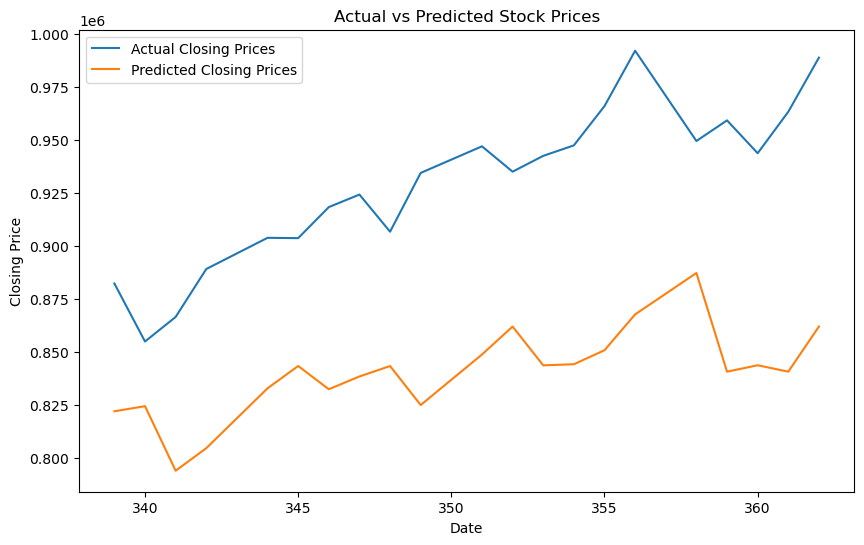

MSE: 8559034817.7064705
MAE: 88935.83333333331
RMSE: 92515.05184404574
R-squared: -5.498437706283015


In [192]:
plt.figure(figsize=(10, 6))
plt.plot(dates, actual_prices, label='Actual Closing Prices')
plt.plot(dates, predicted_prices, label='Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()
mse = mean_squared_error(actual_prices, predicted_prices)
mae = mean_absolute_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)
r2 = r2_score(actual_prices, predicted_prices)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r2)

##### 3.1.6.4 Testing Result using Hyperband

In [287]:
import keras_tuner
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

def build_model(hp):
    model = Sequential()
    #model.add(GRU(units=hp.Int('unitInitGRU',min_value=1,max_value=512,step=16), activation='relu',return_sequences=True , input_shape=(X_train.shape[1], 1)))
    #model.add(LSTM(units=hp.Int('unitsInitLSTM',min_value=1,max_value=1024,step=16), input_shape=(X_train.shape[1], 1),return_sequences=True))
   # model.add(Conv1D(filters=hp.Int('unitInitConv1d',min_value=1,max_value=512,step=16),kernel_size=3,  input_shape=(X_train.shape[1], 1)))
    model.add(Conv1D(filters=hp.Int('unitInitConv1d',min_value=1,max_value=64,step=16), kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Reshape((model.layers[-1].output_shape[-1], 1)))
    model.add(LSTM(units=hp.Int('unitBeforeLSTM',min_value=1,max_value=512,step=16), activation='relu', return_sequences=True))
    #for i in range (hp.Int('layerFor', 0,10)):
    #    model.add(GRU(units=hp.Int(('units'+str(i)),min_value=1,max_value=512,step=16), activation='relu',return_sequences=True))
    
    model.add(LSTM(units=hp.Int('unitEndLSTM',min_value=1,max_value=512,step=16)))
    model.add(Dense(units=hp.Int('unitsInitDense',min_value=1,max_value=512,step=16), activation='relu'))
    model.add(Dense(1))
    #model.add(keras.layers.TimeDistributed(Dense(1)))
    #model.compile(loss='mean_squared_error', optimizer=keras.optimizers.ADAM(hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4, 1e-5])))
    
    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4, 1e-5])))
    
    return model
#objective='val_loss'
#tuner = keras_tuner.Hyperband(build_model, objective='loss', factor=3, directory="./untitled_project", project_name="HyperbandTestFor1year")
tuner = keras_tuner.Hyperband(build_model, objective='loss', directory="./untitled_project", project_name="HyperbandTestLSTMCNNDifferentTrain")

tuner.search(X_train, y_train,epochs=360)

tuneBestModel = tuner.get_best_models(num_models=1)
modelTune = tuneBestModel[0]

Trial 9 Complete [00h 00m 45s]
loss: nan

Best loss So Far: 0.023287905380129814
Total elapsed time: 00h 07m 18s

Search: Running Trial #10

Value             |Best Value So Far |Hyperparameter
1                 |1                 |unitInitConv1d
97                |273               |unitBeforeLSTM
145               |369               |unitEndLSTM
401               |129               |unitsInitDense
1e-05             |0.001             |learning_rate
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
4                 |4                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2


KeyboardInterrupt: 

In [418]:
modelTune.fit(X_train, y_train, epochs = 100, batch_size = 2)

Epoch 1/100
135/135 [==============================] - 63s 411ms/step - loss: 0.0270
Epoch 2/100
135/135 [==============================] - 59s 434ms/step - loss: 0.0207
Epoch 3/100
135/135 [==============================] - 55s 404ms/step - loss: 0.0205
Epoch 4/100
135/135 [==============================] - 56s 417ms/step - loss: 0.0182
Epoch 5/100
135/135 [==============================] - 58s 427ms/step - loss: 0.0163
Epoch 6/100
135/135 [==============================] - 58s 428ms/step - loss: 0.0176
Epoch 7/100
135/135 [==============================] - 55s 410ms/step - loss: 0.0168
Epoch 8/100
 70/135 [==============>...............] - ETA: 26s - loss: 0.0201

KeyboardInterrupt: 

In [ ]:
dataset_test = dfTesting_Datas
dataset_train = dfTraining_Datas
real_income  = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['totalCompanyIncome'], dataset_test['totalCompanyIncome']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - iniDays:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
print(inputs.shape)
# Creating a data structure with 60 timestamps and 1 output
X_test = []
for i in range(iniDays, inputs.shape[0]):
    X_test.append(inputs[i-iniDays:i, 0])
X_test = np.array(X_test)
# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Scaling
predicted_income = modelTune.predict(X_test)
predicted_income = sc.inverse_transform(predicted_income)
# Visualizing the results
font = {'size': 12}
 
# using rc function
plt.rc('font', **font)
plt.plot(real_income, color = 'red', label = 'Real Customers Income')
plt.plot(predicted_income, color = 'blue', label = 'Predicted Company Income')
plt.title('Company Income Prediction')
plt.xlabel('Days')
plt.ylabel('Company Desposit')
plt.legend()
plt.show()
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_income, predicted_income))
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
rmse = math.sqrt(mean_squared_error(real_income, predicted_income))
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(real_income, predicted_income)
mae = mean_absolute_error(real_income, predicted_income)
rmse = np.sqrt(mse)
r2 = r2_score(real_income, predicted_income)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r2)

In [607]:
modelTune.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 9, 337)            456972    
                                                                 
 gru (GRU)                   (None, 145)               210540    
                                                                 
 dense (Dense)               (None, 657)               95922     
                                                                 
 dense_1 (Dense)             (None, 1)                 658       
                                                                 
Total params: 764,092
Trainable params: 764,092
Non-trainable params: 0
_________________________________________________________________


In [47]:
modelTune.save('./untitled_project/testResult/hyperDifferentTrainGRU')

INFO:tensorflow:Assets written to: ./untitled_project/testResult/hyperDifferentTrainGRU\assets


INFO:tensorflow:Assets written to: ./untitled_project/testResult/hyperDifferentTrainGRU\assets


In [524]:
modelTune = tf.keras.models.load_model('./untitled_project/testResult/randomTestMinMaxFor1')
modelTune.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 9, 32)             4352      
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 352)               11616     
                                                                 
 dense_1 (Dense)             (None, 1)                 353       
                                                                 
Total params: 24,641
Trainable params: 24,641
Non-trainable params: 0
_________________________________________________________________


In [234]:
modelTune.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3, 80)             240       
                                                                 
 lstm (LSTM)                 (None, 225)               275400    
                                                                 
 dense (Dense)               (None, 1)                 226       
                                                                 
Total params: 275,866
Trainable params: 275,866
Non-trainable params: 0
_________________________________________________________________


In [22]:
dfResultTest2

Tanggal  totalCompanyIncome  totalDeposit  numberOfTransaction
1   2021-01-02              709177        719017                  328
3   2021-01-04              635789        645239                  315
4   2021-01-05              421804        428944                  238
5   2021-01-06              415510        422200                  223
6   2021-01-07              431049        437619                  219
..         ...                 ...           ...                  ...
358 2021-12-27              301620        307680                  202
359 2021-12-28              373229        379739                  217
360 2021-12-29              412730        419510                  226
361 2021-12-30              400035        406995                  232
362 2021-12-31              572629        582409                  326

[309 rows x 4 columns]

##### 3.1.6.4 Testing Result  with GridSearch 

In [67]:
import keras_tuner
from tensorflow import keras

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('unitsInitLstm',min_value=8,max_value=1024,step=16), activation='relu',return_sequences=True , input_shape=(X_train.shape[1], 1)))
    #model.add(LSTM(units=hp.Int('unitsInitLstm',min_value=8, max_value=1024, step=32),  activation='relu', input_shape=(X_train.shape[1], 1)))
    for i in range (hp.Int('layerFor', 0,10)):
        model.add(LSTM(units=hp.Int(('units'+str(i)),min_value=8,max_value=1024,step=16), activation='relu',return_sequences=True))

    model.add(LSTM(units=hp.Int('unitsEndLSTM',min_value=8,max_value=1024,step=16), activation='relu'))
    model.add(Dense(units=hp.Int('unitsInitDense',min_value=8,max_value=1024,step=16), activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4, 1e-5])))
    return model
tuner = keras_tuner.GridSearch(build_model, objective='loss', max_trials=20,  directory="./untitled_project", project_name="gridTest")
tuner.search(X_train, y_train,epochs=1600)

tuneBestModel = tuner.get_best_models(num_models=1)
modelTune = tuneBestModel[0]
modelTune.fit(X_train, y_train, epochs = 1600, batch_size = 2)
#best_model = tuner.get_best_models()[0]

INFO:tensorflow:Reloading Tuner from ./untitled_project\gridTest\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/1600
697/697 [==============================] - 6s 5ms/step - loss: 0.0199
Epoch 2/1600
697/697 [==============================] - 4s 6ms/step - loss: 0.0185
Epoch 3/1600
697/697 [==============================] - 4s 6ms/step - loss: 0.0184
Epoch 4/1600
697/697 [==============================] - 4s 5ms/step - loss: 0.0178
Epoch 5/1600
697/697 [==============================] - 4s 5ms/step - loss: 0.0180
Epoch 6/1600
697/697 [==============================] - 4s 6ms/step - loss: 0.0177
Epoch 7/1600
697/697 [==============================] - 4s 6ms/step - loss: 0.0174
Epoch 8/1600
697/697 [==============================] - 4s 6ms/step - loss: 0.0172
Epoch 9/1600
697/697 [==============================] - 4s 6ms/step - loss: 0.0169
Epoch 10/1600
697/697 [==============================] - 4s 6ms/step - loss: 0.0168
Epoch 11/1600
697/697 [==============================]

697/697 [==============================] - 4s 6ms/step - loss: 0.0078
Epoch 194/1600
697/697 [==============================] - 4s 6ms/step - loss: 0.0078
Epoch 195/1600
697/697 [==============================] - 4s 6ms/step - loss: 0.0083
Epoch 196/1600
697/697 [==============================] - 4s 6ms/step - loss: 0.0085
Epoch 197/1600
697/697 [==============================] - 4s 6ms/step - loss: 0.0082
Epoch 198/1600
697/697 [==============================] - 4s 6ms/step - loss: 0.0078
Epoch 199/1600
697/697 [==============================] - 4s 6ms/step - loss: 0.0084
Epoch 200/1600
697/697 [==============================] - 4s 6ms/step - loss: 0.0079
Epoch 201/1600
697/697 [==============================] - 4s 6ms/step - loss: 0.0083
Epoch 202/1600
697/697 [==============================] - 4s 6ms/step - loss: 0.0080
Epoch 203/1600
697/697 [==============================] - 4s 6ms/step - loss: 0.0078
Epoch 204/1600
697/697 [==============================] - 4s 6ms/step - loss: 0.

697/697 [==============================] - 3s 5ms/step - loss: 0.0051
Epoch 386/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0050
Epoch 387/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0053
Epoch 388/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0074
Epoch 389/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0057
Epoch 390/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0057
Epoch 391/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0056
Epoch 392/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0049
Epoch 393/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0048
Epoch 394/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0049
Epoch 395/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0049
Epoch 396/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.

697/697 [==============================] - 3s 5ms/step - loss: 0.0041
Epoch 578/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0034
Epoch 579/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0034
Epoch 580/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0036
Epoch 581/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0034
Epoch 582/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0036
Epoch 583/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0035
Epoch 584/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0035
Epoch 585/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0035
Epoch 586/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0037
Epoch 587/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0035
Epoch 588/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.

697/697 [==============================] - 3s 5ms/step - loss: 0.0025
Epoch 770/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0024
Epoch 771/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0030
Epoch 772/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0025
Epoch 773/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0025
Epoch 774/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0029
Epoch 775/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0026
Epoch 776/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0028
Epoch 777/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0024
Epoch 778/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0024
Epoch 779/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0026
Epoch 780/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.

697/697 [==============================] - 3s 4ms/step - loss: 0.0019
Epoch 962/1600
697/697 [==============================] - 3s 4ms/step - loss: 0.0020
Epoch 963/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0026
Epoch 964/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0020
Epoch 965/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0024
Epoch 966/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0028
Epoch 967/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0018
Epoch 968/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0018
Epoch 969/1600
697/697 [==============================] - 3s 4ms/step - loss: 0.0018
Epoch 970/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0020
Epoch 971/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0020
Epoch 972/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.

697/697 [==============================] - 4s 5ms/step - loss: 0.0012
Epoch 1152/1600
697/697 [==============================] - 4s 5ms/step - loss: 0.0017
Epoch 1153/1600
697/697 [==============================] - 4s 5ms/step - loss: 0.0015
Epoch 1154/1600
697/697 [==============================] - 4s 5ms/step - loss: 0.0015
Epoch 1155/1600
697/697 [==============================] - 4s 5ms/step - loss: 0.0028
Epoch 1156/1600
697/697 [==============================] - 4s 5ms/step - loss: 0.0014
Epoch 1157/1600
697/697 [==============================] - 4s 5ms/step - loss: 0.0015
Epoch 1158/1600
697/697 [==============================] - 4s 5ms/step - loss: 0.0020
Epoch 1159/1600
697/697 [==============================] - 4s 5ms/step - loss: 0.0025
Epoch 1160/1600
697/697 [==============================] - 4s 5ms/step - loss: 0.0016
Epoch 1161/1600
697/697 [==============================] - 4s 5ms/step - loss: 0.0013
Epoch 1162/1600
697/697 [==============================] - 4s 5ms/step

697/697 [==============================] - 4s 6ms/step - loss: 0.0014
Epoch 1342/1600
697/697 [==============================] - 4s 6ms/step - loss: 0.0014
Epoch 1343/1600
697/697 [==============================] - 4s 6ms/step - loss: 0.0012
Epoch 1344/1600
697/697 [==============================] - 4s 6ms/step - loss: 0.0011
Epoch 1345/1600
697/697 [==============================] - 4s 5ms/step - loss: 0.0011
Epoch 1346/1600
697/697 [==============================] - 4s 5ms/step - loss: 0.0014
Epoch 1347/1600
697/697 [==============================] - 4s 5ms/step - loss: 0.0014
Epoch 1348/1600
697/697 [==============================] - 4s 5ms/step - loss: 0.0012
Epoch 1349/1600
697/697 [==============================] - 4s 5ms/step - loss: 0.0013
Epoch 1350/1600
697/697 [==============================] - 4s 5ms/step - loss: 0.0011
Epoch 1351/1600
697/697 [==============================] - 4s 5ms/step - loss: 0.0015
Epoch 1352/1600
697/697 [==============================] - 4s 5ms/step

697/697 [==============================] - 3s 5ms/step - loss: 0.0013
Epoch 1529/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0010
Epoch 1530/1600
697/697 [==============================] - 3s 5ms/step - loss: 8.1289e-04
Epoch 1531/1600
697/697 [==============================] - 3s 5ms/step - loss: 9.7927e-04
Epoch 1532/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0015
Epoch 1533/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0012
Epoch 1534/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0012
Epoch 1535/1600
697/697 [==============================] - 3s 5ms/step - loss: 7.7477e-04
Epoch 1536/1600
697/697 [==============================] - 3s 5ms/step - loss: 9.8084e-04
Epoch 1537/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0013
Epoch 1538/1600
697/697 [==============================] - 3s 5ms/step - loss: 0.0012
Epoch 1539/1600
697/697 [=============================

In [17]:
dataset_test = dfTesting_Datas
dataset_train = dfTraining_Datas
real_income  = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['totalCompanyIncome'], dataset_test['totalCompanyIncome']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - iniDays:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
print(inputs.shape)
# Creating a data structure with 60 timestamps and 1 output
X_test = []
for i in range(iniDays, inputs.shape[0]):
    X_test.append(inputs[i-iniDays:i, 0])
X_test = np.array(X_test)
# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Scaling
predicted_income = modelTune.predict(X_test)
predicted_income = sc.inverse_transform(predicted_income)
# Visualizing the results
plt.plot(real_income, color = 'red', label = 'Real Customers Income')
plt.plot(predicted_income, color = 'blue', label = 'Predicted Company Income')
plt.title('Company Income Prediction')
plt.xlabel('Days')
plt.ylabel('Company Desposit')
plt.legend()
plt.show()
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_income, predicted_income))
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
rmse = math.sqrt(mean_squared_error(real_income, predicted_income))
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(real_income, predicted_income)
mae = mean_absolute_error(real_income, predicted_income)
rmse = np.sqrt(mse)
r2 = r2_score(real_income, predicted_income)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r2)
testScore = np.sqrt(mean_squared_error(real_income, predicted_income))



(40, 1)


NameError: name 'modelTune' is not defined

###3.2 manhattan K mean

##### 3.2.1 Testing Kmean

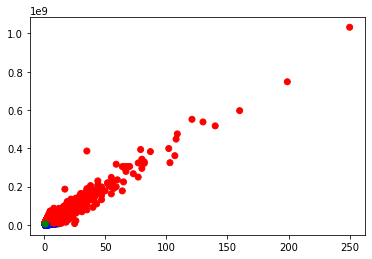

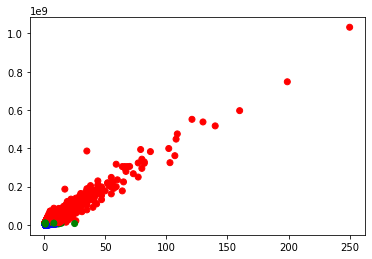

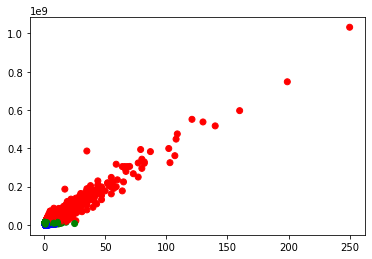

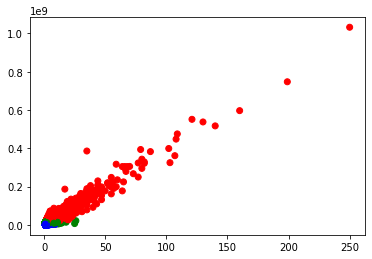

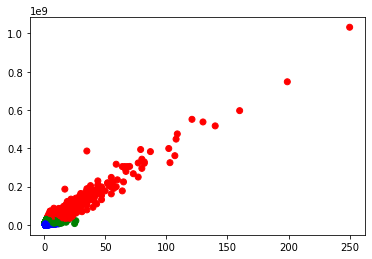

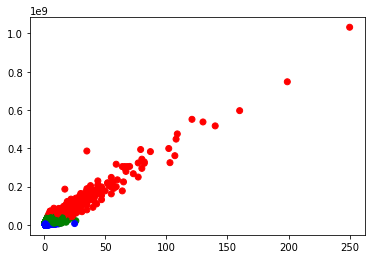

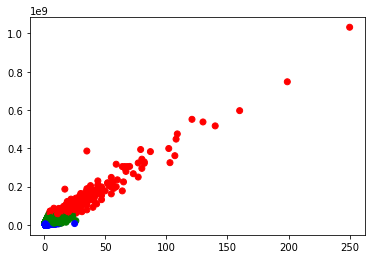

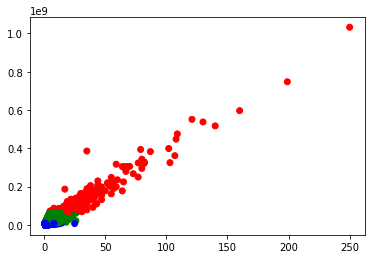

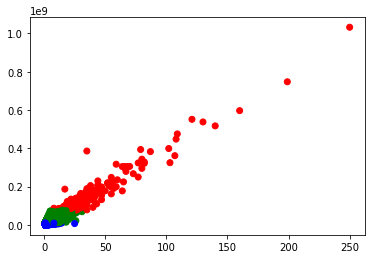

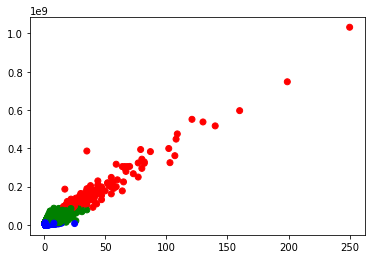

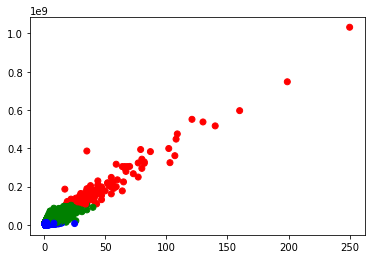

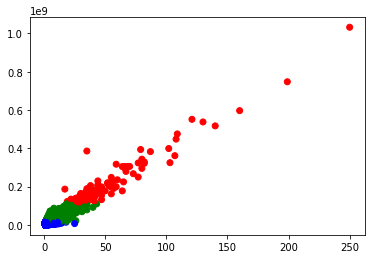

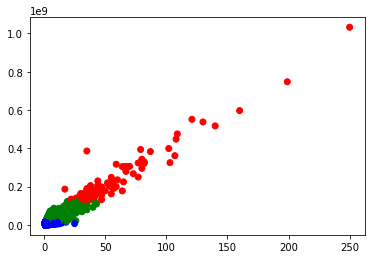

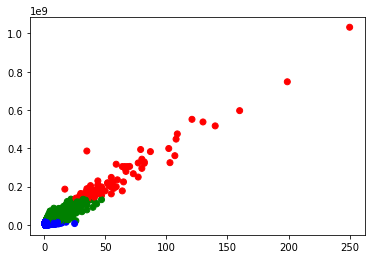

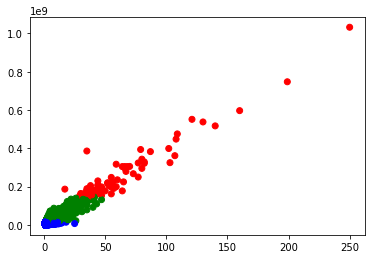

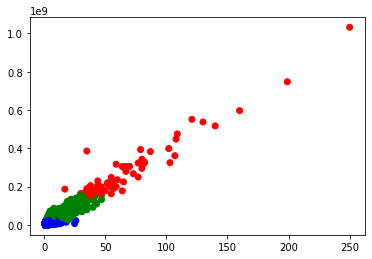

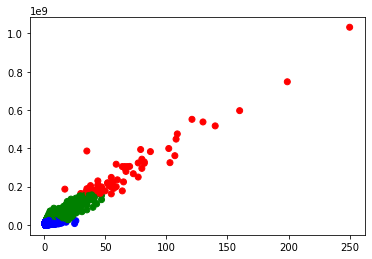

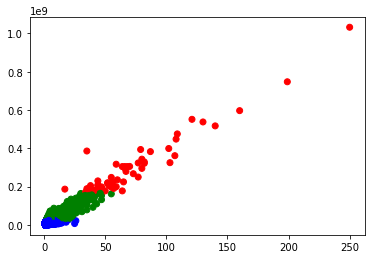

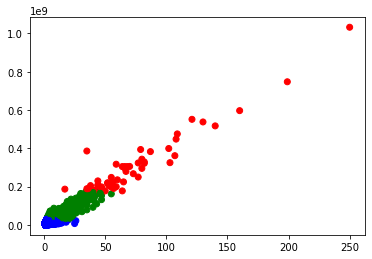

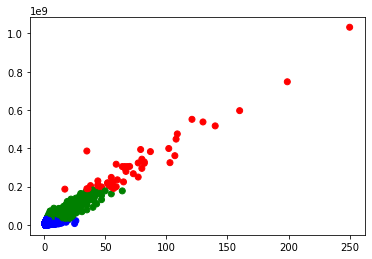

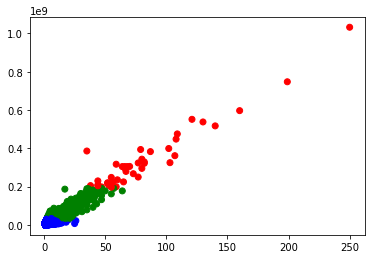

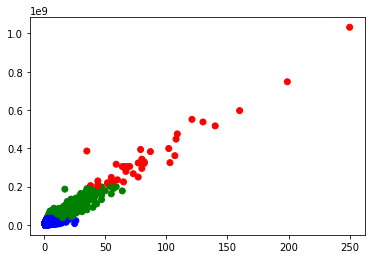

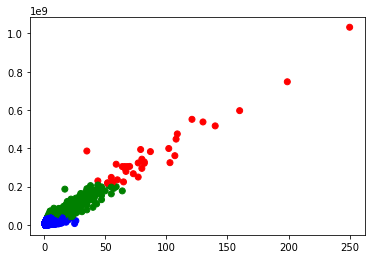

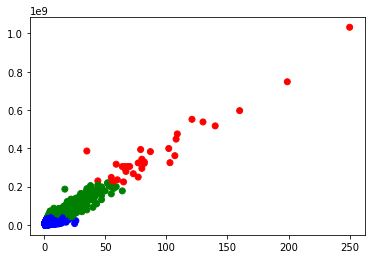

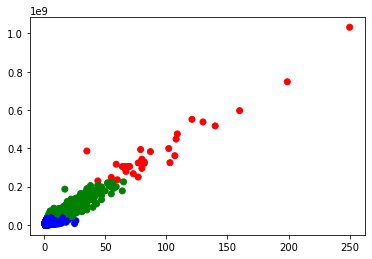

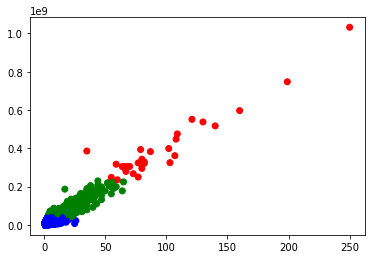

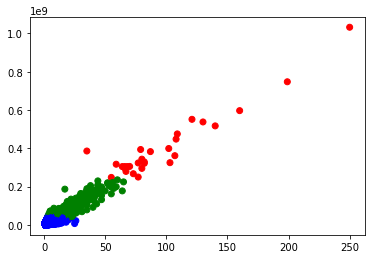

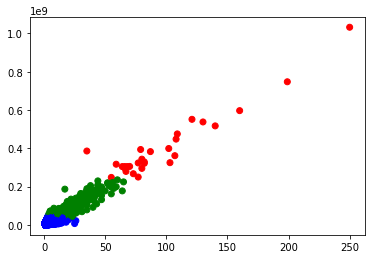

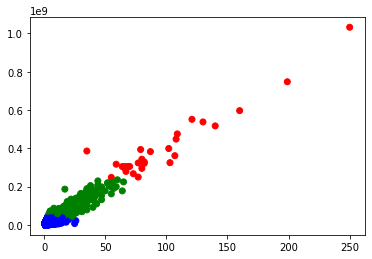

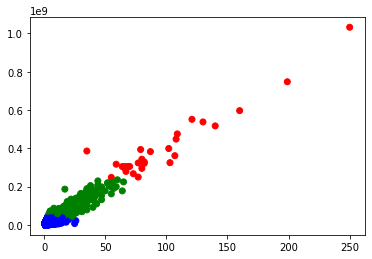

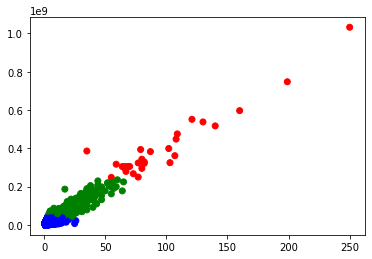

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [ ]:
dfSet = result[["numberOfTransaction","totalIncome"]]
pred, predCluster=MyKMean(dfSet,3,"modified","manhattan")
print(pred)
print(predCluster)

kmean++


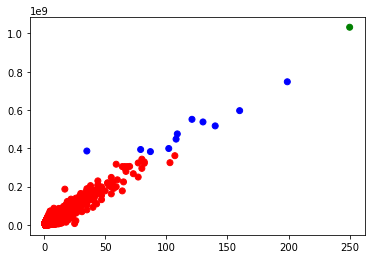

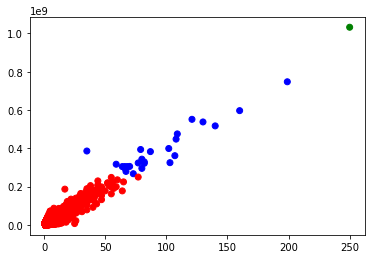

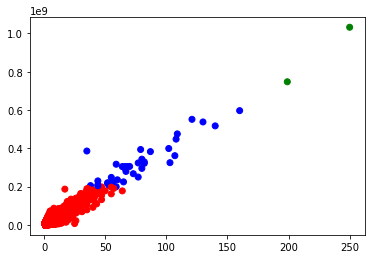

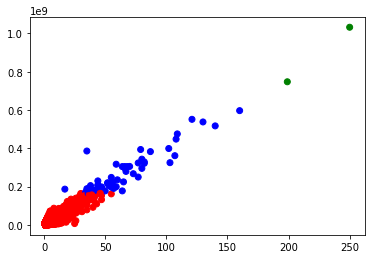

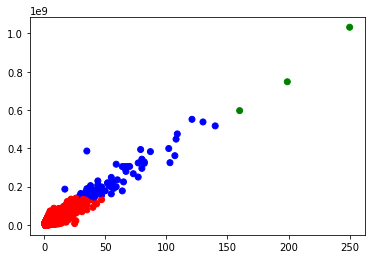

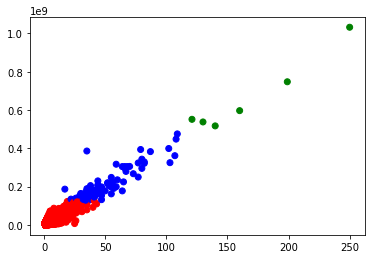

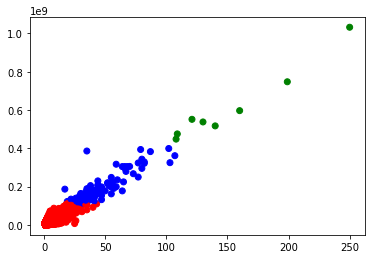

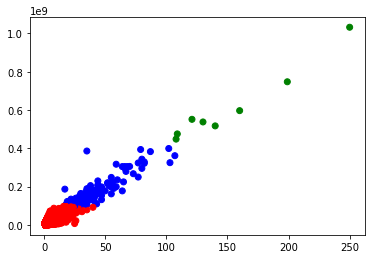

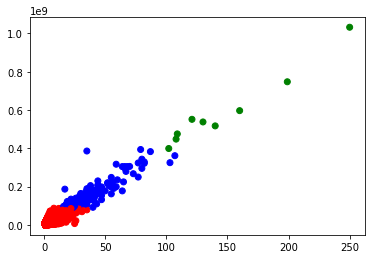

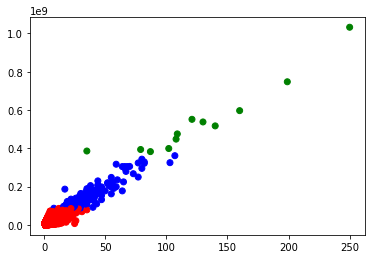

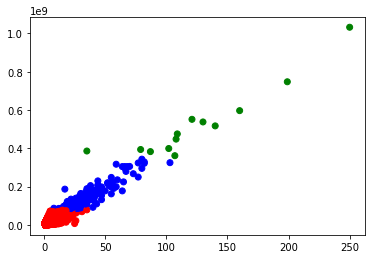

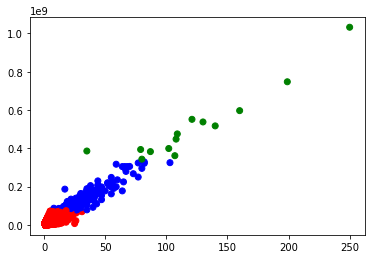

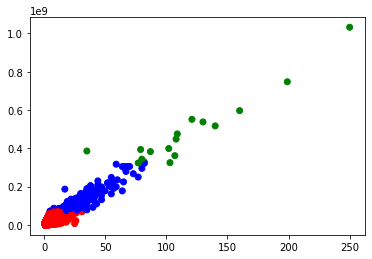

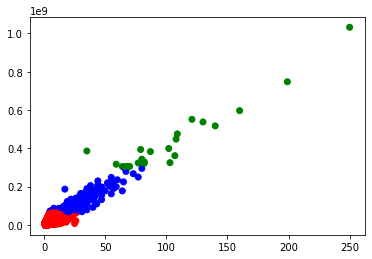

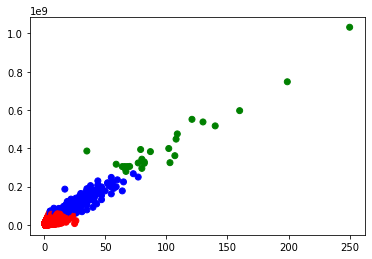

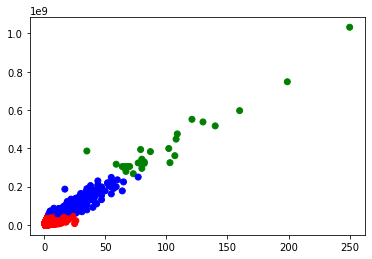

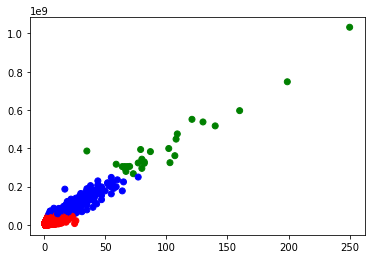

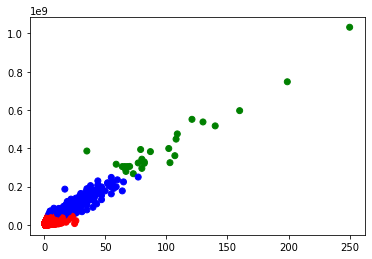

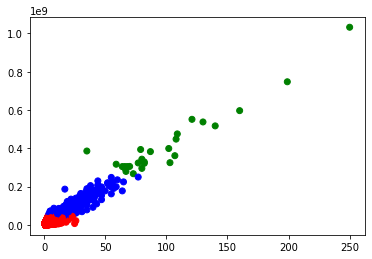

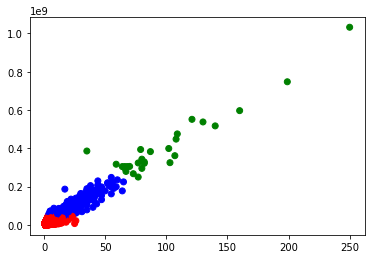

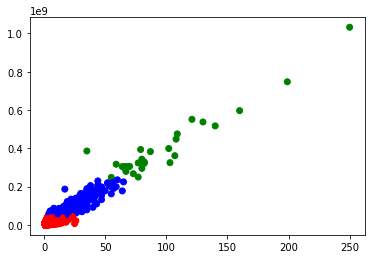

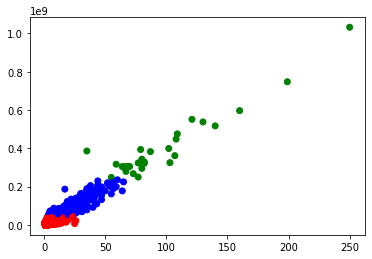

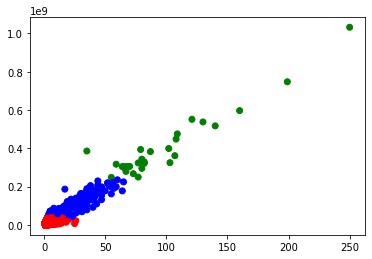

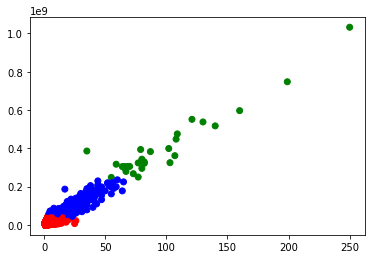

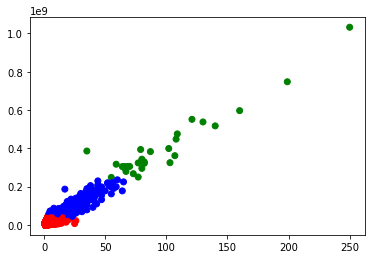

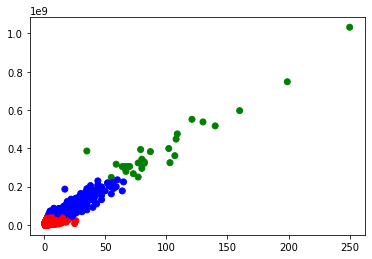

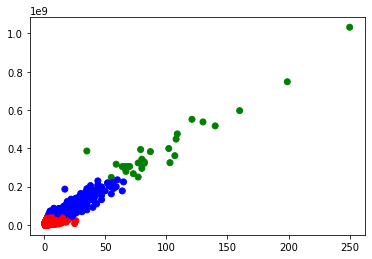

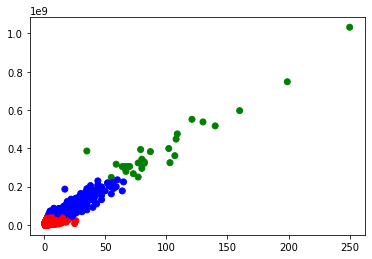

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
dfSet = result[["numberOfTransaction","totalIncome"]]
pred, predCluster=MyKMean(dfSet,3,"plus","manhattan")
print(pred)
print(predCluster)

##### 3.2.2 Kmean on Branch

In [ ]:
dfSet2 = result2[["numberOfTransaction","totalIncome"]]
dfFromBranch ,pred, predCluster=MyKMean(dfSet2,5,"modified","manhattan")
#print(pred)
#print(predCluster)
#print(dfFromBranch)
numDF = dfFromBranch.to_numpy()

Modified kmean++
162891374252238
1
2
3
4


In [ ]:

from sklearn.metrics import silhouette_score
score = silhouette_score(dfSet2, pred, metric='manhattan')
print(score)

0.5476140142949005


##### 3.2.3 Kmean on Customers

In [ ]:
from itertools import chain
resultDataframe = pd.concat([df1, df2], axis=1)
resultDataframe = resultDataframe.loc[:, ~resultDataframe.columns.duplicated()]
resultDataframe.rename(columns = {'COUNT(*)':'numberOfTransaction','SUM(`Jumlah Setor (HKD)`)':'totalIncome'}, inplace = True)
resultDataframe['cluster'] = list(pred)
qResult = "SELECT `Nama Cabang` FROM resultDataframe WHERE cluster = "+str(predCluster)+";"
dfResult = sqldf(qResult, globals())
numpyresult = (dfResult.to_numpy()).tolist()
flatten_numpyresult = list(chain.from_iterable(numpyresult))
flatten_numpyresult = tuple(flatten_numpyresult)
if(len(flatten_numpyresult) == 1):
  flatten_numpyresult = str(flatten_numpyresult)
  flatten_numpyresult = flatten_numpyresult.replace(",", "")
numpyresult_tuple = tuple(numpyresult)
qTestDf = "SELECT `Nama Pengirim`, COUNT(*),SUM(`Jumlah Dikirim`),`Nama Cabang` FROM df WHERE `Nama Cabang` IN {sql_list} GROUP BY `Nama Pengirim`".format(sql_list=flatten_numpyresult)
dfResultTest = sqldf(qTestDf, globals())
dfResultTest = dfResultTest.loc[:, ~dfResultTest.columns.duplicated()]
dfResultTest.rename(columns = {'COUNT(*)':'numberOfTransaction','SUM(`Jumlah Dikirim`)':'totalIncomeCustomers'}, inplace = True)
dfResultTest
#sql = 'SELECT * FROM products WHERE catid IN ('+(','.join(numpyresult))+')';

Nama Pengirim  numberOfTransaction  totalIncomeCustomers  \
0                   A ISAH                    9                 45080   
1              AAH  MARIAH                    2                  2194   
2               AAH KORIAH                    1                   500   
3            AAH MUTMAINAH                    8                 30170   
4               AAM AMILAH                    3                  6565   
...                    ...                  ...                   ...   
19755    zianatul maslakah                    1                  3500   
19756             zubaidah                    7                 12700   
19757             zuhriyah                    1                  3315   
19758          zulpa anisa                    1                   300   
19759  zumayni trianingsih                    1                  5000   

      Nama Cabang  
0             CHM  
1             CHM  
2             CHM  
3             CHM  
4             CHM  
...           ...  
19755         CHM  
19756         CHM  
19757         CHM  
19758         CHM  
19759         CHM  

[19760 rows x 4 columns]

Mofied kmean++


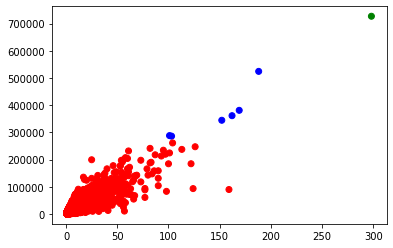

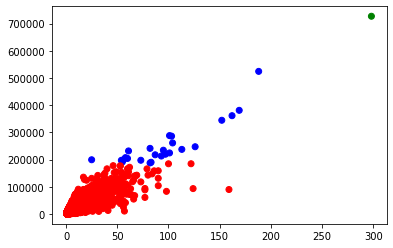

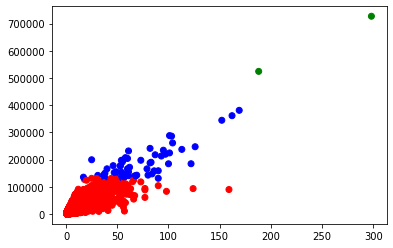

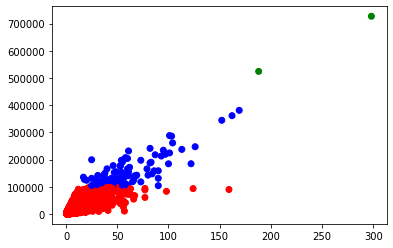

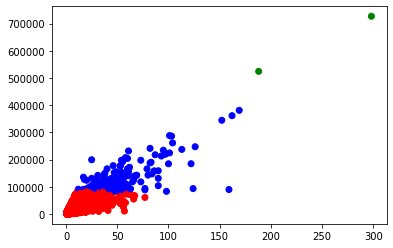

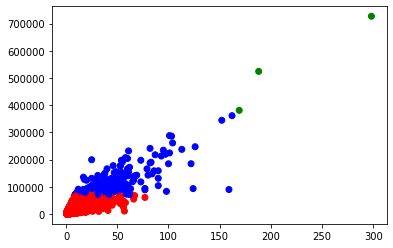

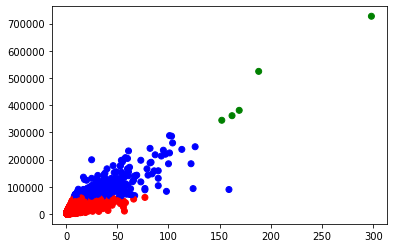

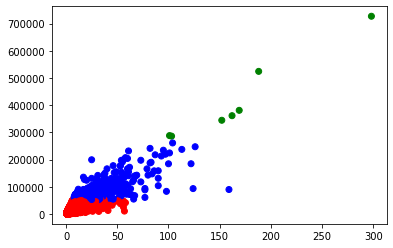

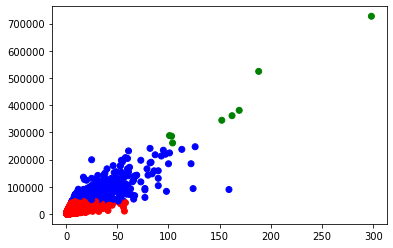

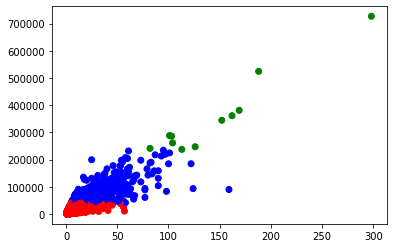

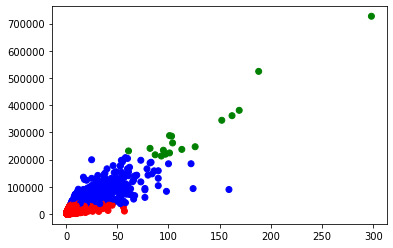

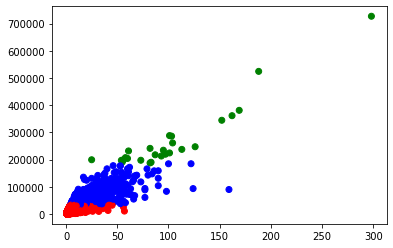

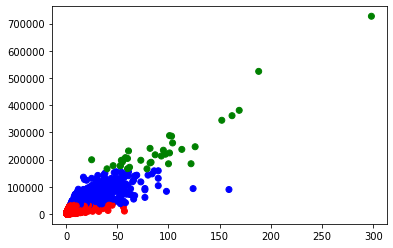

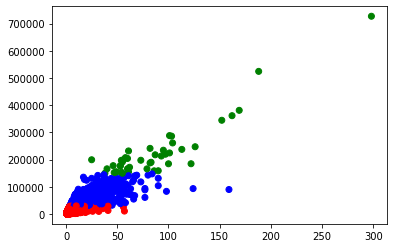

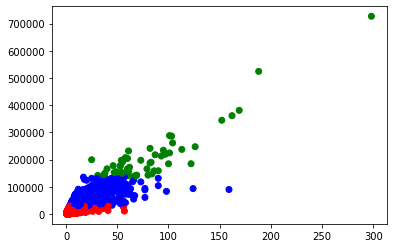

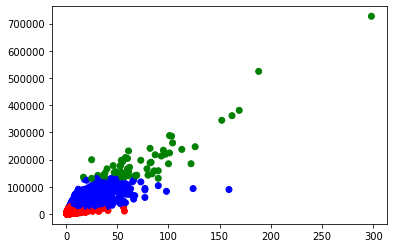

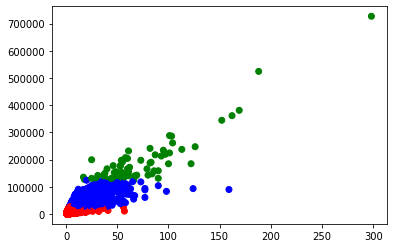

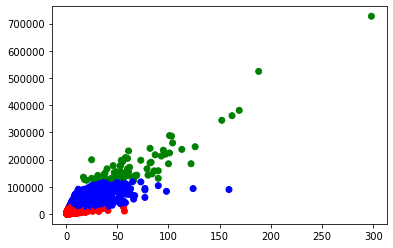

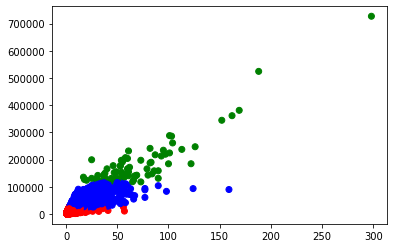

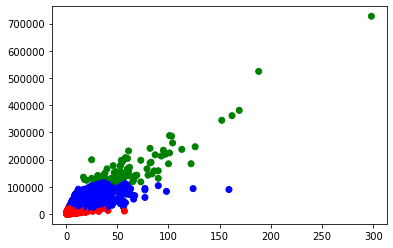

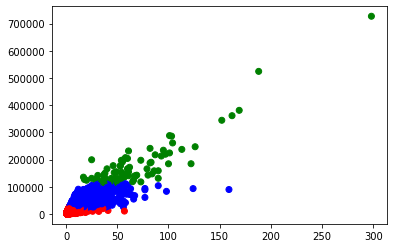

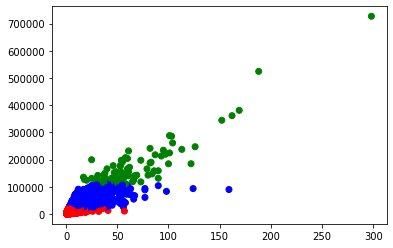

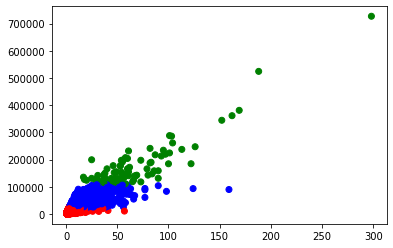

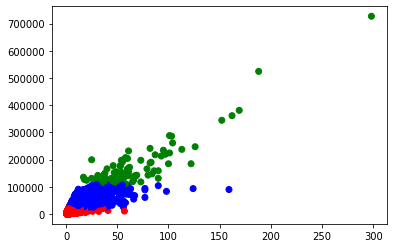

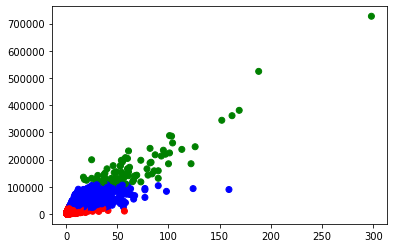

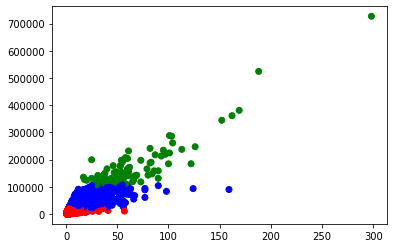

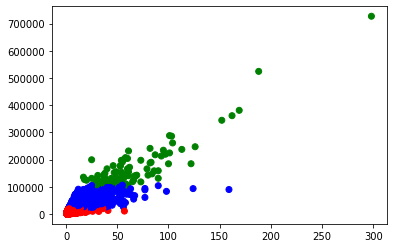

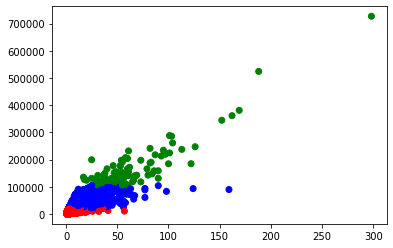

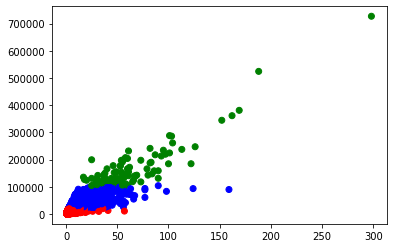

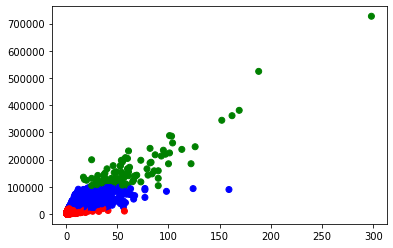

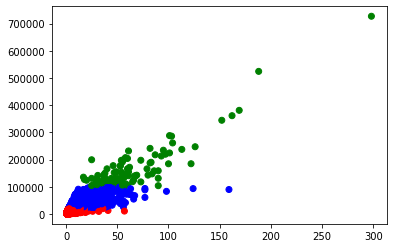

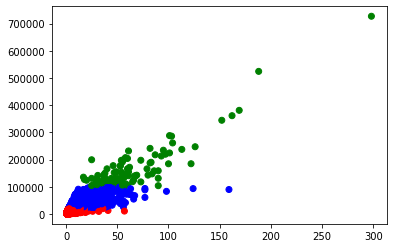

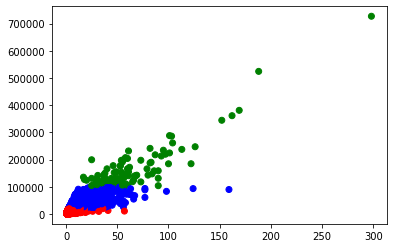

[2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 

In [ ]:
dfSet3 = dfResultTest[["numberOfTransaction","totalIncomeCustomers"]]
pred, predCluster=MyKMean(dfSet3,3,"modified","manhattan")
print(pred)
print(predCluster)

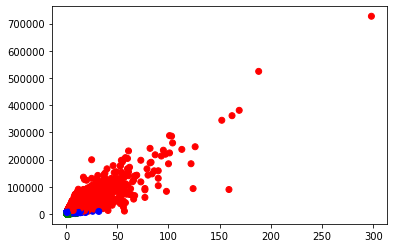

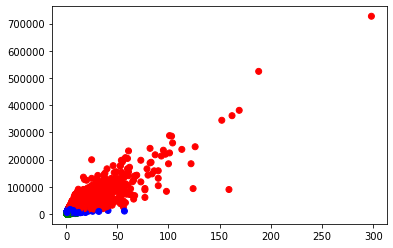

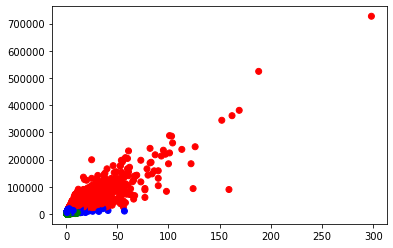

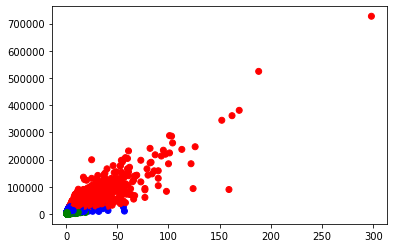

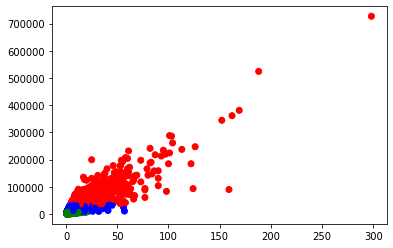

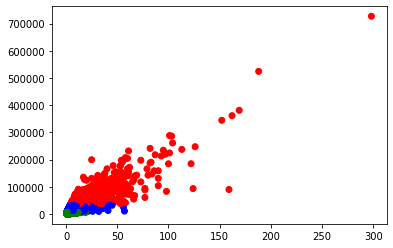

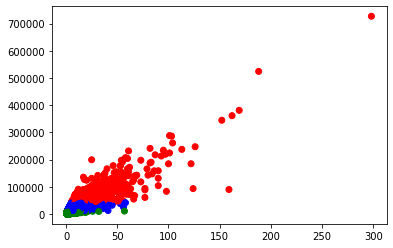

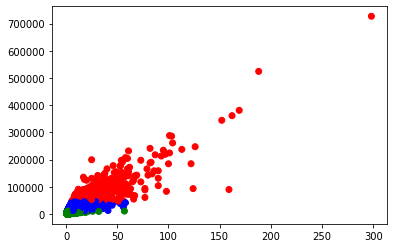

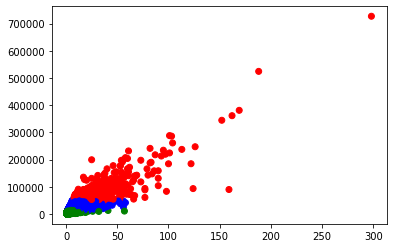

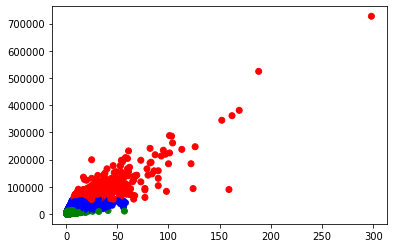

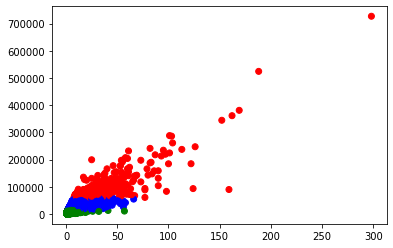

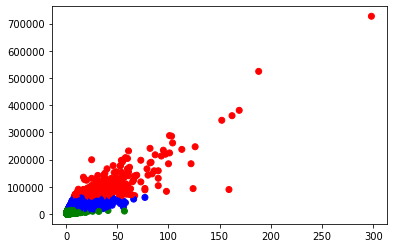

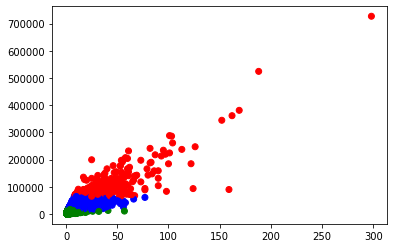

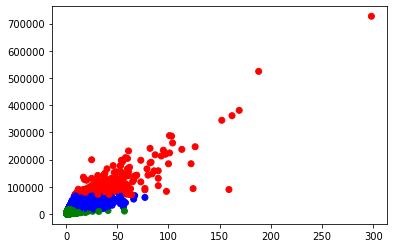

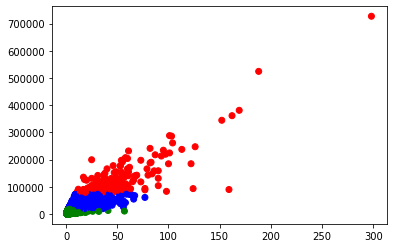

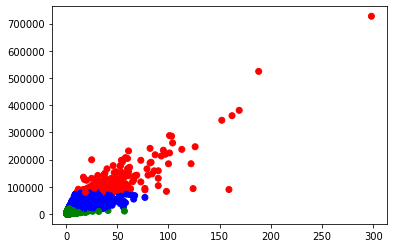

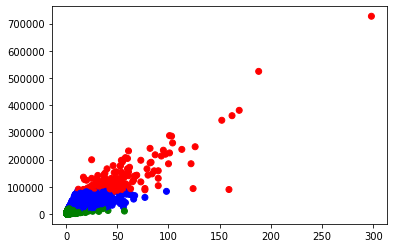

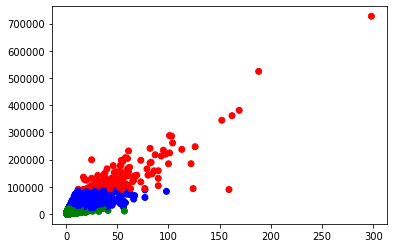

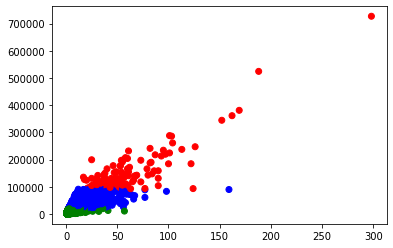

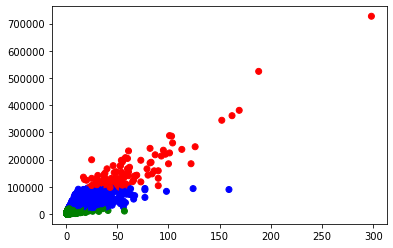

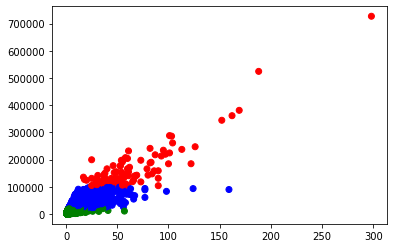

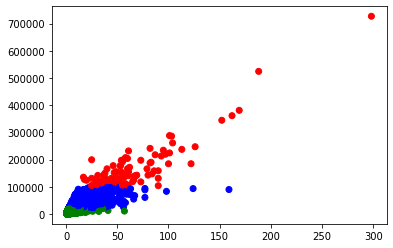

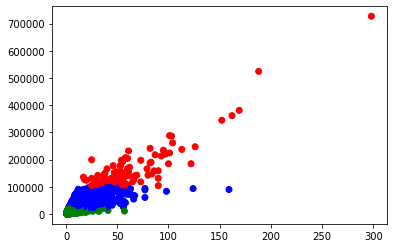

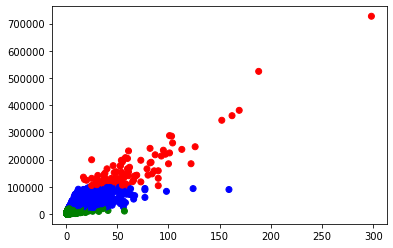

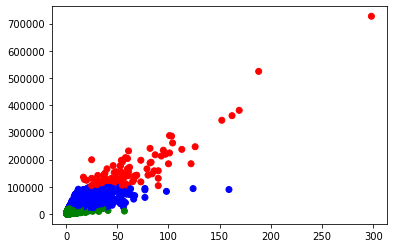

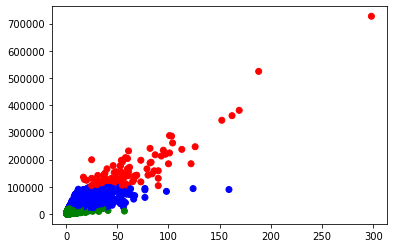

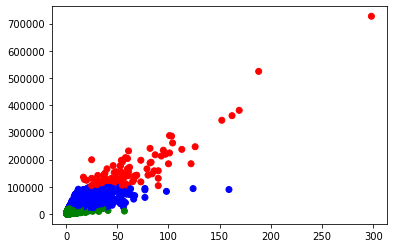

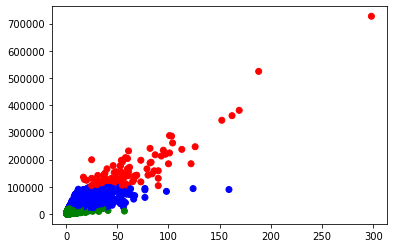

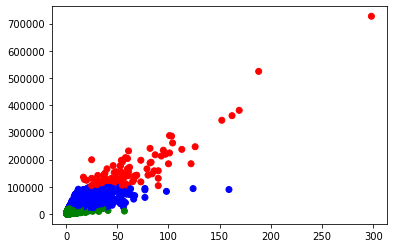

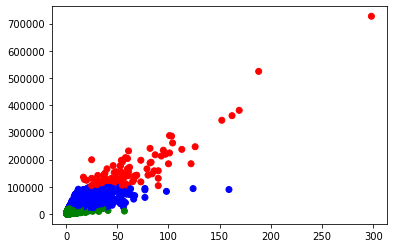

[2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 

In [ ]:
dfSet3 = dfResultTest[["numberOfTransaction","totalIncomeCustomers"]]
pred, predCluster=MyKMean(dfSet3,3,"","manhattan")
print(pred)
print(predCluster)

In [ ]:

from sklearn.metrics import silhouette_score
score = silhouette_score(dfSet3, pred, metric='euclidean')
#
print(score)

###3.3 canberra K mean

##### 3.3.1 Testing Kmean

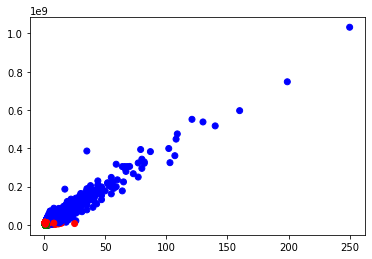

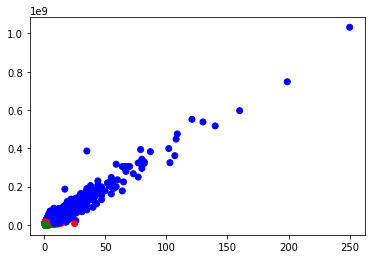

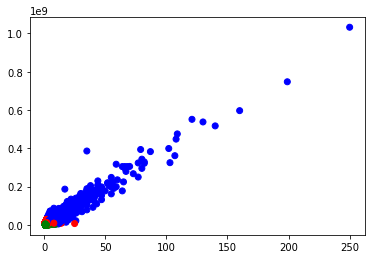

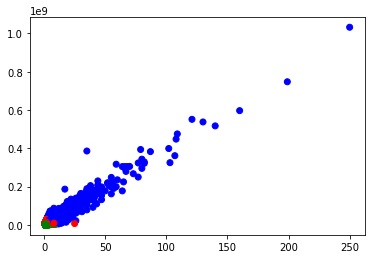

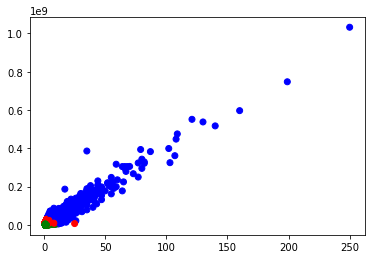

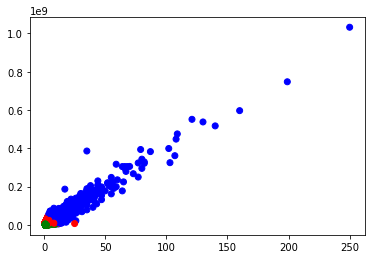

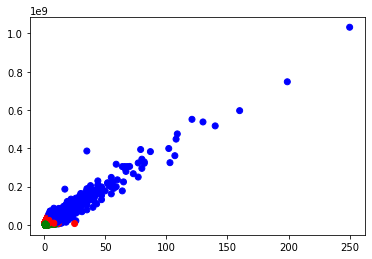

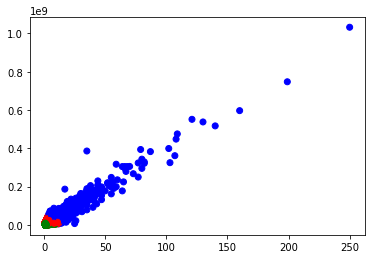

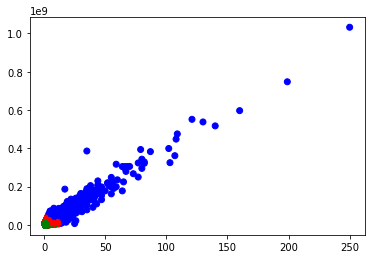

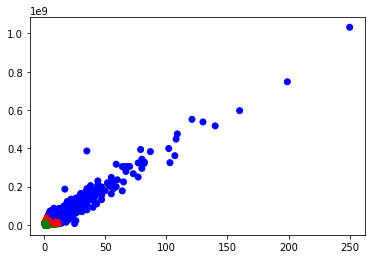

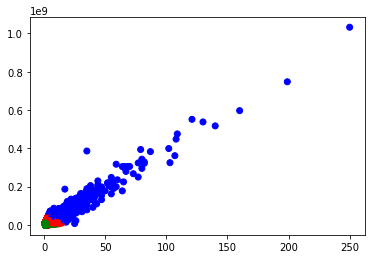

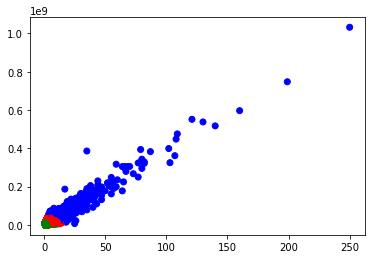

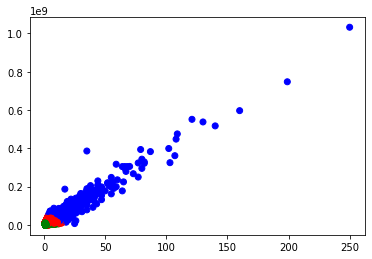

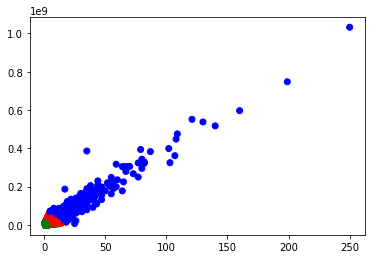

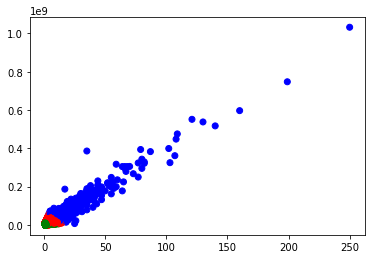

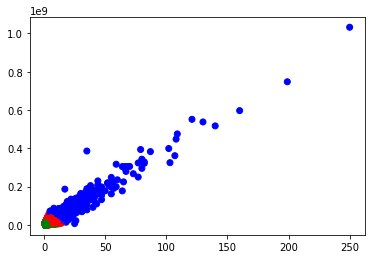

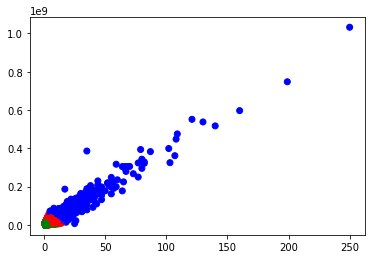

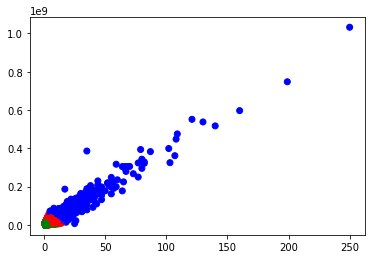

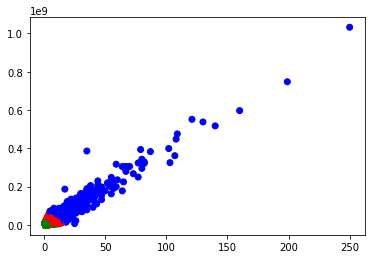

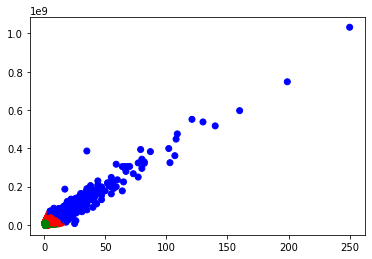

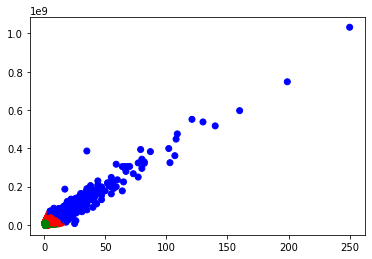

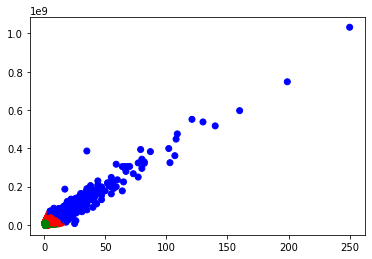

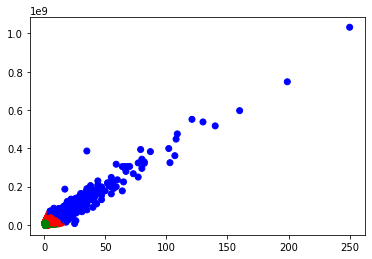

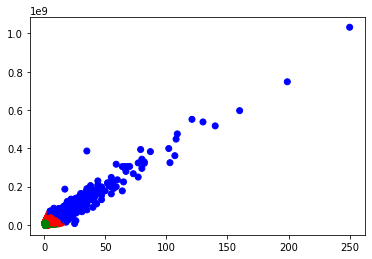

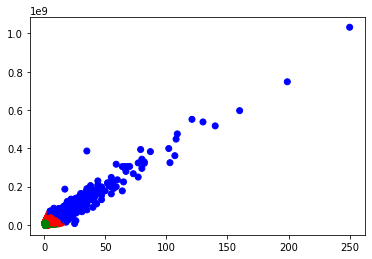

[1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 

In [ ]:
dfSet = result[["numberOfTransaction","totalIncome"]]
pred, predCluster= MyKMean(dfSet,3,"","canberra")
print(pred)
print(predCluster)

kmean++


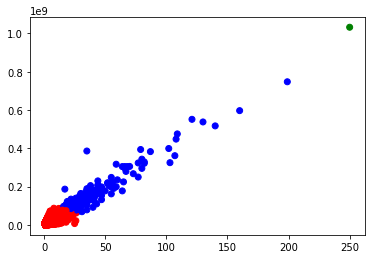

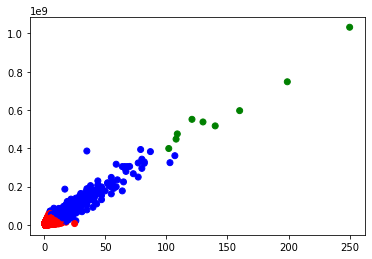

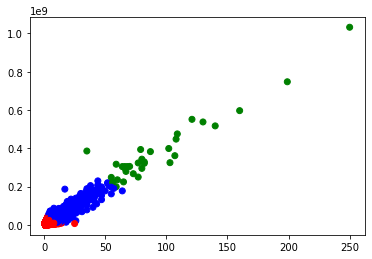

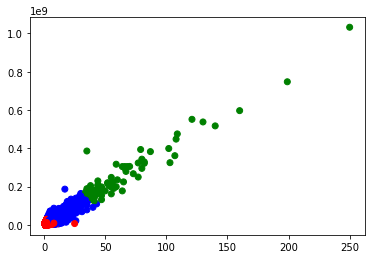

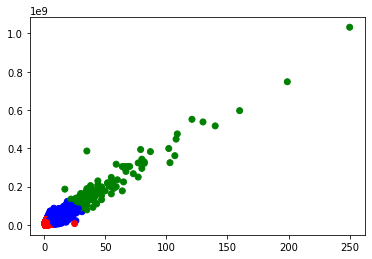

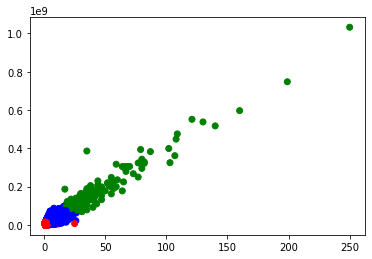

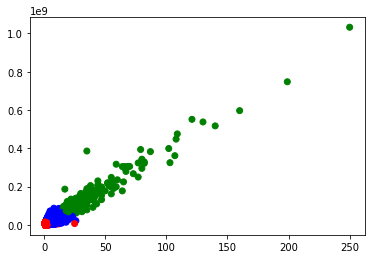

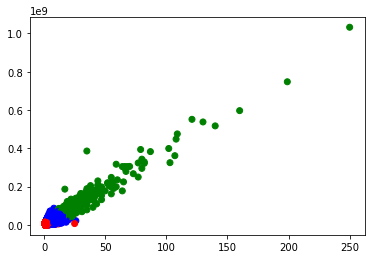

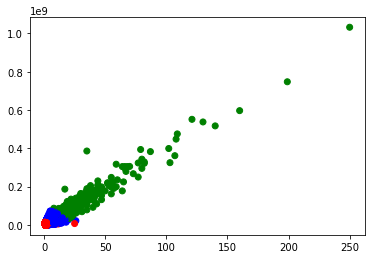

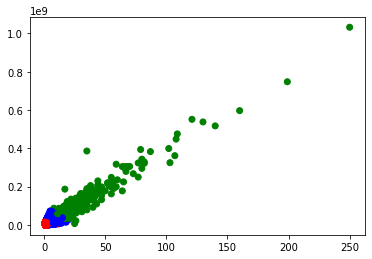

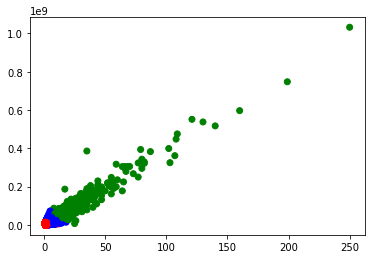

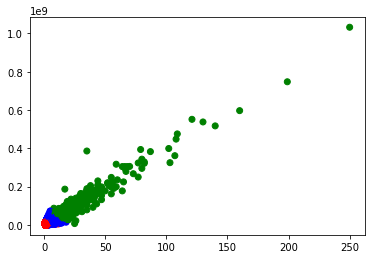

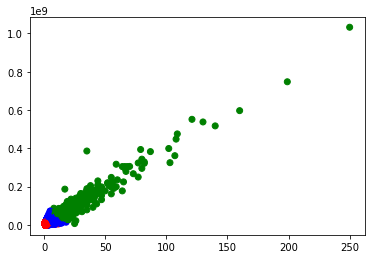

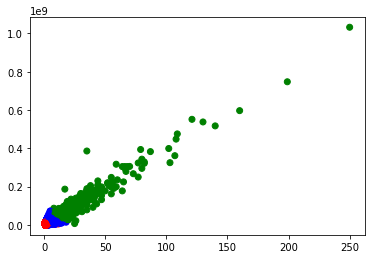

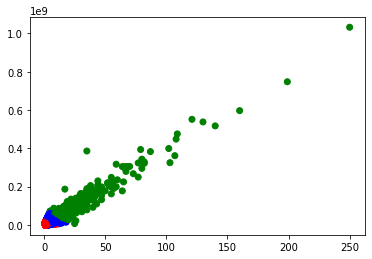

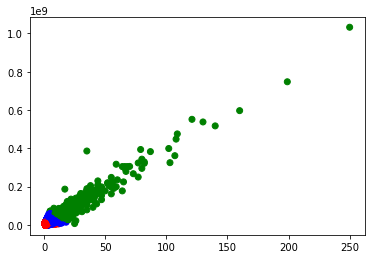

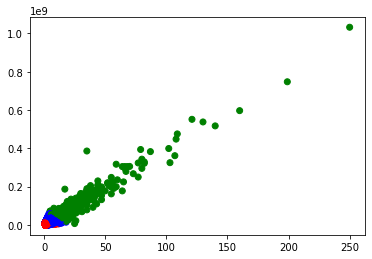

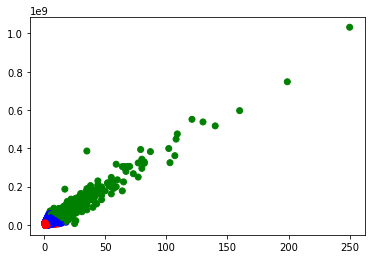

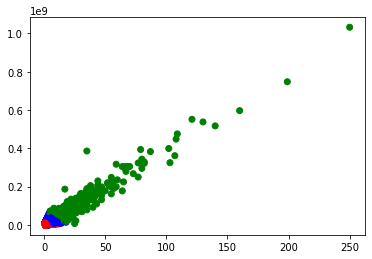

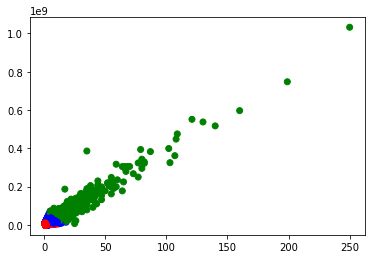

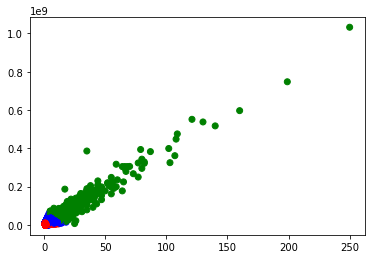

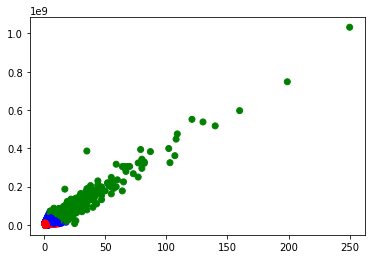

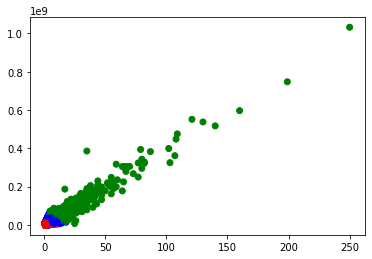

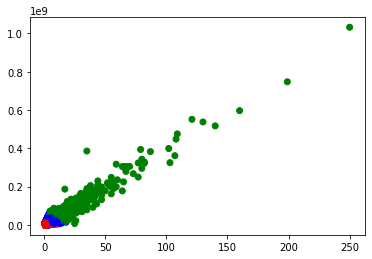

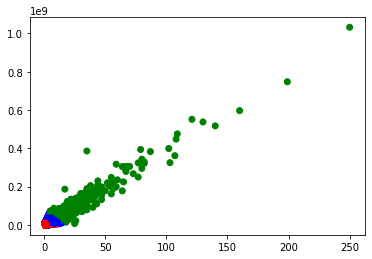

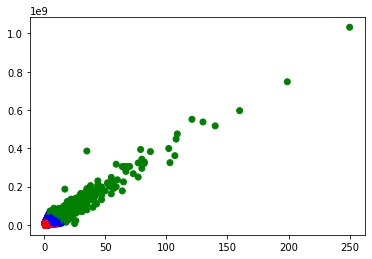

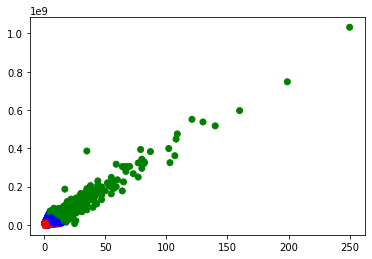

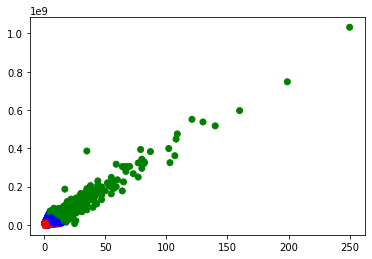

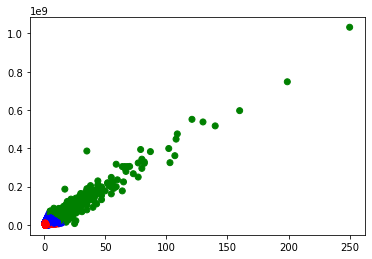

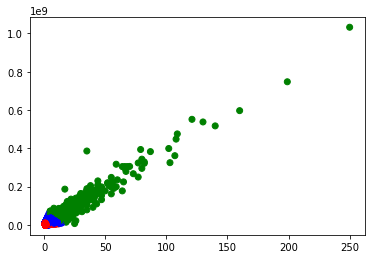

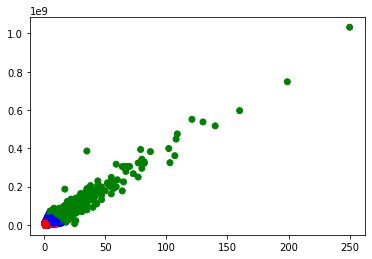

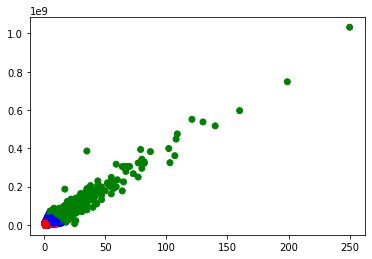

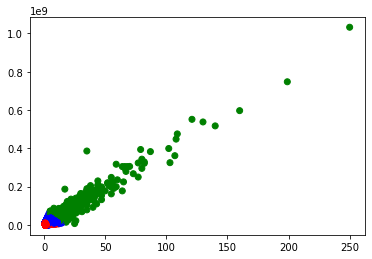

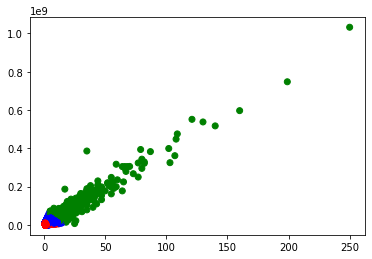

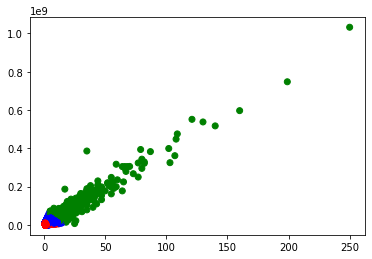

[0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 

In [ ]:
dfSet = result[["numberOfTransaction","totalIncome"]]
pred, predCluster= MyKMean(dfSet,3,"plus","canberra")
print(pred)
print(predCluster)

##### 3.3.2 Kmean on Branch

In [ ]:
dfSet2 = result2[["numberOfTransaction","totalIncome"]]
dfFromBranch ,pred, predCluster=MyKMean(dfSet2,5,"modified","canberra")
#print(pred)
#print(predCluster)
#print(dfFromBranch)
numDF = dfFromBranch.to_numpy()

Modified kmean++
162891374252238
1
2
3
4
5


In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(dfSet2, pred, metric='canberra')
print(score)

0.45240852056332853


##### 3.3.3 Kmean on Customers

In [ ]:
from itertools import chain
resultDataframe = pd.concat([df1, df2], axis=1)
resultDataframe = resultDataframe.loc[:, ~resultDataframe.columns.duplicated()]
resultDataframe.rename(columns = {'COUNT(*)':'numberOfTransaction','SUM(`Jumlah Setor (HKD)`)':'totalIncome'}, inplace = True)
resultDataframe['cluster'] = list(pred)
qResult = "SELECT `Nama Cabang` FROM resultDataframe WHERE cluster = "+str(predCluster)+";"
dfResult = sqldf(qResult, globals())
numpyresult = (dfResult.to_numpy()).tolist()
flatten_numpyresult = list(chain.from_iterable(numpyresult))
flatten_numpyresult = tuple(flatten_numpyresult)
#if(len(flatten_numpyresult) == 1):
flatten_numpyresult = str(flatten_numpyresult)
 # flatten_numpyresult = flatten_numpyresult.replace(",", "")
#numpyresult_tuple = tuple(numpyresult)
qTestDf = "SELECT `HKID`,`Nama Pengirim`, COUNT(*),SUM(`Jumlah Dikirim`),`Nama Cabang` FROM df WHERE `Nama Cabang` IN {sql_list} GROUP BY `HKID`".format(sql_list=flatten_numpyresult)
dfResultTest = sqldf(qTestDf, globals())
dfResultTest = dfResultTest.loc[:, ~dfResultTest.columns.duplicated()]
dfResultTest.rename(columns = {'COUNT(*)':'numberOfTransactionCustomers','SUM(`Jumlah Dikirim`)':'totalIncomeCustomers'}, inplace = True)
print(flatten_numpyresult)
dfResultTest
#sql = 'SELECT * FROM products WHERE catid IN ('+(','.join(numpyresult))+')';

('AG1', 'AGN', 'AP ', 'ASP', 'BY1', 'BY2', 'BY3', 'BY5', 'BY7', 'CHG', 'CHH', 'CHM', 'CHW', 'CMK', 'CSS', 'HH ', 'LT ', 'MAO', 'MF ', 'NP ', 'QBY', 'SAM', 'SKW', 'SYP', 'TKO', 'TP ', 'TW1', 'WCH', 'WTS', 'WU ', 'YL ')


HKID                 Nama Pengirim  numberOfTransactionCustomers  \
0      01D107515  CIULU  MIRCEA GABRIEL ROMANA                             2   
1        1443627                  FO KWET FONG                             1   
2       15048267                  LU YING YING                             3   
3        2313099                          siti                             3   
4        4095137                       UMAROOH                             1   
...          ...                           ...                           ...   
90788   w9819927                     NUR INDAH                             1   
90789  wX2934351                      PITRIYAH                             1   
90790  wX5436735                Lusi erliasari                             1   
90791  wx0259711                        SUMINI                             1   
90792  wx151684a                      SUWARSIH                             1   

       totalIncomeCustomers Nama Cabang  
0                      8000         CHM  
1                      2230         WU   
2                      3400         CHM  
3                      4610         NP   
4                      1470         QBY  
...                     ...         ...  
90788                  5450         BY7  
90789                   570         AGN  
90790                  3400         AGN  
90791                  5525         BY7  
90792                  5400         BY7  

[90793 rows x 5 columns]

In [ ]:
dfSet3 = dfResultTest[["numberOfTransactionCustomers","totalIncomeCustomers"]]
pred, predCluster=MyKMean(dfSet3,3,"modified","canberra")
print(pred)
print(predCluster)

Modified kmean++


KeyboardInterrupt: ignored

In [ ]:

from sklearn.metrics import silhouette_score
score = silhouette_score(dfSet3, pred, metric='canberra')
#
print(score)

0.4307930371423662


##### 3.3.4 Dataset Processing

In [ ]:
from itertools import chain

dfResultTest['clusterCustomer'] = list(predCustomers)
qResult = "SELECT `HKID` FROM dfResultTest WHERE clusterCustomer = "+str(predClusterCustomers)+";"
dfResultCustomers = sqldf(qResult, globals())
numpyresult = (dfResultCustomers.to_numpy()).tolist()
flatten_numpyresult = list(chain.from_iterable(numpyresult))
flatten_numpyresult = tuple(flatten_numpyresult)
flatten_numpyresult = str(flatten_numpyresult)
qTestDf = "SELECT `Tanggal`,SUM(`Jumlah Dikirim`), COUNT(`HKID`) FROM df WHERE `HKID` IN {sql_list} GROUP BY `Tanggal`".format(sql_list=flatten_numpyresult)
dfResultTest2 = sqldf(qTestDf, globals())
dfResultTest2 = dfResultTest2.loc[:, ~dfResultTest2.columns.duplicated()]
dfResultTest2.rename(columns = {'COUNT(*)':'numberOfTransaction','SUM(`Jumlah Dikirim`)':'totalIncomeCustomers'}, inplace = True)
dfResultTest2


##### 3.3.4 LSTM Processing

In [ ]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(dfResultTest2, test_size=0.1, random_state=21)
training_set = training_data.iloc[:,1:2].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []
for i in range(10, training_set_scaled.size):
    X_train.append(training_set_scaled[i-10:i,0])
    y_train.append(training_set_scaled[i,0])    
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
#part 2 - BUilding RNN/LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
# Initializing the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 1000, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(LSTM(units = 350, return_sequences = True))
regressor.add(LSTM(units = 10))
# Adding the output layer
regressor.add(Dense(units = 1))
# Compile the RNN/LSTM
regressor.compile(optimizer = 'adam', metrics=['accuracy'], loss = 'mean_squared_error')
# Fitting the RNN/LSTM to training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

In [ ]:
# Getting the predicted stock price of 2017
dataset_test = testing_data
dataset_train = training_data
real_income  = dataset_test.iloc[:, 1:2].values

dataset_total = pd.concat((dataset_train['totalIncomeCustomers'], dataset_test['totalIncomeCustomers']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 10:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
print(inputs.shape)

In [ ]:

# Creating a data structure with 60 timestamps and 1 output
X_test = []
for i in range(10, inputs.shape[0]):
    X_test.append(inputs[i-10:i, 0])
X_test = np.array(X_test)

# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Scaling
predicted_income = regressor.predict(X_test)
predicted_income = sc.inverse_transform(predicted_income)

In [ ]:

# Visualizing the results
plt.plot(real_income, color = 'red', label = 'Real Income Prediction')
plt.plot(predicted_income, color = 'blue', label = 'Income Prediction')
plt.title('Income Prediction')
plt.xlabel('Time')
plt.ylabel('Income')
plt.legend()
plt.show()

import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_income, predicted_income))

print(rmse)

###3.4 chebyshev K mean

##### 3.4.1 Testing Kmean

KeyError: ignored

kmean++


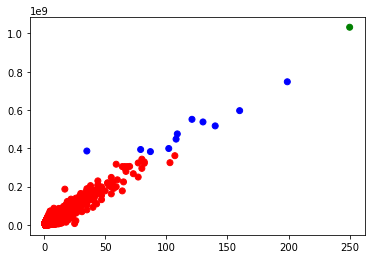

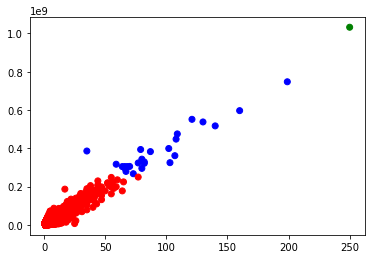

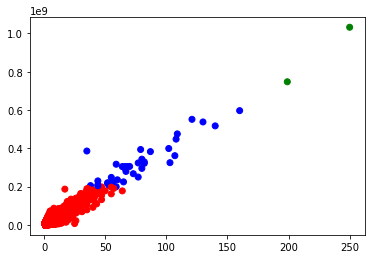

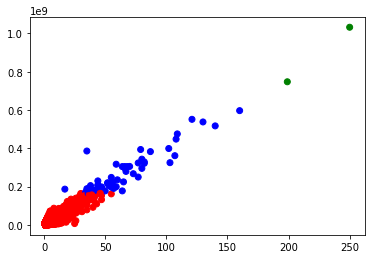

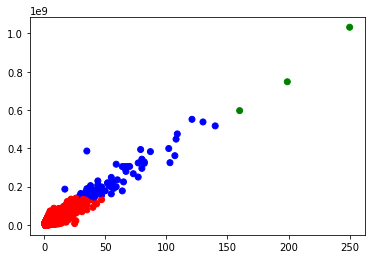

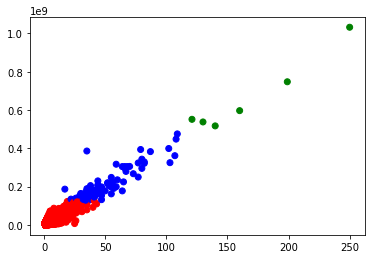

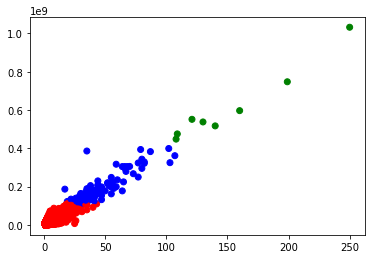

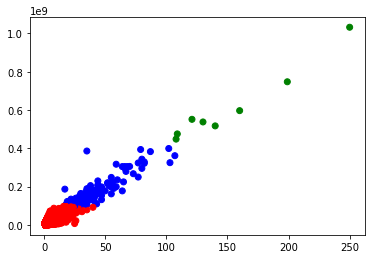

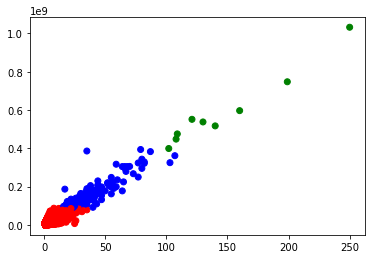

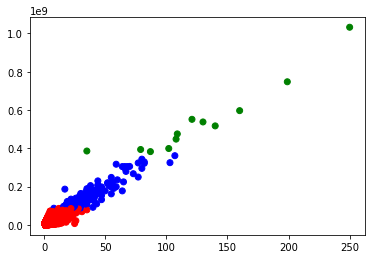

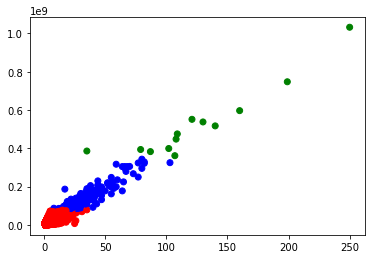

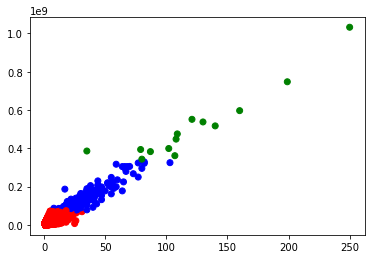

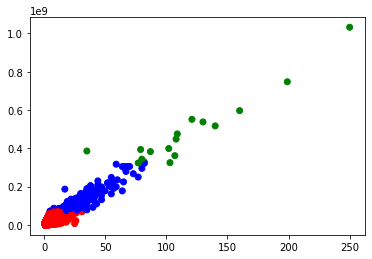

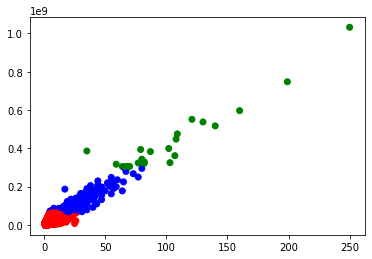

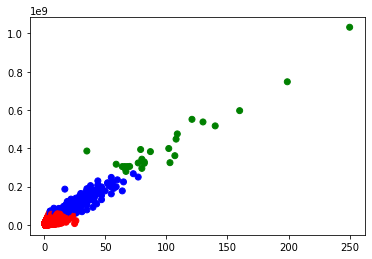

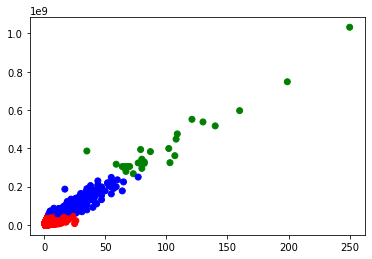

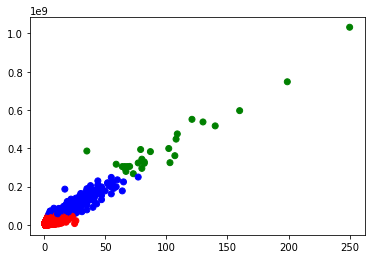

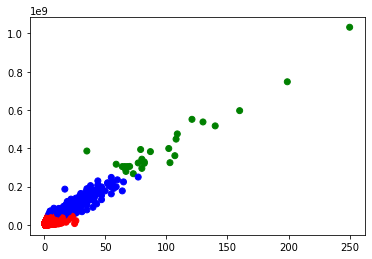

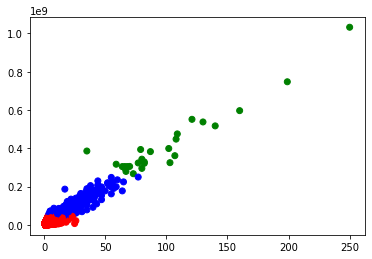

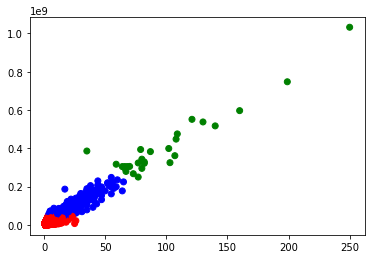

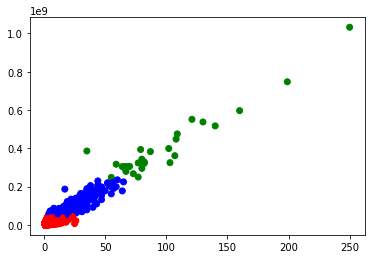

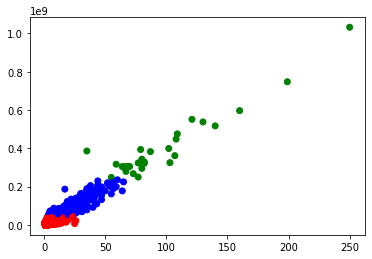

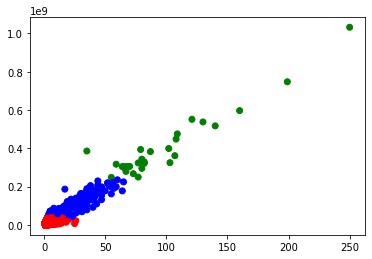

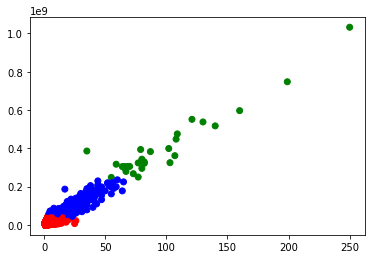

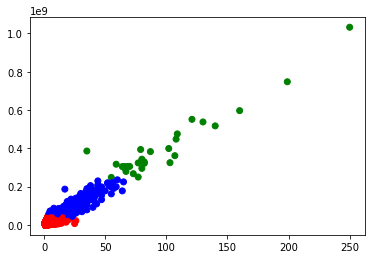

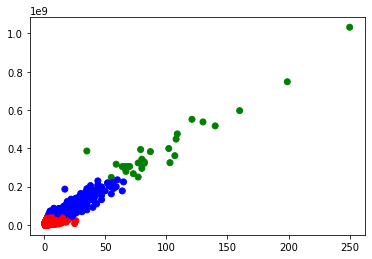

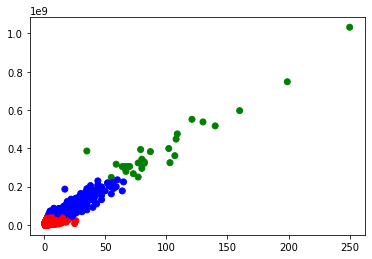

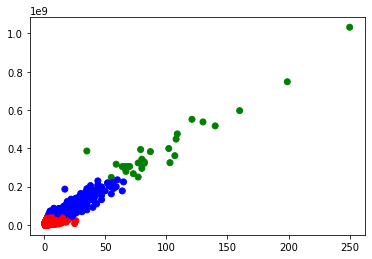

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
dfSet = result[["numberOfTransaction","totalIncome"]]
pred, predCluster=MyKMean(dfSet,3,"plus","chebyshev")
print(pred)
print(predCluster)

##### 3.4.2 Kmean on Branch

In [ ]:
dfSet2 = result2[["numberOfTransaction","totalIncome"]]
dfFromBranch ,pred, predCluster=MyKMean(dfSet2,5,"modified","chebyshev")
#print(pred)
#print(predCluster)
#print(dfFromBranch)
numDF = dfFromBranch.to_numpy()

Modified kmean++
162891374252238
1
2
3
4


In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(dfSet2, pred, metric='chebyshev')
print(score)

0.5476124019761764


##### 3.4.3 Kmean on Customers

In [ ]:
from itertools import chain
resultDataframe = pd.concat([df1, df2], axis=1)
resultDataframe = resultDataframe.loc[:, ~resultDataframe.columns.duplicated()]
resultDataframe.rename(columns = {'COUNT(*)':'numberOfTransaction','SUM(`Jumlah Setor (HKD)`)':'totalIncome'}, inplace = True)
resultDataframe['cluster'] = list(pred)
qResult = "SELECT `Nama Cabang` FROM resultDataframe WHERE cluster = "+str(predCluster)+";"
dfResult = sqldf(qResult, globals())
numpyresult = (dfResult.to_numpy()).tolist()
flatten_numpyresult = list(chain.from_iterable(numpyresult))
flatten_numpyresult = tuple(flatten_numpyresult)
if(len(flatten_numpyresult) == 1):
  flatten_numpyresult = str(flatten_numpyresult)
  flatten_numpyresult = flatten_numpyresult.replace(",", "")
numpyresult_tuple = tuple(numpyresult)
qTestDf = "SELECT `Nama Pengirim`, COUNT(*),SUM(`Jumlah Dikirim`),`Nama Cabang` FROM df WHERE `Nama Cabang` IN {sql_list} GROUP BY `Nama Pengirim`".format(sql_list=flatten_numpyresult)
dfResultTest = sqldf(qTestDf, globals())
dfResultTest = dfResultTest.loc[:, ~dfResultTest.columns.duplicated()]
dfResultTest.rename(columns = {'COUNT(*)':'numberOfTransaction','SUM(`Jumlah Dikirim`)':'totalIncomeCustomers'}, inplace = True)
dfResultTest
#sql = 'SELECT * FROM products WHERE catid IN ('+(','.join(numpyresult))+')';

Nama Pengirim  numberOfTransaction  totalIncomeCustomers  \
0                   A ISAH                    9                 45080   
1              AAH  MARIAH                    2                  2194   
2               AAH KORIAH                    1                   500   
3            AAH MUTMAINAH                    8                 30170   
4               AAM AMILAH                    3                  6565   
...                    ...                  ...                   ...   
19755    zianatul maslakah                    1                  3500   
19756             zubaidah                    7                 12700   
19757             zuhriyah                    1                  3315   
19758          zulpa anisa                    1                   300   
19759  zumayni trianingsih                    1                  5000   

      Nama Cabang  
0             CHM  
1             CHM  
2             CHM  
3             CHM  
4             CHM  
...           ...  
19755         CHM  
19756         CHM  
19757         CHM  
19758         CHM  
19759         CHM  

[19760 rows x 4 columns]

Mofied kmean++


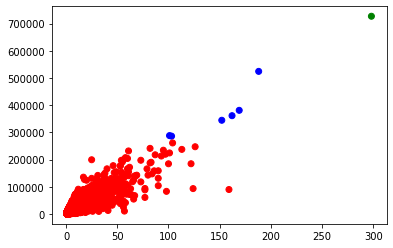

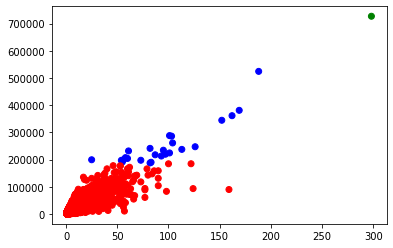

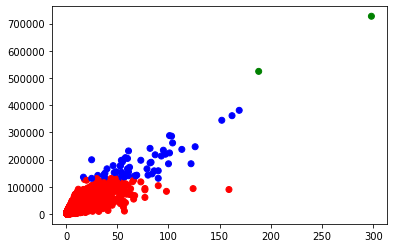

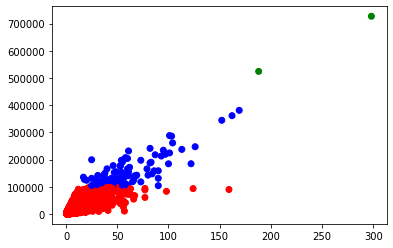

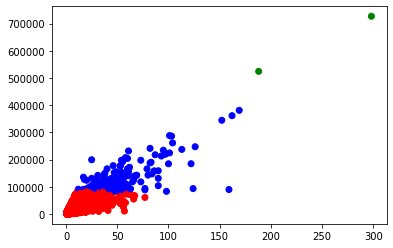

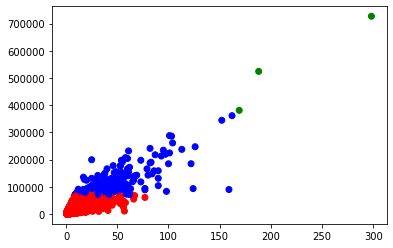

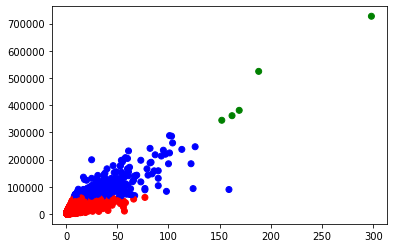

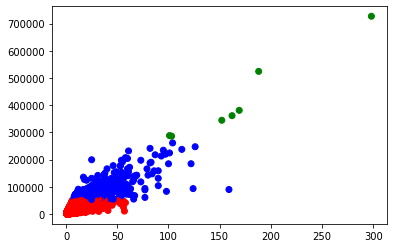

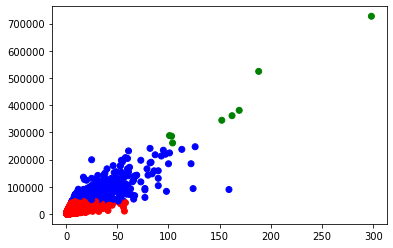

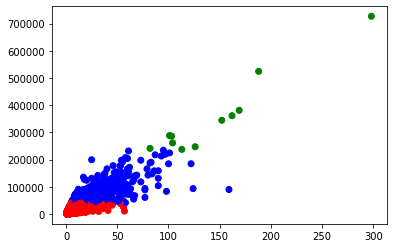

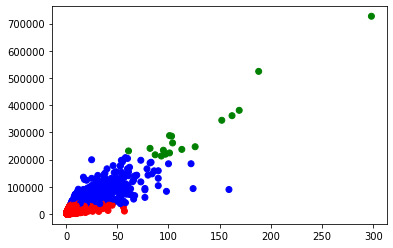

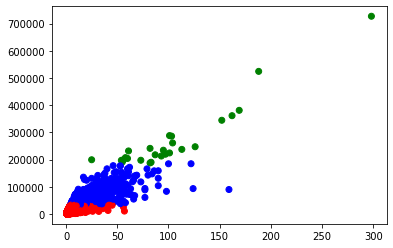

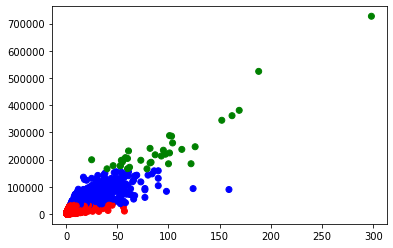

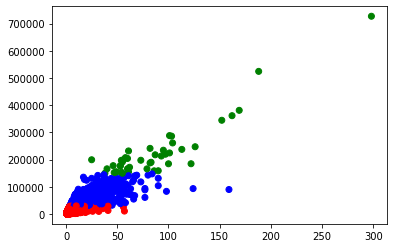

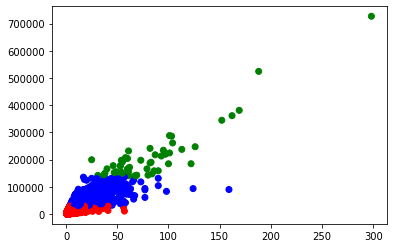

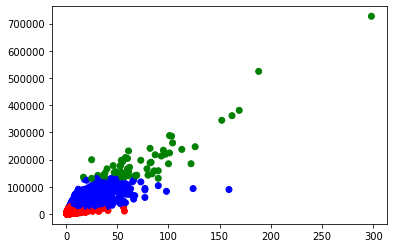

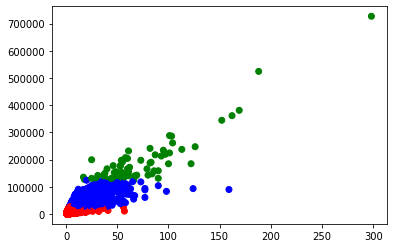

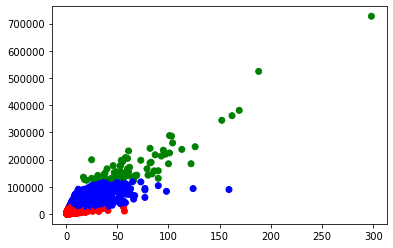

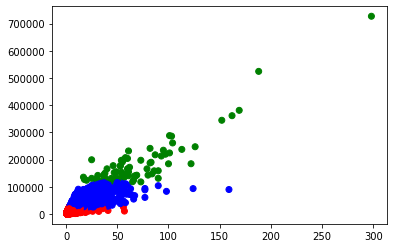

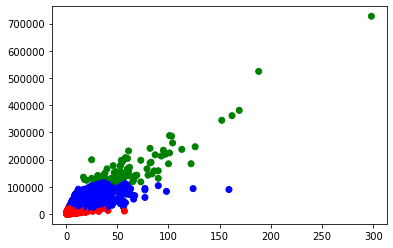

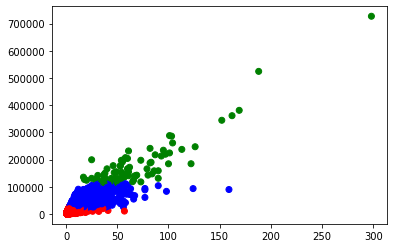

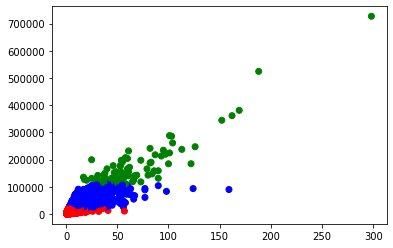

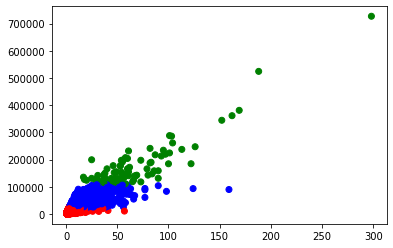

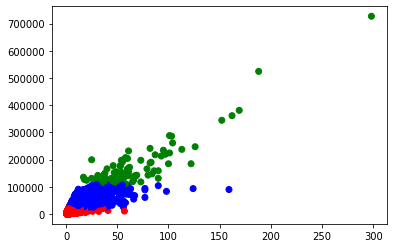

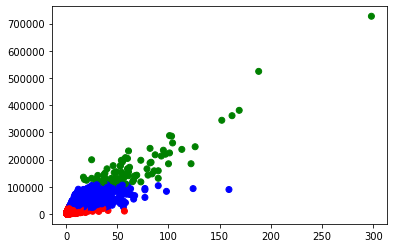

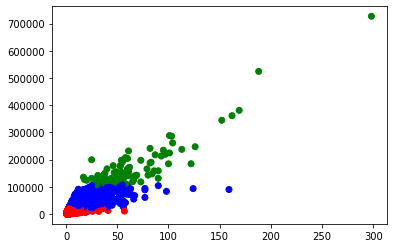

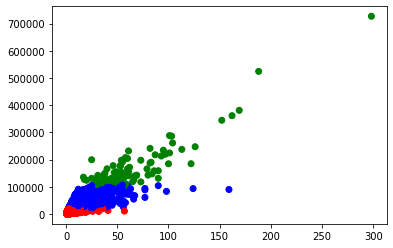

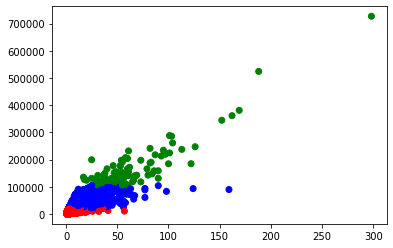

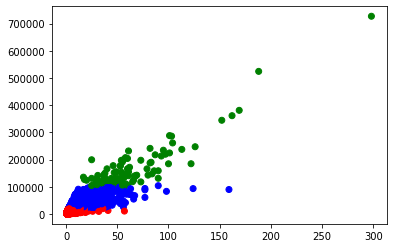

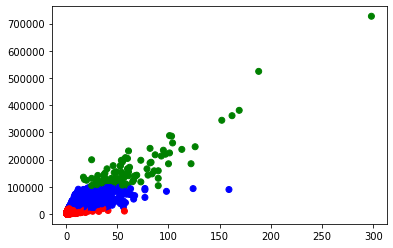

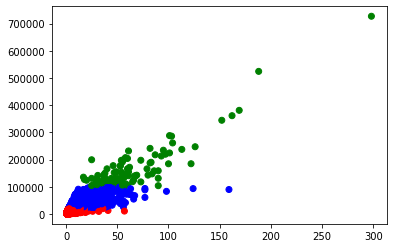

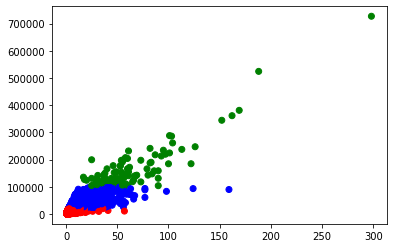

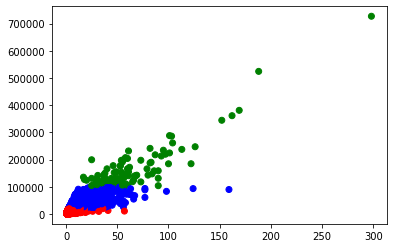

[2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 

In [ ]:
dfSet3 = dfResultTest[["numberOfTransaction","totalIncomeCustomers"]]
pred, predCluster=MyKMean(dfSet3,3,"modified","chebyshev")
print(pred)
print(predCluster)

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(dfSet3, pred, metric='manhattan')
#
print(score)

0.7684085361106053


###3.5 braycurtis K mean

##### 3.5.1 Testing Kmean

27454
---


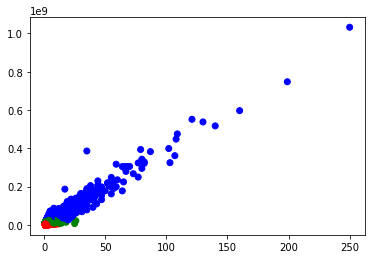

---


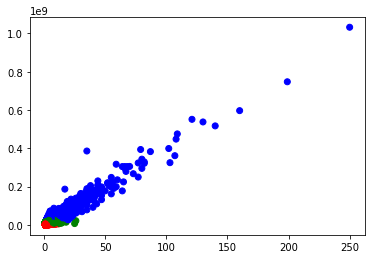

---


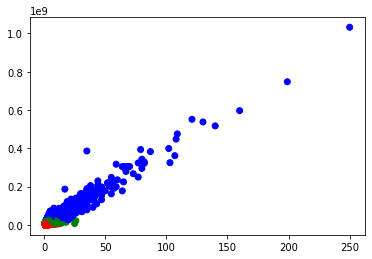

---


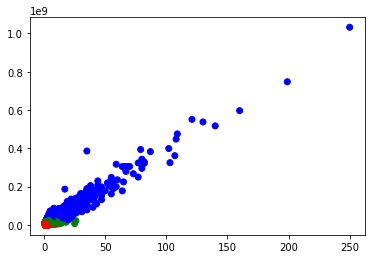

---


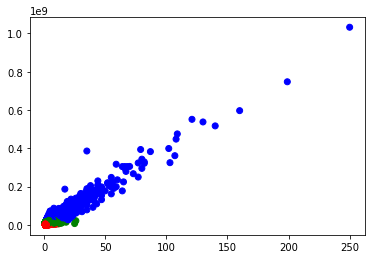

---


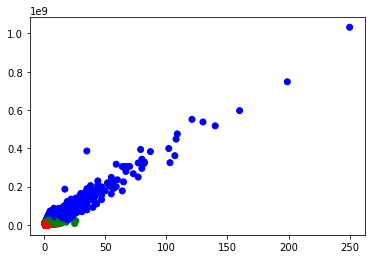

---


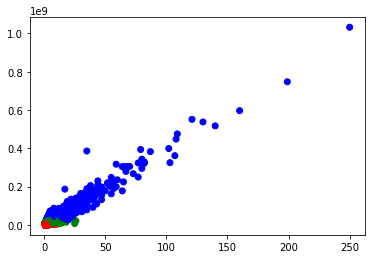

---


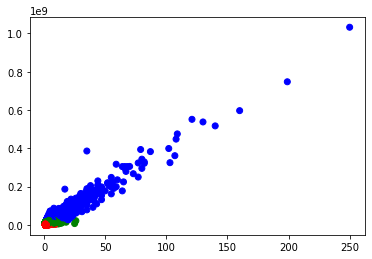

---


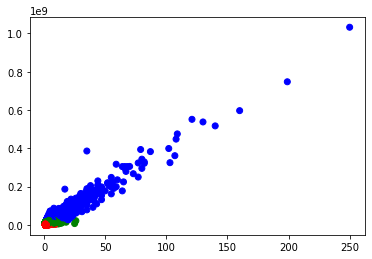

---


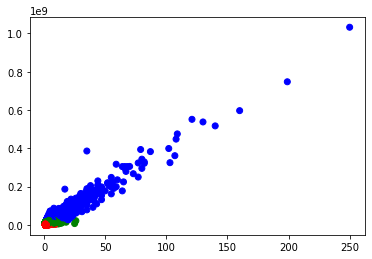

---


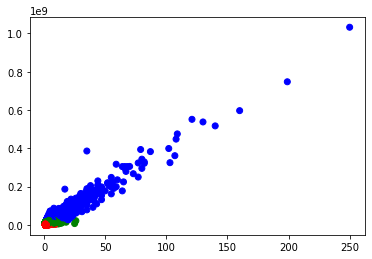

---


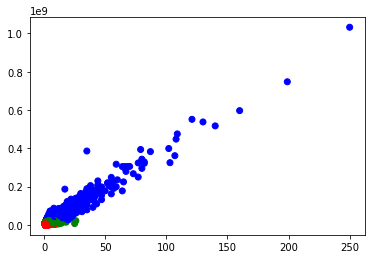

---


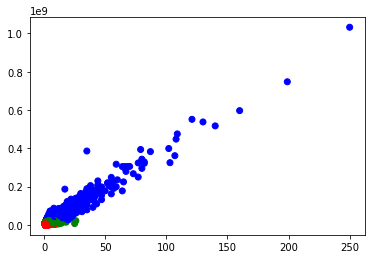

---


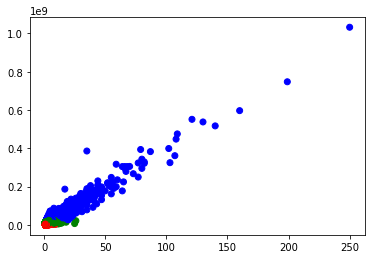

---


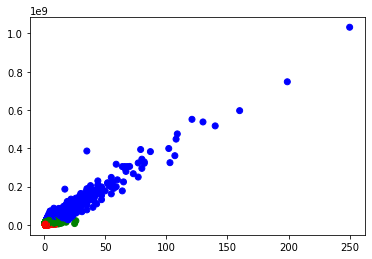

---


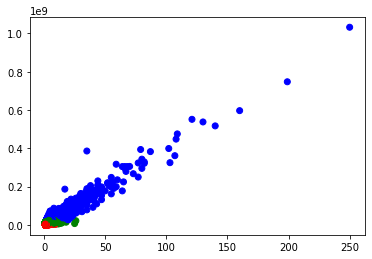

---


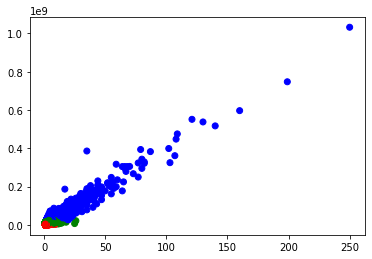

---


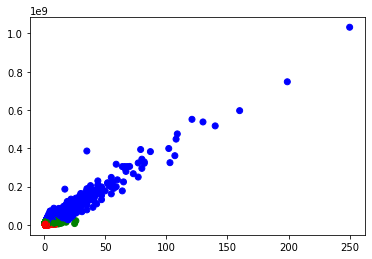

---


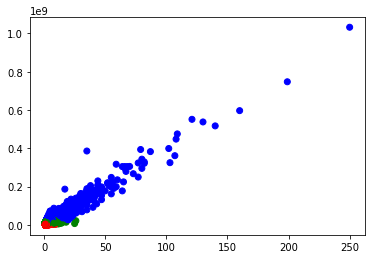

---


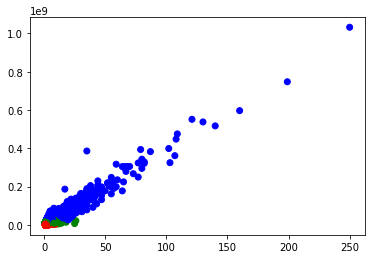

---


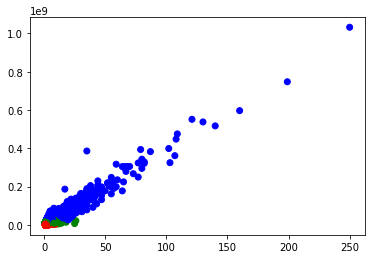

---


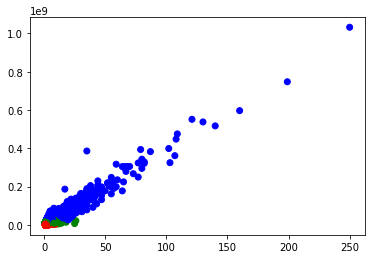

---


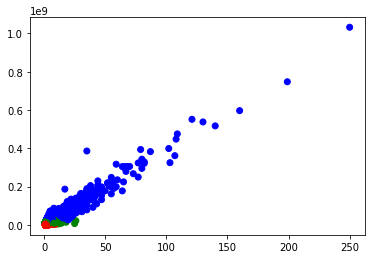

---


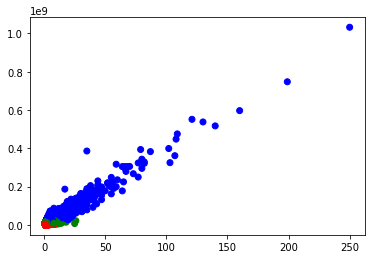

---


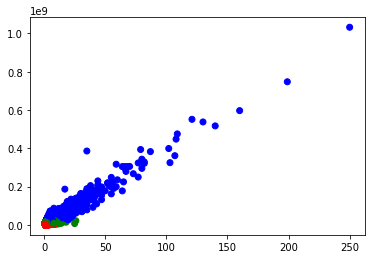

---


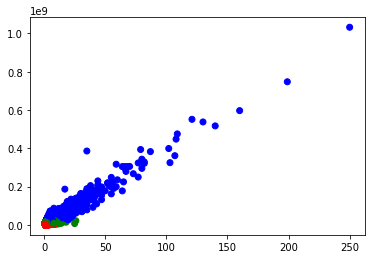

---


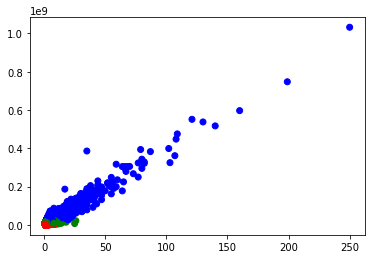

[1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 

In [ ]:
dfSet = result[["numberOfTransaction","totalIncome"]]
pred, predCluster= MyKMean(dfSet,3,"","braycurtis")
print(pred)
print(predCluster)


27454
kmean++
---


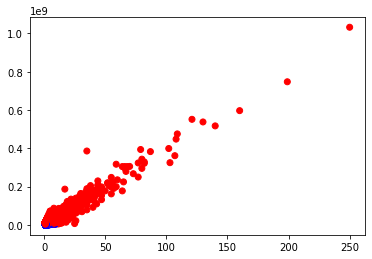

---


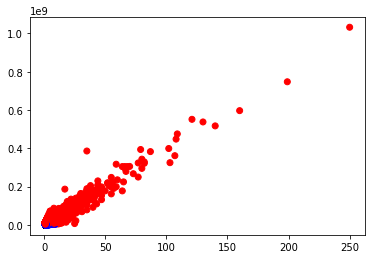

---


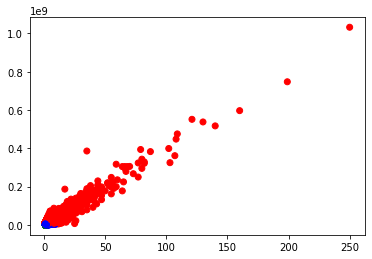

---


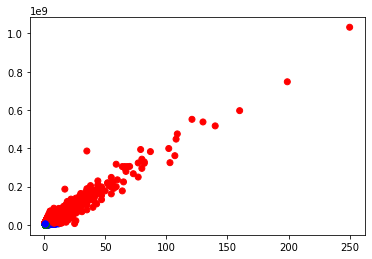

---


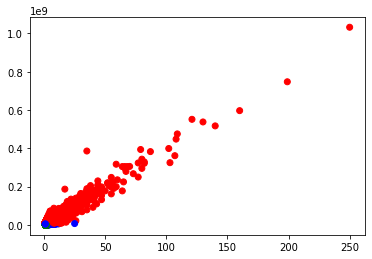

---


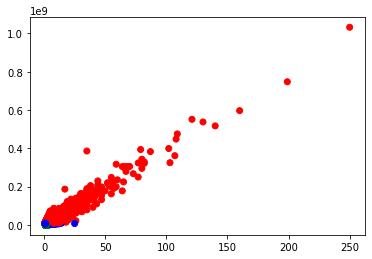

---


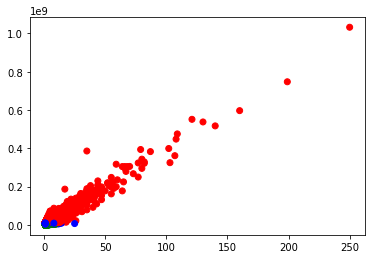

---


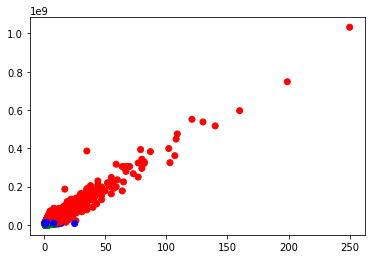

---


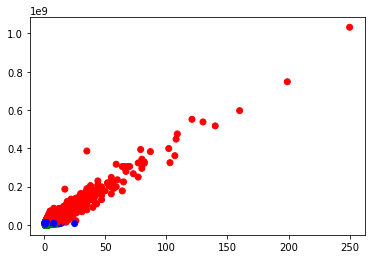

---


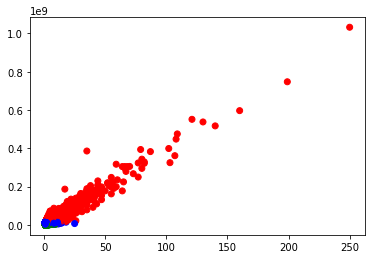

---


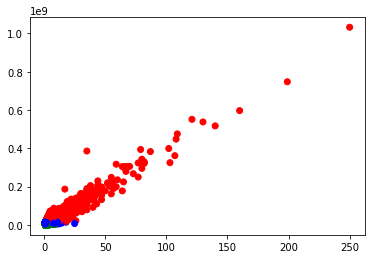

---


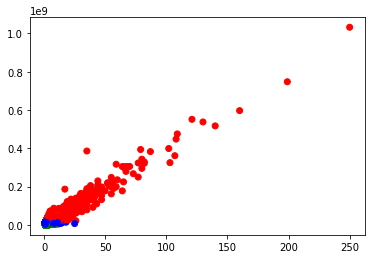

---


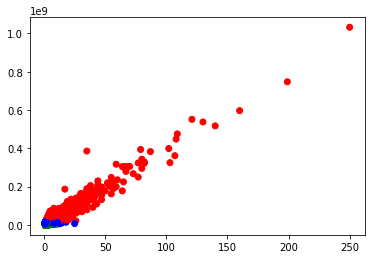

---


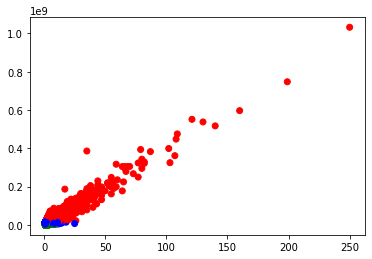

---


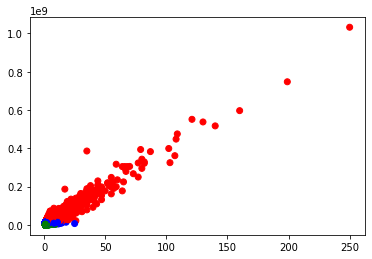

---


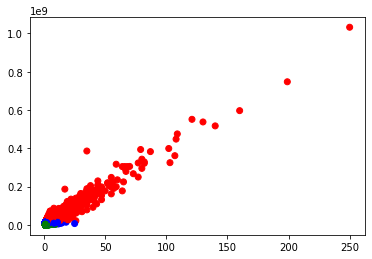

---


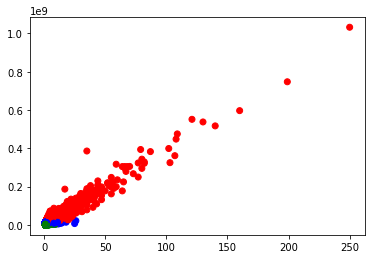

---


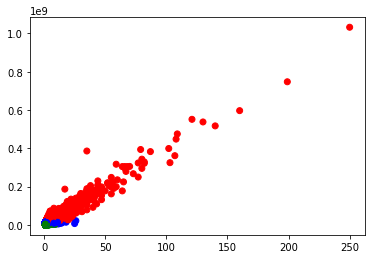

---


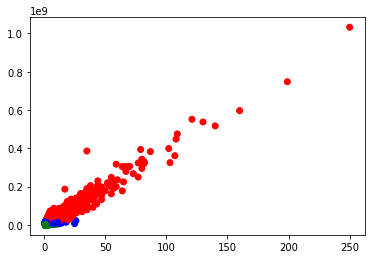

---


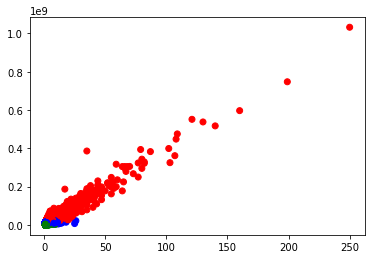

---


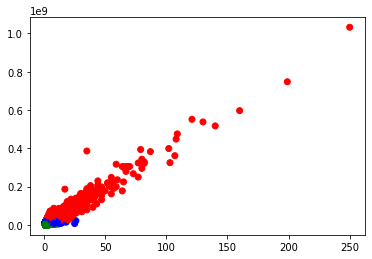

---


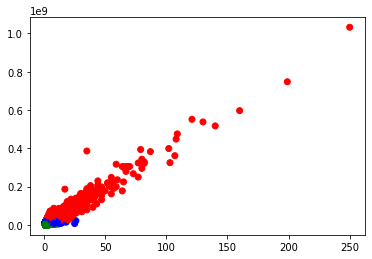

---


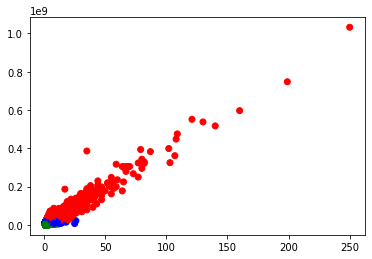

---


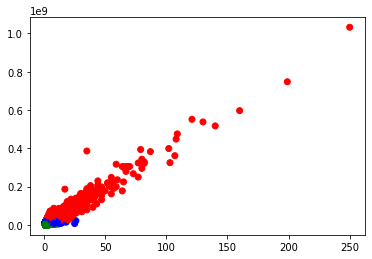

---


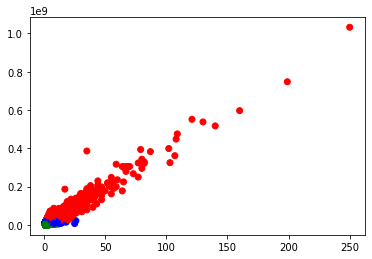

[2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 0, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 

In [ ]:
dfSet = result[["numberOfTransaction","totalIncome"]]
pred, predCluster= MyKMean(dfSet,3,"plus","braycurtis")
print(pred)
print(predCluster)

##### 3.5.2 Kmean on Branch

In [ ]:
dfSet2 = result2[["numberOfTransaction","totalIncome"]]
dfFromBranch ,pred, predCluster=MyKMean(dfSet2,5,"modified","braycurtis")
#print(pred)
#print(predCluster)
#print(dfFromBranch)
numDF = dfFromBranch.to_numpy()

Modified kmean++
162891374252238
1
2
3
4


In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(dfSet2, pred, metric='braycurtis')
print(score)

0.43648482910114966


##### 3.5.3 Kmean on Customers

In [ ]:
from itertools import chain
resultDataframe = pd.concat([df1, df2], axis=1)
resultDataframe = resultDataframe.loc[:, ~resultDataframe.columns.duplicated()]
resultDataframe.rename(columns = {'COUNT(*)':'numberOfTransaction','SUM(`Jumlah Setor (HKD)`)':'totalIncome'}, inplace = True)
resultDataframe['cluster'] = list(pred)
qResult = "SELECT `Nama Cabang` FROM resultDataframe WHERE cluster = "+str(predCluster)+";"
dfResult = sqldf(qResult, globals())
numpyresult = (dfResult.to_numpy()).tolist()
flatten_numpyresult = list(chain.from_iterable(numpyresult))
flatten_numpyresult = tuple(flatten_numpyresult)
if(len(flatten_numpyresult) == 1):
  flatten_numpyresult = str(flatten_numpyresult)
  flatten_numpyresult = flatten_numpyresult.replace(",", "")
numpyresult_tuple = tuple(numpyresult)
qTestDf = "SELECT `Nama Pengirim`, COUNT(*),SUM(`Jumlah Dikirim`),`Nama Cabang` FROM df WHERE `Nama Cabang` IN {sql_list} GROUP BY `Nama Pengirim`".format(sql_list=flatten_numpyresult)
dfResultTest = sqldf(qTestDf, globals())
dfResultTest = dfResultTest.loc[:, ~dfResultTest.columns.duplicated()]
dfResultTest.rename(columns = {'COUNT(*)':'numberOfTransaction','SUM(`Jumlah Dikirim`)':'totalIncomeCustomers'}, inplace = True)
dfResultTest
#sql = 'SELECT * FROM products WHERE catid IN ('+(','.join(numpyresult))+')';

Nama Pengirim  numberOfTransaction  totalIncomeCustomers  \
0                      A I                    5                  4816   
1                   A ISAH                    9                 45080   
2       AAA RIKA SUKMAWATI                    4                 12400   
3              AAF AFRIANI                    1                  2200   
4              AAH  MARIAH                   16                 22992   
...                    ...                  ...                   ...   
64940             zunaenah                   12                 27130   
64941   zuni intan lusiana                    2                  9006   
64942            zunuliyah                    1                  3970   
64943  zuriatin dwi anjani                    2                 10600   
64944             zuwairoh                    9                 11461   

      Nama Cabang  
0             TKO  
1             CHM  
2             WU   
3             YL   
4             CHW  
...           ...  
64940         HH   
64941         CHH  
64942         CHW  
64943         CMK  
64944         TP   

[64945 rows x 4 columns]

Mofied kmean++


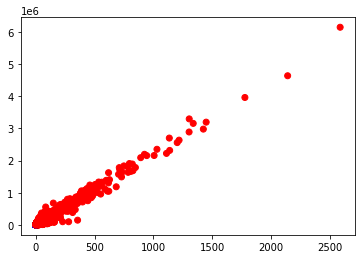

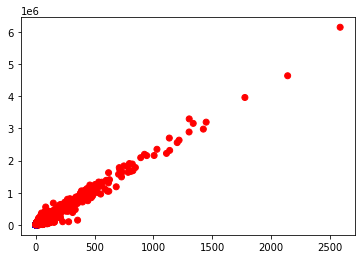

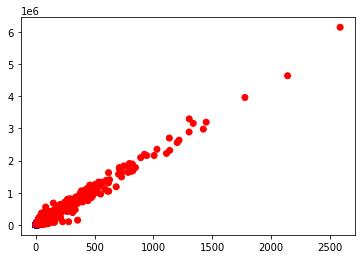

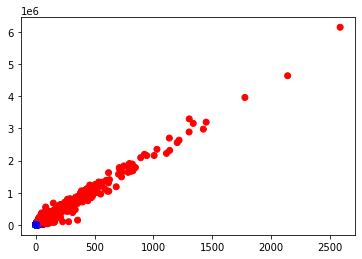

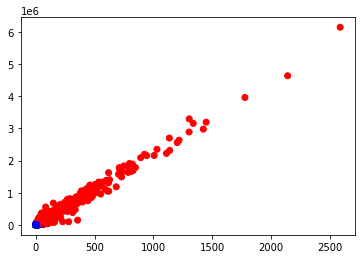

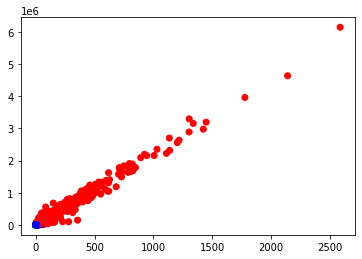

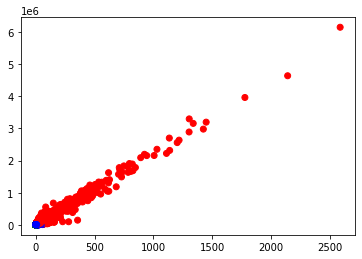

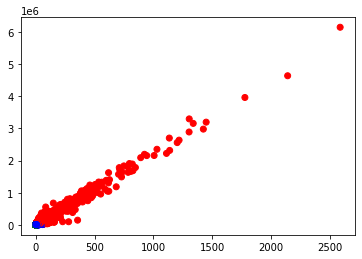

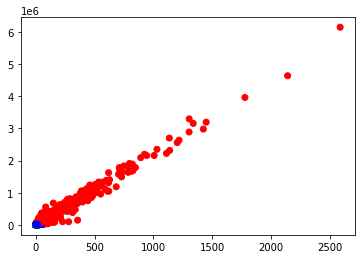

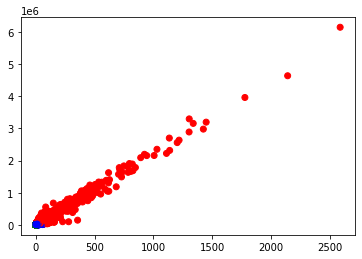

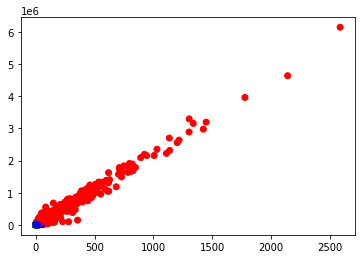

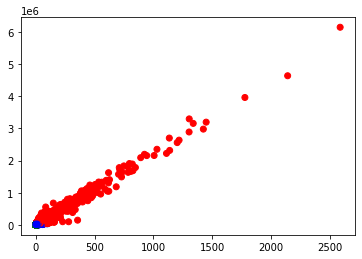

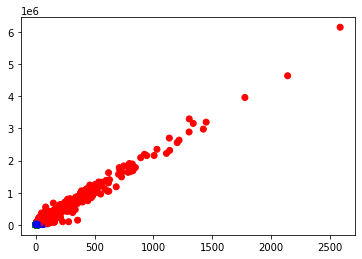

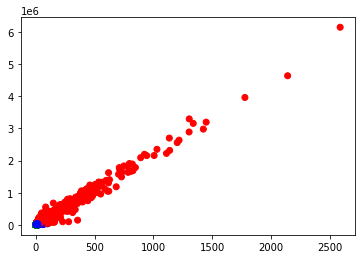

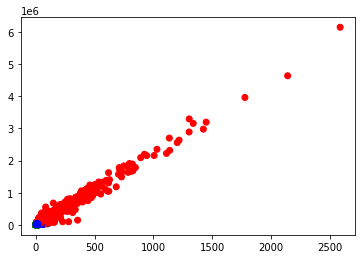

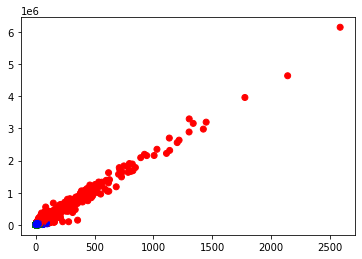

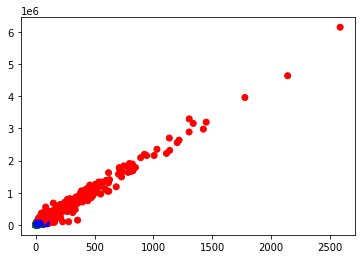

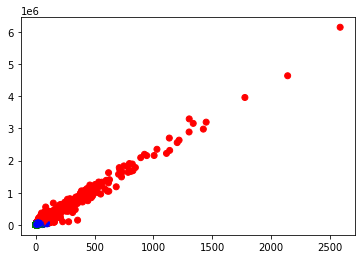

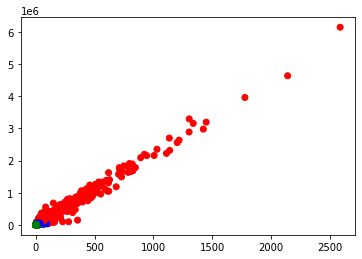

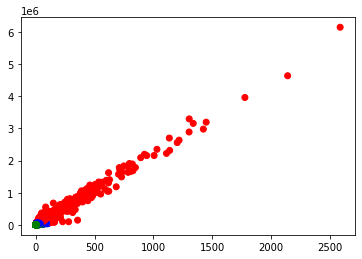

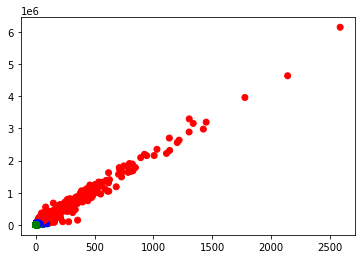

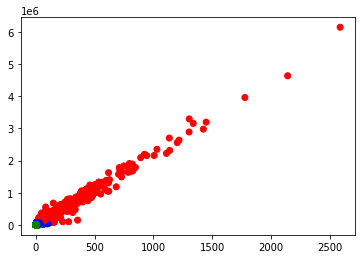

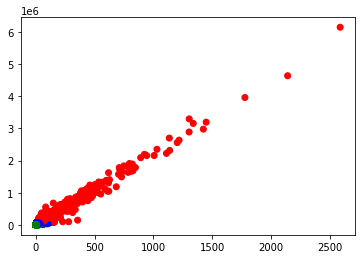

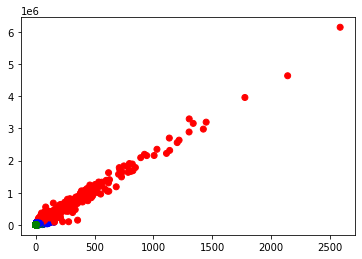

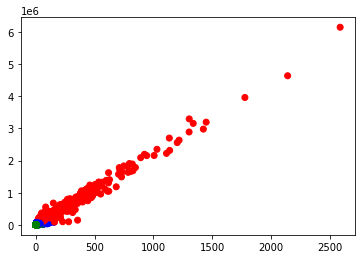

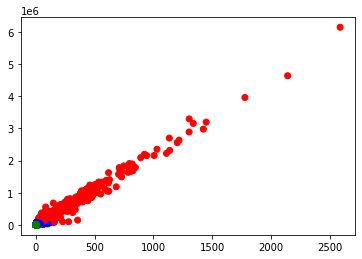

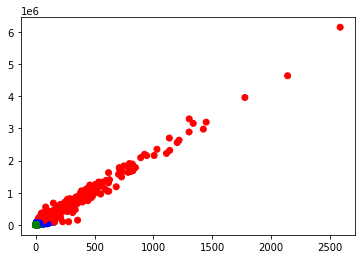

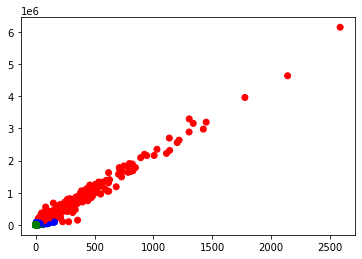

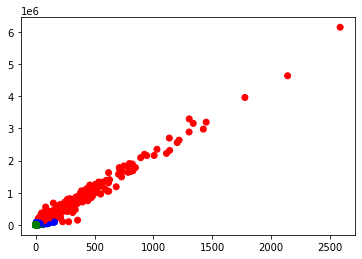

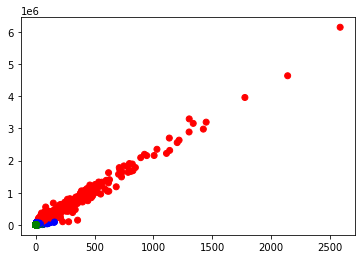

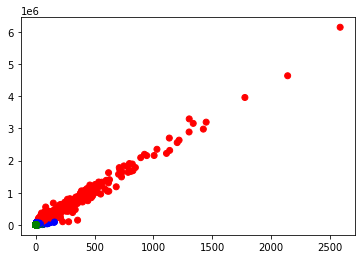

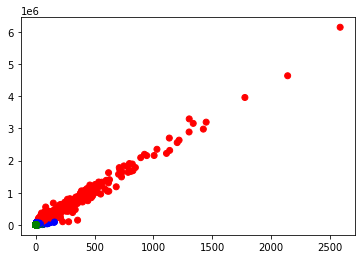

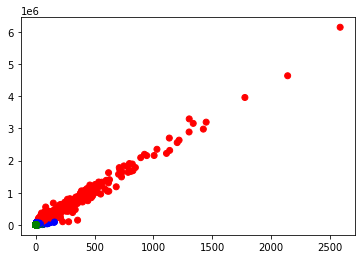

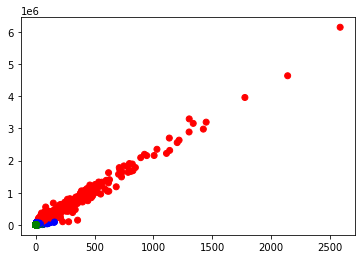

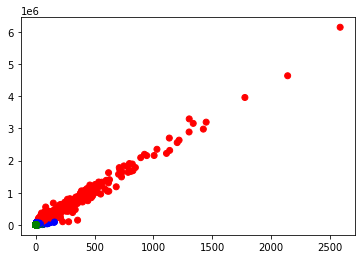

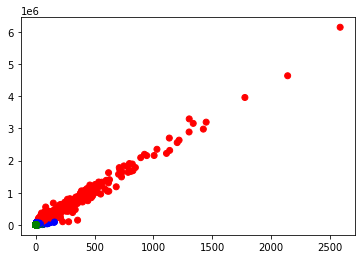

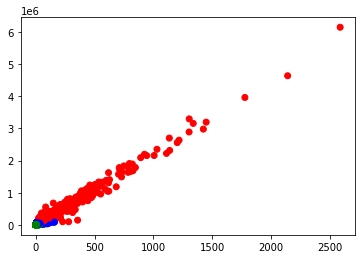

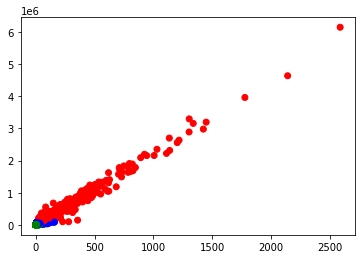

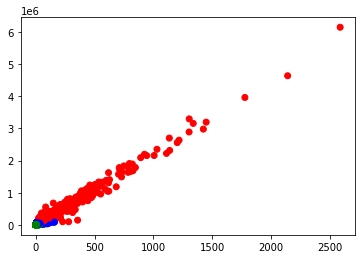

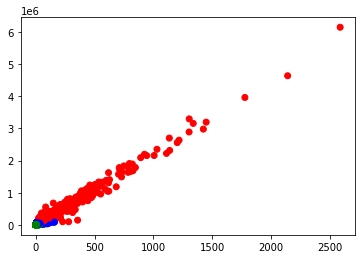

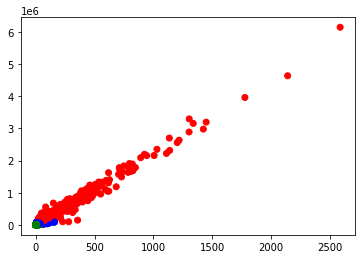

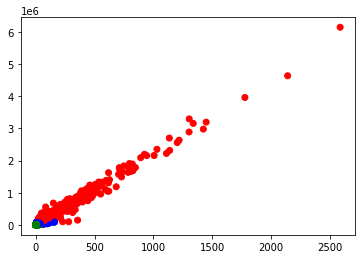

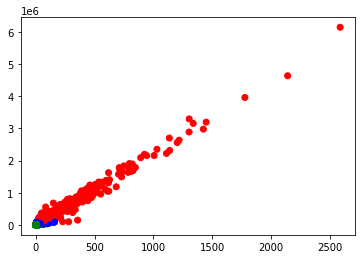

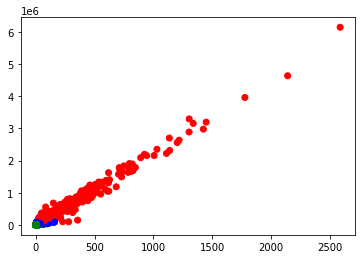

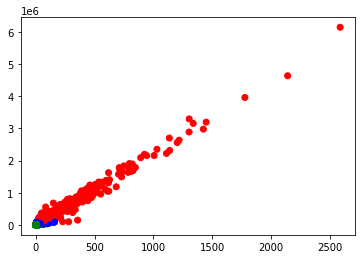

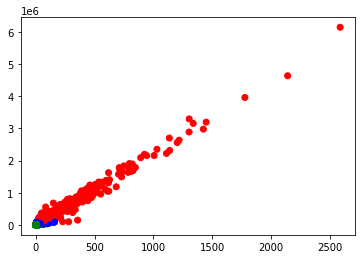

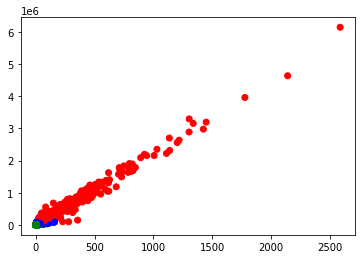

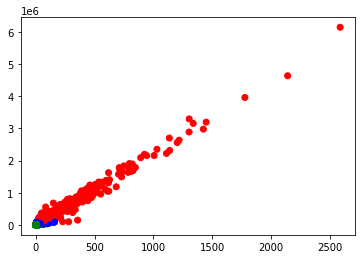

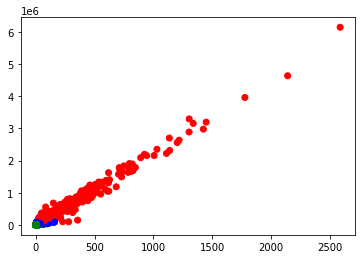

[1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 0, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 

In [ ]:
dfSet3 = dfResultTest[["numberOfTransaction","totalIncomeCustomers"]]
pred, predCluster=MyKMean(dfSet3,3,"modified","braycurtis")
print(pred)
print(predCluster)

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(dfSet3, pred, metric='braycurtis')
#
print(score)

0.44350933916981267


In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(dfSet3, pred, metric='manhattan')
#
print(score)

0.5360219713161439


##Testing

In [ ]:
dfSet = result[["numberOfTransaction","totalIncome"]]
dfSet[0]

KeyError: ignored

In [ ]:
dfSet = result[["numberOfTransaction","totalIncome"]]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=21,test_size=0.4)
print('X Train shape', X_train.shape)
print('X Test shape', X_test.shape)
print('y Train shape', y_train.shape)
print('y test shape', y_test.shape)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
def knnFunction(X_train_alpha, X_test_alpha):
  for k in range(1,101):
    knn=KNeighborsClassifier(n_neighbors=k,metric='manhattan')
    #Training process
    knn.fit(X_train_alpha,y_train)
    #Predict the testing set
    y_pred=knn.predict(X_test_alpha)
    print('K=',k,'Accuracy Score:', accuracy_score(y_test,y_pred))


In [ ]:
dfResultTestExperiment = dfResultTest2.copy()
dfResultTestExperiment['totalCompanyIncome'] = dfResultTestExperiment['totalCompanyIncome'].sort_values(ascending=True).values

dfResultTestExperiment['totalCompanyIncome'].loc[1:909] = dfResultTestExperiment['totalCompanyIncome'].loc[1:909].sort_values(ascending=False).values
dfResultTestExperiment['totalCompanyIncome'].loc[909:1819] = dfResultTestExperiment['totalCompanyIncome'].loc[909:1819].sort_values(ascending=True).values

dfResultTestExperiment['totalCompanyIncome'].loc[1:606] = dfResultTestExperiment['totalCompanyIncome'].loc[1:606].sort_values(ascending=True).values
dfResultTestExperiment['totalCompanyIncome'].loc[606:1212] = dfResultTestExperiment['totalCompanyIncome'].loc[606:1212].sort_values(ascending=False).values
dfResultTestExperiment['totalCompanyIncome'].loc[1212:1819] = dfResultTestExperiment['totalCompanyIncome'].loc[1212:1819].sort_values(ascending=True).values

dfResultTestExperiment['totalCompanyIncome'].loc[1:454] = dfResultTestExperiment['totalCompanyIncome'].loc[1:454].sort_values(ascending=False).values
dfResultTestExperiment['totalCompanyIncome'].loc[454:908] = dfResultTestExperiment['totalCompanyIncome'].loc[454:908].sort_values(ascending=True).values
dfResultTestExperiment['totalCompanyIncome'].loc[908:1362] = dfResultTestExperiment['totalCompanyIncome'].loc[908:1362].sort_values(ascending=False).values
dfResultTestExperiment['totalCompanyIncome'].loc[1362:1819] = dfResultTestExperiment['totalCompanyIncome'].loc[1362:1819].sort_values(ascending=True).values

dfResultTestExperiment['totalCompanyIncome'].loc[1:363]  = dfResultTestExperiment['totalCompanyIncome'].loc[1:363].sort_values(ascending=True).values
dfResultTestExperiment['totalCompanyIncome'].loc[363:726]  = dfResultTestExperiment['totalCompanyIncome'].loc[363:726].sort_values(ascending=False).values
dfResultTestExperiment['totalCompanyIncome'].loc[726:1089]  = dfResultTestExperiment['totalCompanyIncome'].loc[726:1089].sort_values(ascending=True).values
dfResultTestExperiment['totalCompanyIncome'].loc[1089:1452]  = dfResultTestExperiment['totalCompanyIncome'].loc[1089:1452].sort_values(ascending=False).values
dfResultTestExperiment['totalCompanyIncome'].loc[1452:1819]  = dfResultTestExperiment['totalCompanyIncome'].loc[1452:1819].sort_values(ascending=True).values


dfResultTestExperiment['totalCompanyIncome'].loc[1:231]  = dfResultTestExperiment['totalCompanyIncome'].loc[1:231].sort_values(ascending=False).values
dfResultTestExperiment['totalCompanyIncome'].loc[231:551]  = dfResultTestExperiment['totalCompanyIncome'].loc[231:551].sort_values(ascending=True).values
dfResultTestExperiment['totalCompanyIncome'].loc[551:785]  = dfResultTestExperiment['totalCompanyIncome'].loc[551:785].sort_values(ascending=False).values
dfResultTestExperiment['totalCompanyIncome'].loc[785:995]  = dfResultTestExperiment['totalCompanyIncome'].loc[785:995].sort_values(ascending=True).values
dfResultTestExperiment['totalCompanyIncome'].loc[995:1096]  = dfResultTestExperiment['totalCompanyIncome'].loc[995:1096].sort_values(ascending=False).values
dfResultTestExperiment['totalCompanyIncome'].loc[1096:1193]  = dfResultTestExperiment['totalCompanyIncome'].loc[1096:1193].sort_values(ascending=True).values
dfResultTestExperiment['totalCompanyIncome'].loc[1193:1313]  = dfResultTestExperiment['totalCompanyIncome'].loc[1193:1313].sort_values(ascending=False).values
dfResultTestExperiment['totalCompanyIncome'].loc[1313:1373]  = dfResultTestExperiment['totalCompanyIncome'].loc[1313:1373].sort_values(ascending=True).values
dfResultTestExperiment['totalCompanyIncome'].loc[1373:1495]  = dfResultTestExperiment['totalCompanyIncome'].loc[1373:1495].sort_values(ascending=False).values
dfResultTestExperiment['totalCompanyIncome'].loc[1495:1819]  = dfResultTestExperiment['totalCompanyIncome'].loc[1495:1819].sort_values(ascending=True).values


dfResultTestExperiment['totalCompanyIncome'].loc[1:90]  = dfResultTestExperiment['totalCompanyIncome'].loc[1:90].sort_values(ascending=False).values
dfResultTestExperiment['totalCompanyIncome'].loc[90:180]  = dfResultTestExperiment['totalCompanyIncome'].loc[90:180].sort_values(ascending=True).values
dfResultTestExperiment['totalCompanyIncome'].loc[180:270]  = dfResultTestExperiment['totalCompanyIncome'].loc[180:270].sort_values(ascending=False).values
dfResultTestExperiment['totalCompanyIncome'].loc[270:360]  = dfResultTestExperiment['totalCompanyIncome'].loc[270:360].sort_values(ascending=True).values
dfResultTestExperiment['totalCompanyIncome'].loc[360:450]  = dfResultTestExperiment['totalCompanyIncome'].loc[360:450].sort_values(ascending=False).values
dfResultTestExperiment['totalCompanyIncome'].loc[450:540]  = dfResultTestExperiment['totalCompanyIncome'].loc[450:540].sort_values(ascending=True).values
dfResultTestExperiment['totalCompanyIncome'].loc[540:630]  = dfResultTestExperiment['totalCompanyIncome'].loc[540:630].sort_values(ascending=False).values
dfResultTestExperiment['totalCompanyIncome'].loc[630:720]  = dfResultTestExperiment['totalCompanyIncome'].loc[630:720].sort_values(ascending=True).values
dfResultTestExperiment['totalCompanyIncome'].loc[720:810]  = dfResultTestExperiment['totalCompanyIncome'].loc[720:810].sort_values(ascending=False).values
dfResultTestExperiment['totalCompanyIncome'].loc[810:900]  = dfResultTestExperiment['totalCompanyIncome'].loc[810:900].sort_values(ascending=True).values
dfResultTestExperiment['totalCompanyIncome'].loc[990:1080]  = dfResultTestExperiment['totalCompanyIncome'].loc[990:1080].sort_values(ascending=False).values
dfResultTestExperiment['totalCompanyIncome'].loc[1080:1170]  = dfResultTestExperiment['totalCompanyIncome'].loc[1080:1170].sort_values(ascending=True).values
dfResultTestExperiment['totalCompanyIncome'].loc[1170:1260]  = dfResultTestExperiment['totalCompanyIncome'].loc[1170:1260].sort_values(ascending=False).values
dfResultTestExperiment['totalCompanyIncome'].loc[1260:1350]  = dfResultTestExperiment['totalCompanyIncome'].loc[1260:1350].sort_values(ascending=True).values
dfResultTestExperiment['totalCompanyIncome'].loc[1350:1440]  = dfResultTestExperiment['totalCompanyIncome'].loc[1350:1440].sort_values(ascending=False).values
dfResultTestExperiment['totalCompanyIncome'].loc[1440:1530]  = dfResultTestExperiment['totalCompanyIncome'].loc[1440:1530].sort_values(ascending=True).values
dfResultTestExperiment['totalCompanyIncome'].loc[1530:1620]  = dfResultTestExperiment['totalCompanyIncome'].loc[1530:1620].sort_values(ascending=False).values
dfResultTestExperiment['totalCompanyIncome'].loc[1620:1710]  = dfResultTestExperiment['totalCompanyIncome'].loc[1620:1710].sort_values(ascending=True).values
dfResultTestExperiment['totalCompanyIncome'].loc[1710:1800]  = dfResultTestExperiment['totalCompanyIncome'].loc[1710:1800].sort_values(ascending=False).values
dfResultTestExperiment['totalCompanyIncome'].loc[1800:1819]  = dfResultTestExperiment['totalCompanyIncome'].loc[1800:1819].sort_values(ascending=True).values

dfResultTest2=dfResultTestExperiment